# Credit Card Fraud Detection

## Table of Contents

1. [Library Management](#header1_1)
2. [Data Sourcing](#header1_2)
3. [Data Cleaning](#header1_3)
4. [Univariate / Bivariate Analysis](#header1_4)
5. [Data Preprocesing for Modelling](#header1_5)
6. [Data Modelling on Sampled Data](#header1_6)
    - 1. [Logistic Regression](#header2_6_1)
    - 2. [Decision Trees](#header2_6_2)
    - 3. [Random Forest](#header2_6_3)
    - 4. [Gradient Boosting](#header2_6_4)
    - 5. [XG-Boost](#header2_6_5)
    - 6. [Artificial Neural Net (ANN)](#header2_6_6)
7. [Random Oversampling](#header1_7)
    - 1. [Logistic Regression](#header2_7_1)
    - 2. [Decision Trees](#header2_7_2)
    - 3. [Random Forest](#header2_7_3)
    - 4. [Gradient Boosting](#header2_7_4)
    - 5. [XG-Boost](#header2_7_5)
    - 6. [Artificial Neural Net (ANN)](#header2_7_6)
    - 7. [Reverting Input & Output Train Variables](#header2_7_7)
8. [Synthetic Minority Oversampling Technique (SMOTE)](#header1_8)
    - 1. [Logistic Regression](#header2_8_1)
    - 2. [Decision Trees](#header2_8_2)
    - 3. [Random Forest](#header2_8_3)
    - 4. [Gradient Boosting](#header2_8_4)
    - 5. [XG-Boost](#header2_8_5)
    - 6. [Artificial Neural Net (ANN)](#header2_8_6)
    - 7. [Reverting Input & Output Train Variables](#header2_8_7)
9. [Adaptive Synthetic (ADASYNC)](#header1_9)
    - 1. [Logistic Regression](#header2_9_1)
    - 2. [Decision Trees](#header2_9_2)
    - 3. [Random Forest](#header2_9_3)
    - 4. [Gradient Boosting](#header2_9_4)
    - 5. [XG-Boost](#header2_9_5)
    - 6. [Artificial Neural Net (ANN)](#header2_9_6)
    - 7. [Reverting Input & Output Train Variables](#header2_9_7)
10. [Final Evaluation Metrics](#header1_10)

# 1. <a id="header1_1">Library Management</a>

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install tabulate==0.8.9 pandas==1.1.5 numpy==1.19.5 seaborn==0.11.2 statsmodels==0.12.2 scikit-learn==0.24.2 tensorflow==2.6.0 imbalanced-learn==0.8.0 xgboost==1.4.2

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [5]:
sns.set(rc={'figure.figsize':(15,8)})

In [6]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [7]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

In [12]:
from xgboost import XGBClassifier

In [13]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [14]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

# 2. <a id="header1_2">Data Sourcing</a>

In [15]:
input_file_path = 'creditcard.csv'

In [16]:
raw_data = pd.read_csv(input_file_path)

In [17]:
raw_data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

# 3. <a id = "header1_3">Data Cleaning</a>

In [18]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### From the above information, we can say that, there is no need for data cleansing as there are no null / empty / missing values.

#### Furthermore, we can proceed ahead towards variable analysis

# 4. <a id = "header1_4">Univariate / Bivariate Analysis</a>

## 4.1. Pre-Defined Fucntions for Univariate / Bivariate analysis

In [19]:
def plot_bar_graph_from_series(series, plot_title, x_axis_label, y_axis_label, x_axis_label_rotation=0, y_axis_label_rotation=0, data_label_rotation='vertical'):
    """
    Plots the Bar Graph with appropriate X / Y axis labels, graph title and data labels.
    Arguments:
    - series: Accepts pandas series or a column from pandas dataframe
    - plot_title: Title to be diaplyed for graph
    - x-axis label: Label to be displayed on X-Axis
    - y-axis label: Label to be displayed on Y-Axis
    - x_axis_label_rotation: Angle at which x-axis labels needs to be rotated
    - y_axis_label_rotation: Angle at which y-axis labels needs to be rotated
    - data_label_rotation: Angle at which data labels (above the bar) needs to be rotated    
    
    """
    graph = sns.barplot(x=series.index, y=series.values)
    plt.title(plot_title, fontdict={'fontsize': 20})
    plt.xlabel(x_axis_label, fontdict={'fontsize': 15})
    plt.ylabel(y_axis_label, fontdict={'fontsize': 15})
    graph.set_xticklabels(graph.get_xticklabels(), rotation=x_axis_label_rotation)
    graph.set_yticklabels(graph.get_yticklabels(), rotation=y_axis_label_rotation)
    label_deviation_above_y_axis = series.max() * 0.015
    for index, value in enumerate(data.iteritems()):
        graph.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation=data_label_rotation)
    plt.show()

In [20]:
def plot_box_graph(series, plot_type='box'):
    """
    This function is use to plot Box Plot for continuous numerical variable
    Arguments
    - series: Accepts pandas series or a column from pandas dataframe
    - plot_type: To plot either box plot or distribution plot
    """
    if plot_type == 'box':
        plt.figure(figsize=(16,5))
        sns.boxplot(series)
    elif plot_type == 'dist':
        plt.figure(figsize=(15,8))
        sns.distplot(raw_data.V1)
    else:
        raise ValueError('Plot type can be either a "box" (for Box Plot) or "dist" (for Distribution Plot)')
    plt.title('Distribution of ' + str(series.name), fontdict={'fontsize': 20})
    plt.xlabel(series.name, fontdict={'fontsize': 15})
    plt.show()    

In [21]:
def check_class_distribution_on_handling_outlier(series_name, quantile_val_low=0.0, quantile_val_high=1.0):
    """
    This function id used to check the distribution of class on removing outliers.
    This function calculates the class count falling in range between quantile_val_low & quantile_val_high
    Arguments
    - series_name: Name of the column on which outlier treatment is to be done
    - quantile_val_low: Lower quantile value
    - quantile_val_high: Hiher quantile value
    
    """
    class_count_on_removing_outlier = raw_data[(raw_data[series_name] >= raw_data[series_name].quantile(quantile_val_low)) & (raw_data[series_name] <= raw_data[series_name].quantile(quantile_val_high))].Class.value_counts()
    class_1_drop = (raw_class_value_dist[1] - class_count_on_removing_outlier[1])/raw_class_value_dist[1] * 100
    # print('Percentage of Class 1 values dropped after outlier treatment ==>', round(class_1_drop, 2))
    
    class_0_drop = (raw_class_value_dist[0] - class_count_on_removing_outlier[0])/raw_class_value_dist[0] * 100
    # print('Percentage of Class 0 values dropped after outlier treatment ==>', round(class_0_drop, 2))
    
    headers = ['Class', 'Raw Data\nValue Count', 'Data Values\nRETAINED after\nOutlier Treatment','Data Values\nDROPPED after\nOutlier Treatment','Percent Drop\nIn Data Values']
    table = [
        ['Class 0', str(raw_class_value_dist[0]), str(class_count_on_removing_outlier[0]), str(raw_class_value_dist[0]-class_count_on_removing_outlier[0]), str(round(class_0_drop, 2)) + " %"],
        ['Class 1', str(raw_class_value_dist[1]), str(class_count_on_removing_outlier[1]), str(raw_class_value_dist[1]-class_count_on_removing_outlier[1]), str(round(class_1_drop, 2)) + " %"]
    ]
    print(tabulate(table, headers, tablefmt="grid", colalign=("center", "center", "center", "center", "center")))

## 4.2. Class

#### While looking at the data, we see that Class column corresponds to Credit Card Fraud value. Therefore we will analyse this column first

#### Data Interpretation
1. Class 0 ==> No Fraud
2. Class 1 ==> Fraud

In [22]:
raw_class_value_dist = raw_data.Class.value_counts()
raw_class_value_dist

0    284315
1       492
Name: Class, dtype: int64

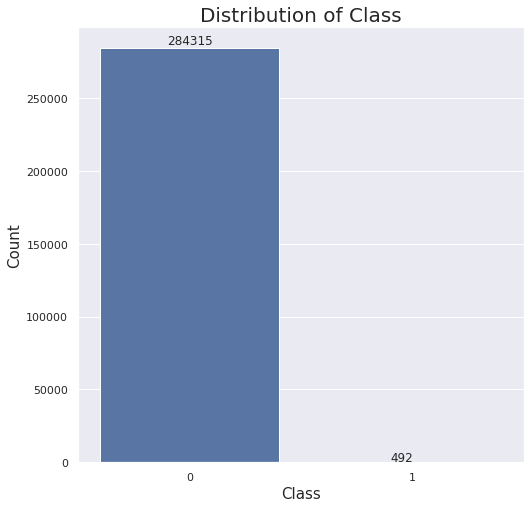

In [23]:
plt.figure(figsize=(8,8))
ax = sns.countplot(raw_data.Class)
plt.title('Distribution of Class', fontdict={'fontsize': 20})
plt.xlabel('Class', fontdict={'fontsize': 15})
plt.ylabel('Count', fontdict={'fontsize': 15})
for p, label in zip(ax.patches, raw_data.Class.value_counts().index):
    ax.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()*1.01))
plt.show()

In [24]:
headers = ['Class', 'Count', 'Percent Count']
table = [
    ['Class 0', str(raw_class_value_dist[0]), str(round(raw_class_value_dist[0]/len(raw_data)*100, 2)) + " %"],
    ['Class 1', str(raw_class_value_dist[1]), str(round(raw_class_value_dist[1]/len(raw_data)*100, 2)) + " %"]
]
print(tabulate(table, headers, tablefmt="grid", colalign=("center", "center", "center")))

+---------+---------+-----------------+
|  Class  |  Count  |  Percent Count  |
+=========+=========+=================+
| Class 0 | 284315  |     99.83 %     |
+---------+---------+-----------------+
| Class 1 |   492   |     0.17 %      |
+---------+---------+-----------------+


#### We see that there is a huge data imbalance.
#### For that, we need to drop data for outlier treatment with utmost care as the orginal datset has very less number of Class 1 values

## 4.3. Time

#### Going as per the explanation of this variable, we see that every value in this row is dependent on time between current value and value in the first row of this column.

#### This way, it makes this varaible not an independent identified variable and hence should not be consdiered for analysis.

#### Thereby, we can drop this variable

In [25]:
raw_data = raw_data.drop(columns=['Time'])

In [26]:
raw_data.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4 -0.206010  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 30 columns]

#### We see that there is a huge data imbalance.
#### For that, we need to drop data with utmost care as the orginal datset has very less number of Class 1 values

## 4.4. Amount

In [27]:
raw_data.Amount.describe(percentiles=np.linspace(0, 1, 11))

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
0%            0.000000
10%           1.000000
20%           3.570000
30%           8.910000
40%          13.000000
50%          22.000000
60%          37.000000
70%          59.800000
80%         100.000000
90%         203.000000
100%      25691.160000
max       25691.160000
Name: Amount, dtype: float64

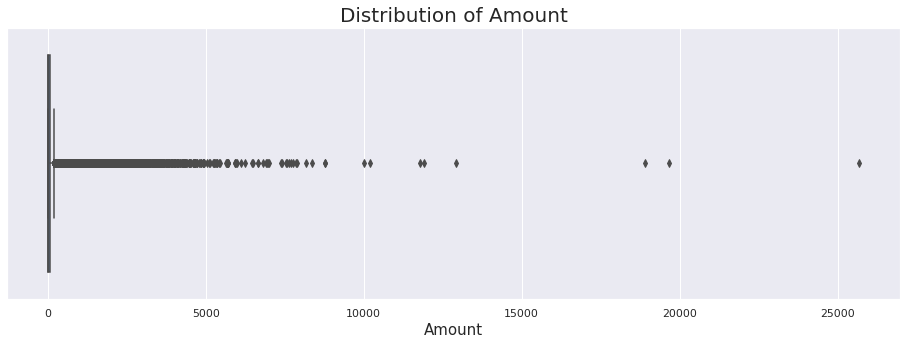

In [28]:
plot_box_graph(series=raw_data.Amount)

#### We see that there is a huge skewness in the amount column. Lets try to map this column with respect to class variable

#### Let's distribute the amount column in 10 different groups (i.e. from 0 to 10%, 10% to 20% etc)
#### After this, we can visualise if there is any pattern observed between Credit Card Fraud and Amount

In [29]:
def amount_binning(x, max_amount):
    if x <= (0.1*max_amount):
        return 'Upto 10%'
    elif x <= (0.2*max_amount):
        return '10% to 20%'
    elif x <= (0.3*max_amount):
        return '20% to 30%'
    elif x <= (0.4*max_amount):
        return '30% to 40%'
    elif x <= (0.5*max_amount):
        return '40% to 50%'
    elif x <= (0.6*max_amount):
        return '50% to 60%'
    elif x <= (0.7*max_amount):
        return '60% to 70%'
    elif x <= (0.8*max_amount):
        return '70% to 80%'
    elif x <= (0.9*max_amount):
        return '80% to 90%'
    else:
        return 'More Than 90%'

In [30]:
raw_data['Amount_Bin'] = raw_data.Amount.apply(amount_binning, args=(max(raw_data.Amount),))

In [31]:
raw_data.groupby(['Amount_Bin', 'Class']).Class.count()

Amount_Bin     Class
10% to 20%     0           360
20% to 30%     0            36
30% to 40%     0            10
40% to 50%     0             2
50% to 60%     0             1
70% to 80%     0             2
More Than 90%  0             1
Upto 10%       0        283903
               1           492
Name: Class, dtype: int64

#### Here, it is observed that all the Credit Cards Fraud that has happened are usually for smaller value. i.e. Less than 2500
#### Said that, we see a strong connectivity between Amount and Credit Card Fraud.
#### As the amount goes on increasing there is almost no chance for Credit Card Fraud

##### Thereby, we will drop the newly created column of Amount_Bin

In [32]:
raw_data = raw_data.drop(columns=['Amount_Bin'])

#### Let's check if we can do outlier treatment wherein we drop top 1% of values (i.e. 0.99 to 1.00 quantile range)

In [33]:
check_class_distribution_on_handling_outlier(series_name='Amount', quantile_val_low=0.0, quantile_val_high=0.99)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       281475        |        2840         |      1.0 %       |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         483         |          9          |      1.83 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Now, to drop these outliers is subjective matter
#### Case 1: Can be dropped ad the Class 1 values are not getting altered that much.
#### Case 2: If the outliers are removed, we might loose on a very important factor that High Amount eads to almost no Frauds. This essential bhaviour might be lost if this outliers are removed.

#### for this case, we will continue to keep the outliers

## 4.5. V1

In [34]:
raw_data.V1.describe(percentiles=np.linspace(0, 1, 11))

count    2.848070e+05
mean     1.165980e-15
std      1.958696e+00
min     -5.640751e+01
0%      -5.640751e+01
10%     -1.893272e+00
20%     -1.134663e+00
30%     -7.472943e-01
40%     -4.267559e-01
50%      1.810880e-02
60%      1.035107e+00
70%      1.224825e+00
80%      1.694936e+00
90%      2.015409e+00
100%     2.454930e+00
max      2.454930e+00
Name: V1, dtype: float64

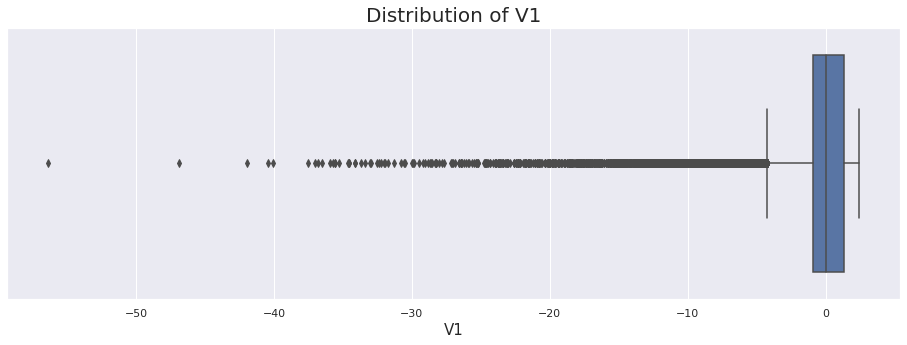

In [35]:
plot_box_graph(series=raw_data.V1)

#### In the above graph, we see that the graph is highly skewed towards left side (i.e. Negative Skewed)
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [36]:
check_class_distribution_on_handling_outlier(series_name='V1', quantile_val_low=0.01, quantile_val_high=1.00)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       281582        |        2733         |      0.96 %      |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         376         |         116         |     23.58 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by 24% if we treat outliers and drop them and since minority class values are so low, we cannot afford to drop these many values at once.
#### Thus we, will continue to keep these outliers

## 4.6. V2

In [37]:
raw_data.V2.describe(percentiles=np.linspace(0, 1, 11))

count    2.848070e+05
mean     3.416908e-16
std      1.651309e+00
min     -7.271573e+01
0%      -7.271573e+01
10%     -1.359862e+00
20%     -7.908142e-01
30%     -4.363931e-01
40%     -1.538049e-01
50%      6.548556e-02
60%      3.027378e-01
70%      6.368450e-01
80%      9.573136e-01
90%      1.326635e+00
100%     2.205773e+01
max      2.205773e+01
Name: V2, dtype: float64

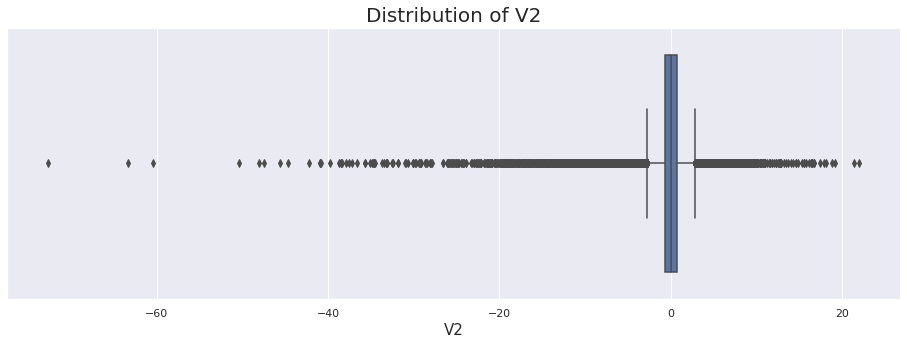

In [38]:
plot_box_graph(series=raw_data.V2)

#### In the above graph, we see that the graph is highly skewed towards left side (i.e. Negative Skewed)
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [39]:
check_class_distribution_on_handling_outlier(series_name='V2', quantile_val_low=0.01, quantile_val_high=1.00)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       281472        |        2843         |      1.0 %       |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         486         |          6          |      1.22 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by 1.2%
#### Therefore we can drop these values

In [40]:
raw_data = raw_data[
    (raw_data['V2'] >= raw_data['V2'].quantile(0.01)) & 
    (raw_data['V2'] <= raw_data['V2'].quantile(1.00))
]

## 4.7. V3

In [41]:
raw_data.V3.describe(percentiles=np.linspace(0, 1, 11))

count    281958.000000
mean          0.018062
std           1.476742
min         -33.680984
0%          -33.680984
10%          -1.781283
20%          -1.150780
30%          -0.600779
40%          -0.187586
50%           0.186050
60%           0.501966
70%           0.847060
80%           1.217419
90%           1.676386
100%          9.382558
max           9.382558
Name: V3, dtype: float64

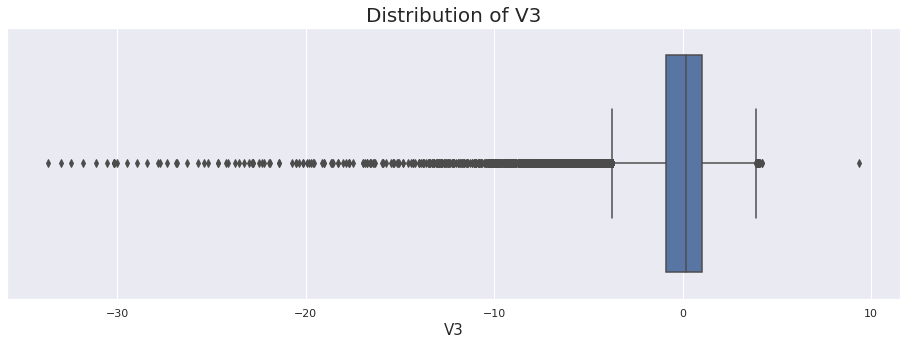

In [42]:
plot_box_graph(series=raw_data.V3)

#### In the above graph, we see that the graph is slightly skewed towards left side (i.e. Negative Skewed)
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [43]:
check_class_distribution_on_handling_outlier(series_name='V3', quantile_val_low=0.01, quantile_val_high=1.00)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       278963        |        5352         |      1.88 %      |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         175         |         317         |     64.43 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by 64% if we treat outliers and drop them and since minority class values are so low, we cannot afford to drop these many values at once.
#### Thus we, will continue to keep these outliers

## 4.8. V4

In [44]:
raw_data.V4.describe(percentiles=np.linspace(0, 1, 11))

count    281958.000000
mean         -0.017614
std           1.391189
min          -5.683171
0%           -5.683171
10%          -1.661756
20%          -1.073008
30%          -0.702556
40%          -0.403770
50%          -0.029077
60%           0.275276
70%           0.547546
80%           0.967564
90%           1.455796
100%         12.114672
max          12.114672
Name: V4, dtype: float64

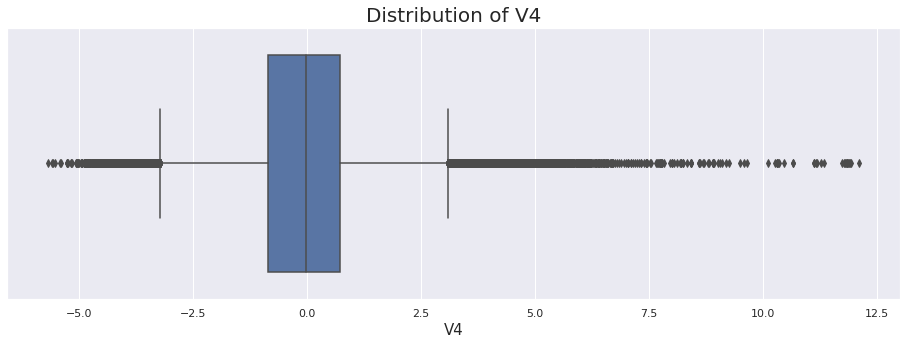

In [45]:
plot_box_graph(series=raw_data.V4)

#### In the above graph, we see that the graph is somewhat evenly distributed
#### So we will leave it as it is

## 4.9. V5

In [46]:
raw_data.V5.describe(percentiles=np.linspace(0, 1, 11))

count    281958.000000
mean         -0.009766
std           1.224929
min         -31.356750
0%          -31.356750
10%          -1.283888
20%          -0.851292
30%          -0.540402
40%          -0.288567
50%          -0.054945
60%           0.184108
70%           0.451687
80%           0.790224
90%           1.374734
100%         21.120137
max          21.120137
Name: V5, dtype: float64

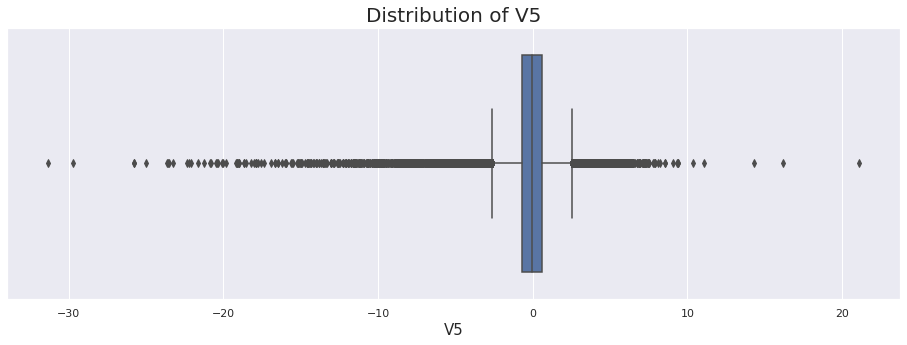

In [47]:
plot_box_graph(series=raw_data.V5)

#### In the above graph, we see that the graph is somewhat evenly distributed
#### So we will leave it as it is

## 4.10. V6

In [48]:
raw_data.V6.describe(percentiles=np.linspace(0, 1, 11))

count    281958.000000
mean          0.009256
std           1.269325
min         -14.352986
0%          -14.352986
10%          -1.156930
20%          -0.872516
30%          -0.664461
40%          -0.477251
50%          -0.273448
60%          -0.048993
70%           0.220781
80%           0.623665
90%           1.494456
100%         21.307738
max          21.307738
Name: V6, dtype: float64

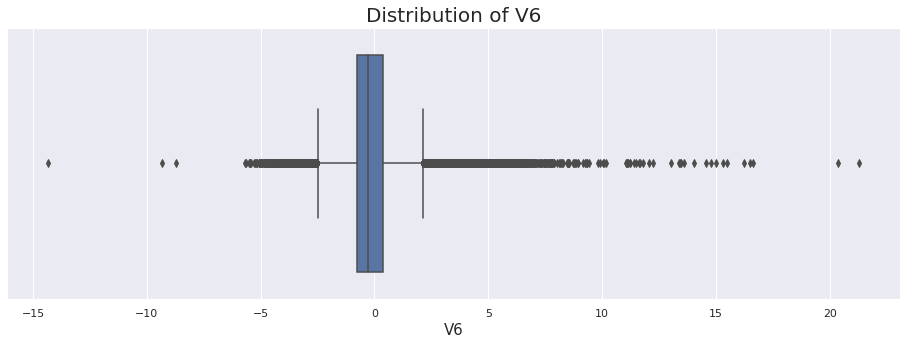

In [49]:
plot_box_graph(series=raw_data.V6)

#### In the above graph, we see that the graph is highly skewed towards right side (i.e. Positive Skewed)
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [50]:
check_class_distribution_on_handling_outlier(series_name='V6', quantile_val_low=0.0, quantile_val_high=0.99)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       278660        |        5655         |      1.99 %      |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         478         |         14          |      2.85 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by more than 2% if we treat outliers and drop them and since minority class values are so low, we cannot afford to drop these many values at once.
#### Thus we, will continue to keep these outliers

## 4.11. V7

In [51]:
raw_data.V7.describe(percentiles=np.linspace(0, 1, 11))

count    281958.000000
mean         -0.003810
std           1.102978
min         -43.557242
0%          -43.557242
10%          -1.065370
20%          -0.678002
30%          -0.423122
40%          -0.159015
50%           0.039027
60%           0.210665
70%           0.440632
80%           0.689830
90%           1.024571
100%         31.527244
max          31.527244
Name: V7, dtype: float64

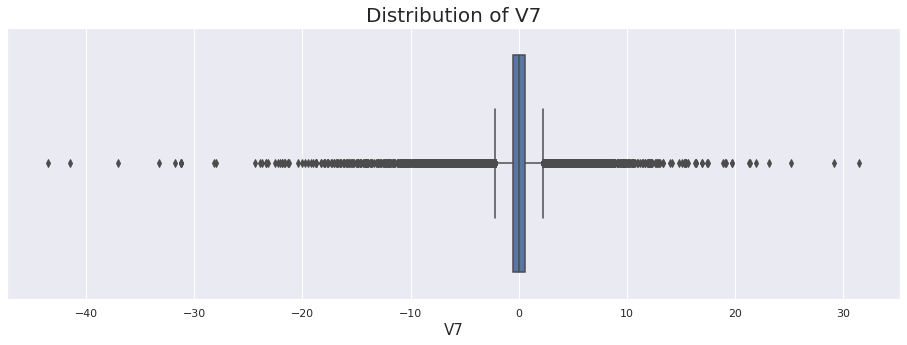

In [52]:
plot_box_graph(series=raw_data.V7)

#### In the above graph, we see that the graph is somewhat evenly distributed
#### So we will leave it as it is

## 4.12. V8

In [53]:
raw_data.V8.describe(percentiles=np.linspace(0, 1, 11))

count    281958.000000
mean          0.004173
std           1.186765
min         -73.216718
0%          -73.216718
10%          -0.449687
20%          -0.262673
30%          -0.156123
40%          -0.064929
50%           0.022912
60%           0.120533
70%           0.242603
80%           0.433234
90%           0.765809
100%         20.007208
max          20.007208
Name: V8, dtype: float64

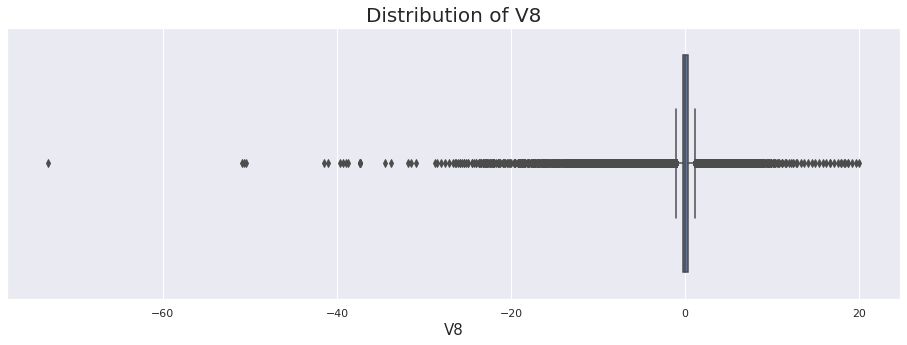

In [54]:
plot_box_graph(series=raw_data.V8)

#### In the above graph, we see that the graph is highly skewed towards left side (i.e. Negative Skewed)
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [55]:
check_class_distribution_on_handling_outlier(series_name='V8', quantile_val_low=0.01, quantile_val_high=1.00)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       278684        |        5631         |      1.98 %      |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         454         |         38          |      7.72 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by more than 7% if we treat outliers and drop them and since minority class values are so low, we cannot afford to drop these many values at once.
#### Thus we, will continue to keep these outliers

## 4.13. V9

In [56]:
raw_data.V9.describe(percentiles=np.linspace(0, 1, 11))

count    281958.000000
mean         -0.002642
std           1.090891
min         -13.434066
0%          -13.434066
10%          -1.289818
20%          -0.806352
30%          -0.501160
40%          -0.257620
50%          -0.052279
60%           0.174089
70%           0.442611
80%           0.786784
90%           1.293297
100%         15.594995
max          15.594995
Name: V9, dtype: float64

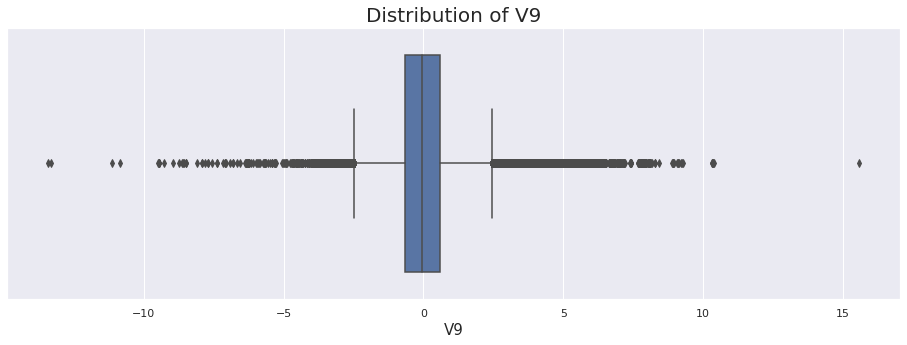

In [57]:
plot_box_graph(series=raw_data.V9)

#### In the above graph, we see that the graph is somewhat evenly distributed
#### So we will leave it as it is

## 4.14. V10

In [58]:
raw_data.V10.describe(percentiles=np.linspace(0, 1, 11))

count    281958.000000
mean         -0.000272
std           1.079361
min         -24.588262
0%          -24.588262
10%          -1.026294
20%          -0.662930
30%          -0.424250
40%          -0.247449
50%          -0.092997
60%           0.058647
70%           0.267108
80%           0.644882
90%           1.110393
100%         23.745136
max          23.745136
Name: V10, dtype: float64

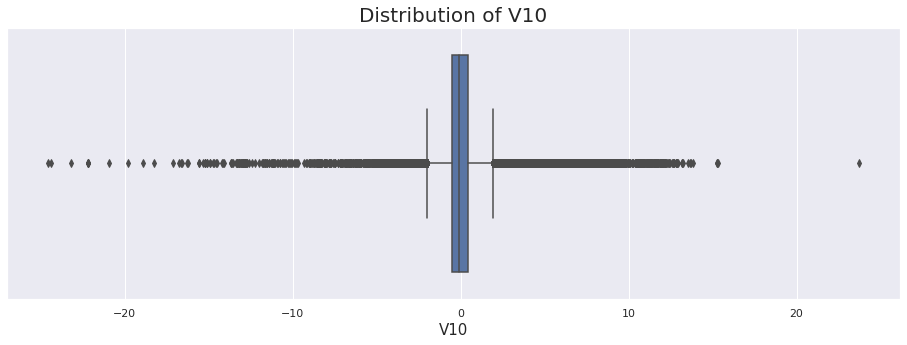

In [59]:
plot_box_graph(series=raw_data.V10)

#### In the above graph, we see that the graph is somewhat evenly distributed
#### Let's calculate the number of minority class instances that would have been reduced on removing outliers

In [60]:
check_class_distribution_on_handling_outlier(series_name='V10', quantile_val_low=0.00, quantile_val_high=0.99)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       278654        |        5661         |      1.99 %      |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         484         |          8          |      1.63 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by less than 2%
#### Therefore we can drop these values

In [61]:
raw_data = raw_data[
    (raw_data['V10'] >= raw_data['V10'].quantile(0.0)) & 
    (raw_data['V10'] <= raw_data['V10'].quantile(0.99))
]

## 4.15. V11

In [62]:
raw_data.V11.describe(percentiles=np.linspace(0, 1, 11))

count    279138.000000
mean         -0.007872
std           1.014332
min          -4.797473
0%           -4.797473
10%          -1.290238
20%          -0.919839
30%          -0.617339
40%          -0.323488
50%          -0.040333
60%           0.258678
70%           0.569269
80%           0.902688
90%           1.307149
100%         12.018913
max          12.018913
Name: V11, dtype: float64

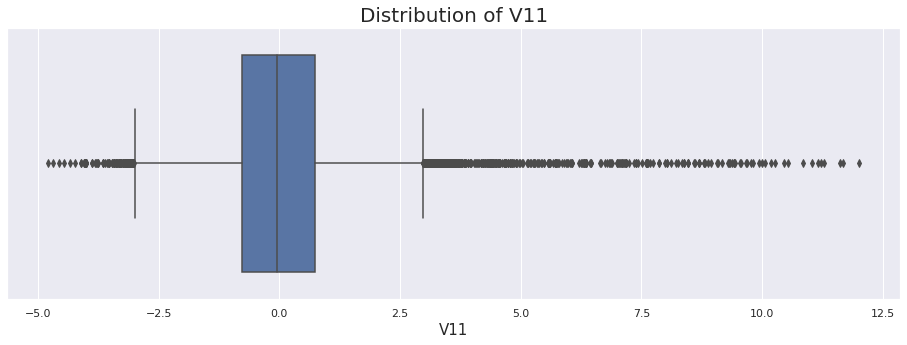

In [63]:
plot_box_graph(series=raw_data.V11)

#### In the above graph, we see that the graph is highly skewed towards right side (i.e. Positive Skewed)
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [64]:
check_class_distribution_on_handling_outlier(series_name='V11', quantile_val_low=0.0, quantile_val_high=0.99)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       276209        |        8106         |      2.85 %      |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         140         |         352         |     71.54 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by 71% if we treat outliers and drop them and since minority class values are so low, we cannot afford to drop these many values at once.
#### Thus we, will continue to keep these outliers

## 4.16. V12

In [65]:
raw_data.V12.describe(percentiles=np.linspace(0, 1, 11))

count    279138.000000
mean         -0.000842
std           0.996788
min         -18.683715
0%          -18.683715
10%          -1.144797
20%          -0.569716
30%          -0.270221
40%          -0.049328
50%           0.140218
60%           0.324190
70%           0.515100
80%           0.727921
90%           1.013370
100%          7.848392
max           7.848392
Name: V12, dtype: float64

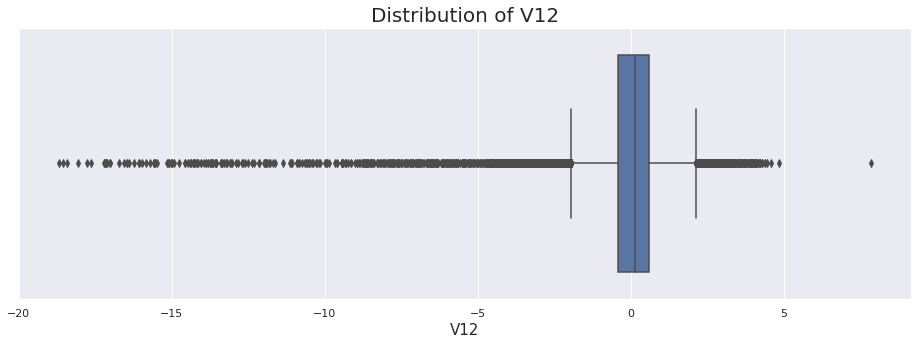

In [66]:
plot_box_graph(series=raw_data.V12)

#### In the above graph, we see that the graph is highly skewed towards left side (i.e. Negative Skewed)
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [67]:
check_class_distribution_on_handling_outlier(series_name='V12', quantile_val_low=0.01, quantile_val_high=1.00)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       276225        |        8090         |      2.85 %      |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         121         |         371         |     75.41 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by 75% if we treat outliers and drop them and since minority class values are so low, we cannot afford to drop these many values at once.
#### Thus we, will continue to keep these outliers

## 4.17. V13

In [68]:
raw_data.V13.describe(percentiles=np.linspace(0, 1, 11))

count    279138.000000
mean         -0.001205
std           0.995431
min          -5.791881
0%           -5.791881
10%          -1.282877
20%          -0.826491
30%          -0.498663
40%          -0.240428
50%          -0.014296
60%           0.228102
70%           0.504737
80%           0.828888
90%           1.251484
100%          4.569009
max           4.569009
Name: V13, dtype: float64

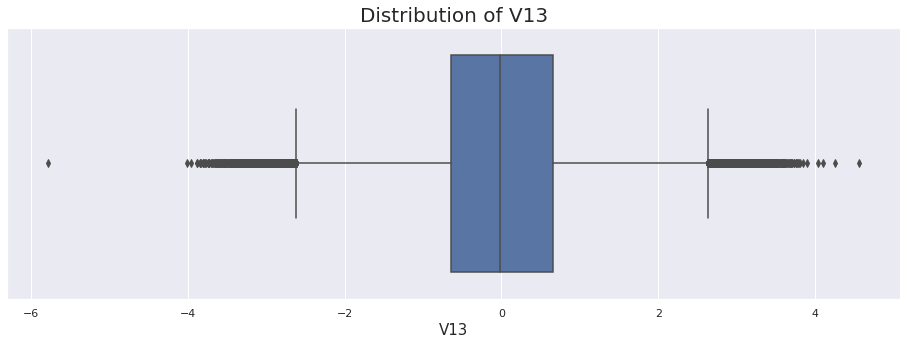

In [69]:
plot_box_graph(series=raw_data.V13)

#### In the above graph, we see that the graph is somewhat evenly distributed
#### So we will leave it as it is

## 4.18. V14

In [70]:
raw_data.V14.describe(percentiles=np.linspace(0, 1, 11))

count    279138.000000
mean          0.012170
std           0.932997
min         -19.214325
0%          -19.214325
10%          -0.973611
20%          -0.551627
30%          -0.303608
40%          -0.113821
50%           0.054373
60%           0.218405
70%           0.394280
80%           0.607267
90%           0.976865
100%         10.526766
max          10.526766
Name: V14, dtype: float64

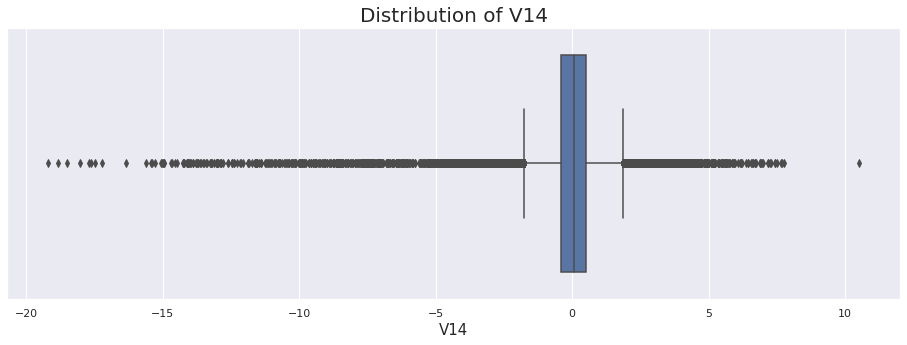

In [71]:
plot_box_graph(series=raw_data.V14)

#### In the above graph, we see that the graph is highly skewed towards left side (i.e. Negative Skewed)
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [72]:
check_class_distribution_on_handling_outlier(series_name='V14', quantile_val_low=0.01, quantile_val_high=1.00)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       276271        |        8044         |      2.83 %      |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         75          |         417         |     84.76 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by 85% if we treat outliers and drop them and since minority class values are so low, we cannot afford to drop these many values at once.
#### Thus we, will continue to keep these outliers

## 4.19. V15

In [73]:
raw_data.V15.describe(percentiles=np.linspace(0, 1, 11))

count    279138.000000
mean         -0.005729
std           0.911320
min          -4.498945
0%           -4.498945
10%          -1.176971
20%          -0.752317
30%          -0.441834
40%          -0.193257
50%           0.043310
60%           0.267670
70%           0.508997
80%           0.789387
90%           1.118100
100%          4.198583
max           4.198583
Name: V15, dtype: float64

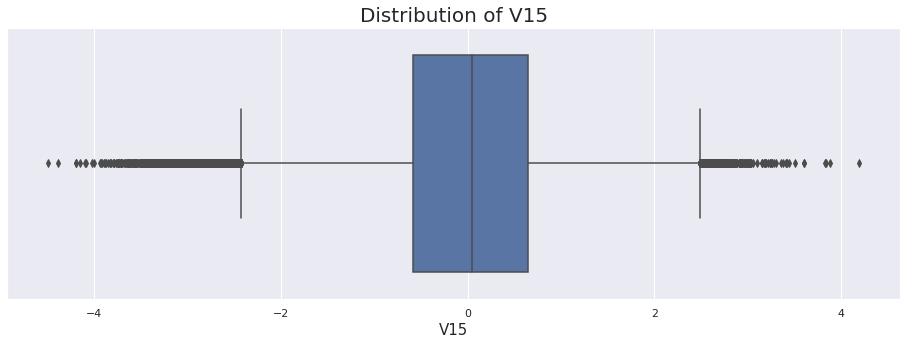

In [74]:
plot_box_graph(series=raw_data.V15)

#### In the above graph, we see that the graph is somewhat evenly distributed
#### So we will leave it as it is

## 4.20. V16

In [75]:
raw_data.V16.describe(percentiles=np.linspace(0, 1, 11))

count    279138.000000
mean          0.002380
std           0.867200
min         -14.129855
0%          -14.129855
10%          -1.046173
20%          -0.606022
30%          -0.335743
40%          -0.120471
50%           0.069727
60%           0.243562
70%           0.427137
80%           0.640368
90%           0.985648
100%          5.477283
max           5.477283
Name: V16, dtype: float64

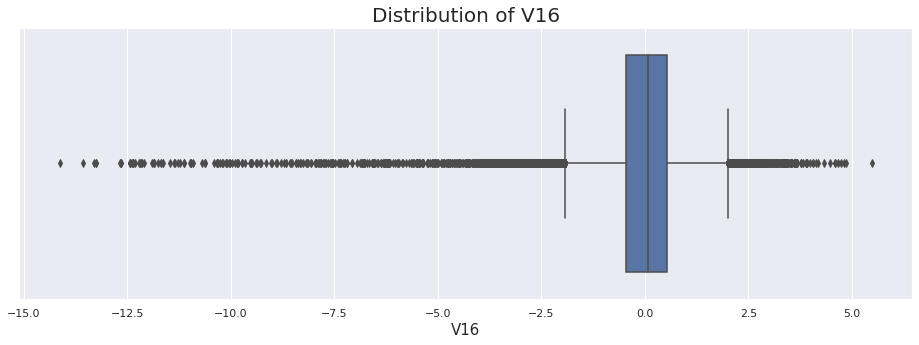

In [76]:
plot_box_graph(series=raw_data.V16)

#### In the above graph, we see that the graph is highly skewed towards left side (i.e. Negative Skewed)
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [77]:
check_class_distribution_on_handling_outlier(series_name='V16', quantile_val_low=0.01, quantile_val_high=1.00)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       276177        |        8138         |      2.86 %      |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         169         |         323         |     65.65 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by 65% if we treat outliers and drop them and since minority class values are so low, we cannot afford to drop these many values at once.
#### Thus we, will continue to keep these outliers

## 4.21. V17

In [78]:
raw_data.V17.describe(percentiles=np.linspace(0, 1, 11))

count    279138.000000
mean          0.003504
std           0.845334
min         -25.162799
0%          -25.162799
10%          -0.796075
20%          -0.570700
30%          -0.392796
40%          -0.232574
50%          -0.063879
60%           0.105970
70%           0.297197
80%           0.518409
90%           0.907410
100%          9.253526
max           9.253526
Name: V17, dtype: float64

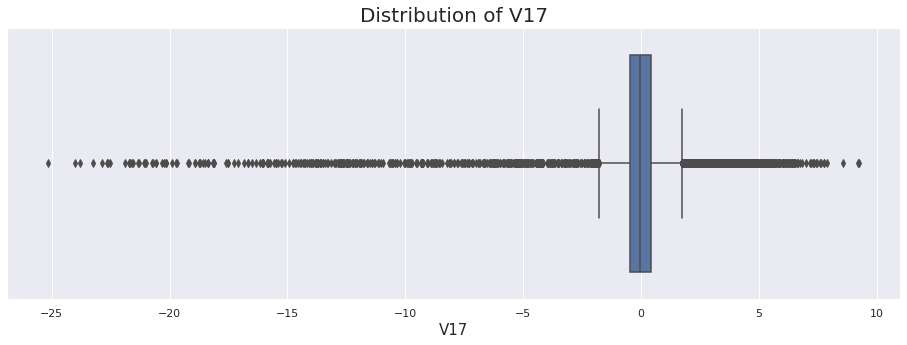

In [79]:
plot_box_graph(series=raw_data.V17)

#### In the above graph, we see that the graph is highly skewed towards left side (i.e. Negative Skewed)
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [80]:
check_class_distribution_on_handling_outlier(series_name='V17', quantile_val_low=0.01, quantile_val_high=1.00)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       276227        |        8088         |      2.84 %      |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         119         |         373         |     75.81 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by 76% if we treat outliers and drop them and since minority class values are so low, we cannot afford to drop these many values at once.
#### Thus we, will continue to keep these outliers

## 4.22. V18

In [81]:
raw_data.V18.describe(percentiles=np.linspace(0, 1, 11))

count    279138.000000
mean          0.002542
std           0.834653
min          -9.498746
0%           -9.498746
10%          -0.972767
20%          -0.622502
30%          -0.381708
40%          -0.181894
50%          -0.000448
60%           0.184176
70%           0.384057
80%           0.637520
90%           1.018396
100%          4.295648
max           4.295648
Name: V18, dtype: float64

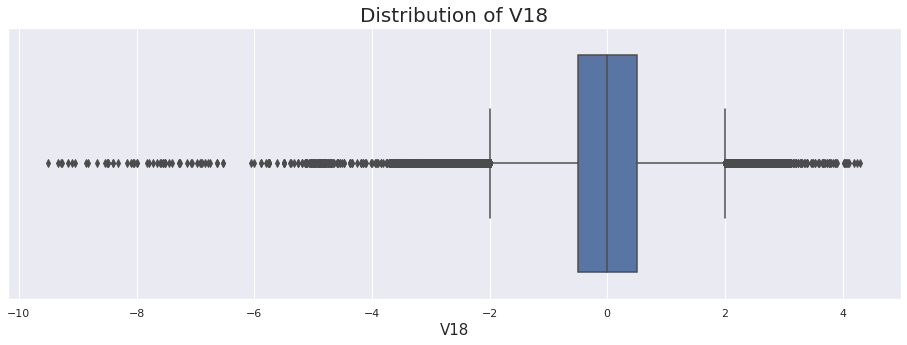

In [82]:
plot_box_graph(series=raw_data.V18)

#### In the above graph, we see that the graph is highly skewed towards left side (i.e. Negative Skewed)
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [83]:
check_class_distribution_on_handling_outlier(series_name='V18', quantile_val_low=0.01, quantile_val_high=1.00)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       276082        |        8233         |      2.9 %       |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         264         |         228         |     46.34 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by 46% if we treat outliers and drop them and since minority class values are so low, we cannot afford to drop these many values at once.
#### Thus we, will continue to keep these outliers

## 4.23. V19

In [84]:
raw_data.V19.describe(percentiles=np.linspace(0, 1, 11))

count    279138.000000
mean          0.004171
std           0.807585
min          -4.932733
0%           -4.932733
10%          -0.975013
20%          -0.573589
30%          -0.337248
40%          -0.156902
50%           0.008547
60%           0.170988
70%           0.350946
80%           0.586898
90%           0.951633
100%          5.228342
max           5.228342
Name: V19, dtype: float64

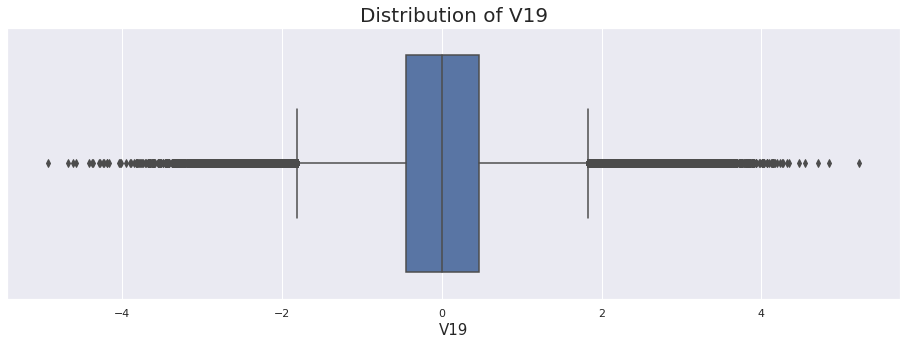

In [85]:
plot_box_graph(series=raw_data.V19)

#### In the above graph, we see that the graph is somewhat evenly distributed
#### So we will leave it as it is

## 4.24. V20

In [86]:
raw_data.V20.describe(percentiles=np.linspace(0, 1, 11))

count    279138.000000
mean         -0.024691
std           0.483121
min         -10.637028
0%          -10.637028
10%          -0.384792
20%          -0.251070
30%          -0.179849
40%          -0.122771
50%          -0.065885
60%          -0.001115
70%           0.075157
80%           0.180081
90%           0.392147
100%         16.756448
max          16.756448
Name: V20, dtype: float64

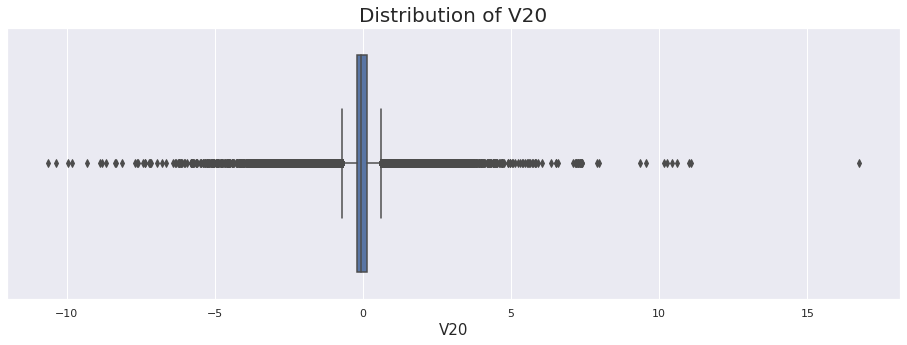

In [87]:
plot_box_graph(series=raw_data.V20)

#### In the above graph, we see that the graph is highly skewed towards right side (i.e. Positive Skewed)
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [88]:
check_class_distribution_on_handling_outlier(series_name='V20', quantile_val_low=0.0, quantile_val_high=0.99)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       275915        |        8400         |      2.95 %      |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         431         |         61          |      12.4 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by 12% if we treat outliers and drop them and since minority class values are so low, we cannot afford to drop these many values at once.
#### Thus we, will continue to keep these outliers

## 4.25. V21

In [89]:
raw_data.V21.describe(percentiles=np.linspace(0, 1, 11))

count    279138.000000
mean          0.002933
std           0.695240
min         -34.830382
0%          -34.830382
10%          -0.356216
20%          -0.262175
30%          -0.183607
40%          -0.103548
50%          -0.028070
60%           0.050638
70%           0.136625
80%           0.232182
90%           0.366289
100%         27.202839
max          27.202839
Name: V21, dtype: float64

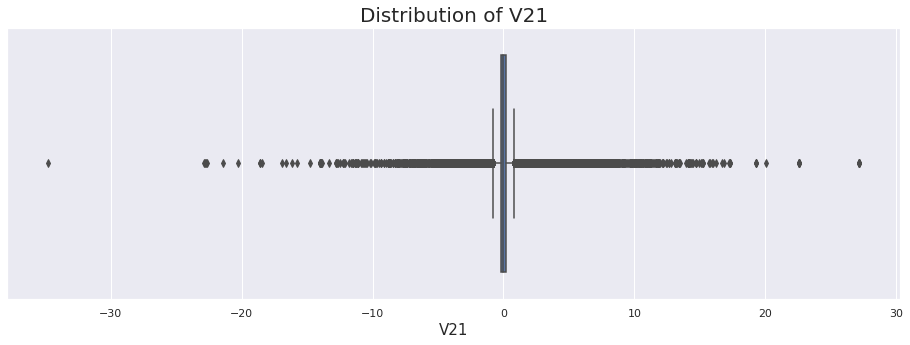

In [90]:
plot_box_graph(series=raw_data.V21)

#### In the above graph, we see that the graph is slightly
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [91]:
check_class_distribution_on_handling_outlier(series_name='V21', quantile_val_low=0.01, quantile_val_high=1.00)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       275899        |        8416         |      2.96 %      |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         447         |         45          |      9.15 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by 9% if we treat outliers and drop them and since minority class values are so low, we cannot afford to drop these many values at once.
#### Thus we, will continue to keep these outliers

## 4.26. V22

In [92]:
raw_data.V22.describe(percentiles=np.linspace(0, 1, 11))

count    279138.000000
mean          0.003339
std           0.716121
min          -8.887017
0%           -8.887017
10%          -0.859730
20%          -0.637478
30%          -0.430305
40%          -0.198548
50%           0.008369
60%           0.201063
70%           0.412008
80%           0.647589
90%           0.913037
100%         10.503090
max          10.503090
Name: V22, dtype: float64

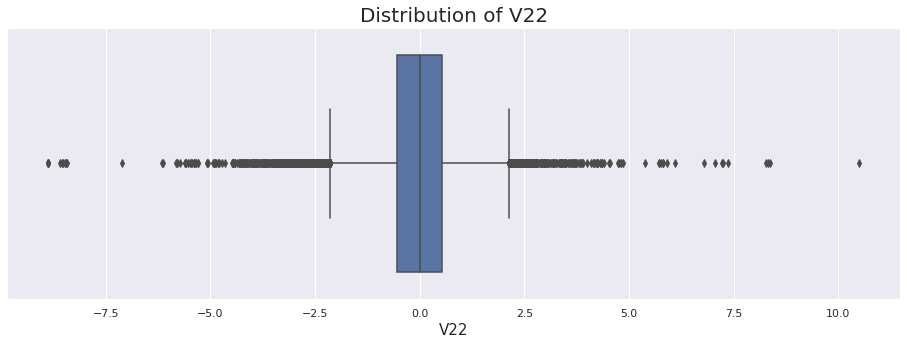

In [93]:
plot_box_graph(series=raw_data.V22)

#### In the above graph, we see that the graph is slightly skewed towards both the sides
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [94]:
check_class_distribution_on_handling_outlier(series_name='V22', quantile_val_low=0.005, quantile_val_high=0.995)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       275898        |        8417         |      2.96 %      |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         448         |         44          |      8.94 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by 9% if we treat outliers and drop them and since minority class values are so low, we cannot afford to drop these many values at once.
#### Thus we, will continue to keep these outliers

## 4.27. V23

In [95]:
raw_data.V23.describe(percentiles=np.linspace(0, 1, 11))

count    279138.000000
mean         -0.001188
std           0.438847
min         -23.222016
0%          -23.222016
10%          -0.320417
20%          -0.200521
30%          -0.124658
40%          -0.064591
50%          -0.011388
60%           0.043751
70%           0.107243
80%           0.190211
90%           0.333047
100%          7.441508
max           7.441508
Name: V23, dtype: float64

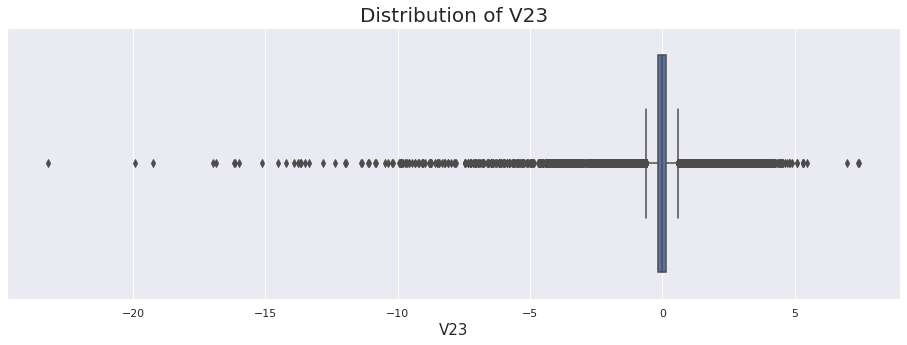

In [96]:
plot_box_graph(series=raw_data.V23)

#### In the above graph, we see that the graph is highly skewed towards left side (i.e. Negative Skewed)
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [97]:
check_class_distribution_on_handling_outlier(series_name='V23', quantile_val_low=0.01, quantile_val_high=1.00)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       275904        |        8411         |      2.96 %      |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         442         |         50          |     10.16 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by 10% if we treat outliers and drop them and since minority class values are so low, we cannot afford to drop these many values at once.
#### Thus we, will continue to keep these outliers

## 4.28. V24

In [98]:
raw_data.V24.describe(percentiles=np.linspace(0, 1, 11))

count    279138.000000
mean         -0.000200
std           0.604703
min          -2.836627
0%           -2.836627
10%          -0.870075
20%          -0.443879
30%          -0.264100
40%          -0.045543
50%           0.040879
60%           0.165369
70%           0.374026
80%           0.531929
90%           0.704996
100%          4.022866
max           4.022866
Name: V24, dtype: float64

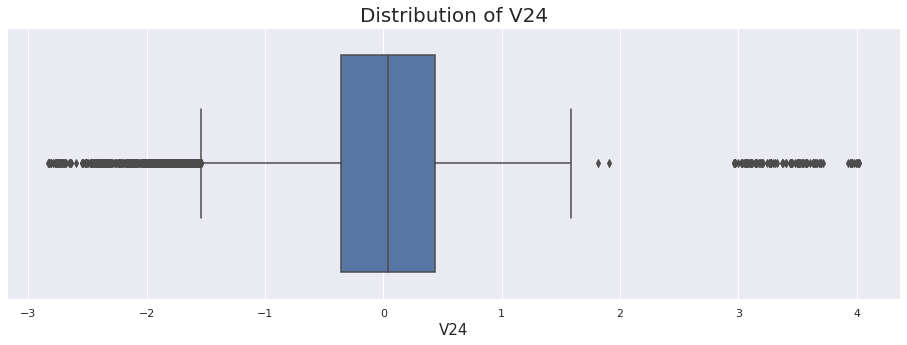

In [99]:
plot_box_graph(series=raw_data.V24)

#### In the above graph, we see that the graph is highly skewed towards right side (i.e. Positive Skewed)
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [100]:
check_class_distribution_on_handling_outlier(series_name='V24', quantile_val_low=0.0, quantile_val_high=0.99)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       275863        |        8452         |      2.97 %      |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         483         |          9          |      1.83 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by 1.8%
#### Therefore we can drop these values

In [101]:
raw_data = raw_data[
    (raw_data['V24'] >= raw_data['V24'].quantile(0.0)) & 
    (raw_data['V24'] <= raw_data['V24'].quantile(0.99))
]

## 4.29. V25

In [102]:
raw_data.V25.describe(percentiles=np.linspace(0, 1, 11))

count    276346.000000
mean         -0.003232
std           0.504381
min          -4.930750
0%           -4.930750
10%          -0.600389
20%          -0.389998
30%          -0.258563
40%          -0.130478
50%           0.013253
60%           0.155043
70%           0.280808
80%           0.412698
90%           0.590679
100%          2.791635
max           2.791635
Name: V25, dtype: float64

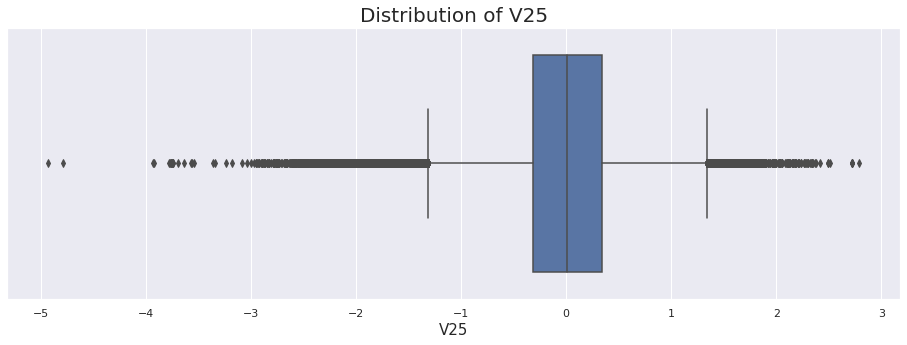

In [103]:
plot_box_graph(series=raw_data.V25)

#### In the above graph, we see that the graph is highly skewed towards left side (i.e. Negative Skewed)
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [104]:
check_class_distribution_on_handling_outlier(series_name='V25', quantile_val_low=0.01, quantile_val_high=1.00)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       273126        |        11189        |      3.94 %      |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         456         |         36          |      7.32 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by 7% if we treat outliers and drop them and since minority class values are so low, we cannot afford to drop these many values at once.
#### Thus we, will continue to keep these outliers

## 4.30. V26

In [105]:
raw_data.V26.describe(percentiles=np.linspace(0, 1, 11))

count    276346.000000
mean         -0.001413
std           0.479847
min          -1.855355
0%           -1.855355
10%          -0.546450
20%          -0.388848
30%          -0.274813
40%          -0.166962
50%          -0.053530
60%           0.085690
70%           0.173747
80%           0.353791
90%           0.683632
100%          3.517346
max           3.517346
Name: V26, dtype: float64

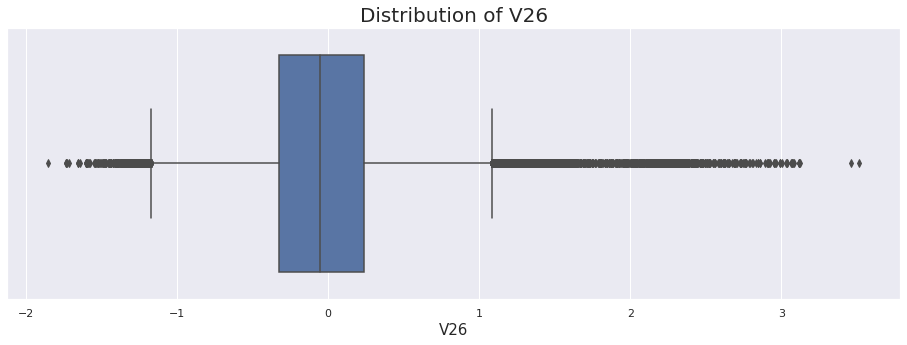

In [106]:
plot_box_graph(series=raw_data.V26)

#### In the above graph, we see that the graph is highly skewed towards right side (i.e. Positive Skewed)
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [107]:
check_class_distribution_on_handling_outlier(series_name='V26', quantile_val_low=0.0, quantile_val_high=0.99)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       273106        |        11209        |      3.94 %      |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         476         |         16          |      3.25 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by XXXX% if we treat outliers and drop them and since minority class values are so low, we cannot afford to drop these many values at once.
#### Thus we, will continue to keep these outliers

In [108]:
raw_data = raw_data[
    (raw_data['V26'] >= raw_data['V26'].quantile(0.0)) & 
    (raw_data['V26'] <= raw_data['V26'].quantile(0.99))
]

## 4.31. V27

In [109]:
raw_data.V27.describe(percentiles=np.linspace(0, 1, 11))

count    273582.000000
mean         -0.002121
std           0.313383
min          -8.878665
0%           -8.878665
10%          -0.194201
20%          -0.086487
30%          -0.051504
40%          -0.022937
50%           0.002363
60%           0.029501
70%           0.062343
80%           0.130625
90%           0.256887
100%          6.211230
max           6.211230
Name: V27, dtype: float64

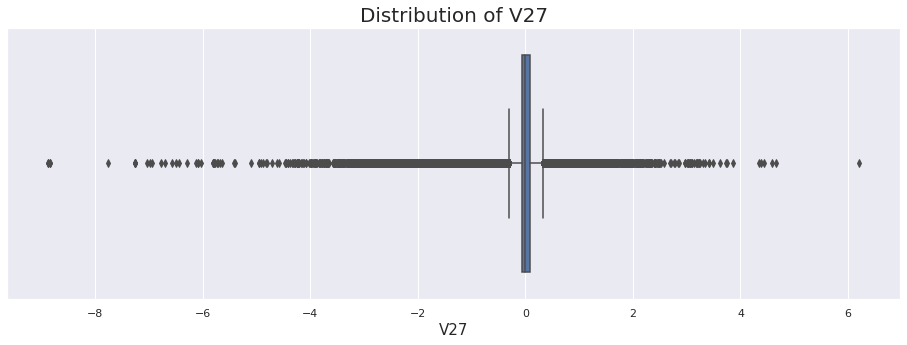

In [110]:
plot_box_graph(series=raw_data.V27)

#### In the above graph, we see that the graph is highly skewed towards left side (i.e. Negative Skewed)
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [111]:
check_class_distribution_on_handling_outlier(series_name='V27', quantile_val_low=0.01, quantile_val_high=1.00)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       270426        |        13889        |      4.89 %      |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         420         |         72          |     14.63 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by 14% if we treat outliers and drop them and since minority class values are so low, we cannot afford to drop these many values at once.
#### Thus we, will continue to keep these outliers

## 4.32. V28

In [112]:
raw_data.V28.describe(percentiles=np.linspace(0, 1, 11))

count    273582.000000
mean          0.001258
std           0.196892
min          -8.364853
0%           -8.364853
10%          -0.144941
20%          -0.063960
30%          -0.039570
40%          -0.011405
50%           0.011298
60%           0.026587
70%           0.051615
80%           0.098218
90%           0.171572
100%          5.678671
max           5.678671
Name: V28, dtype: float64

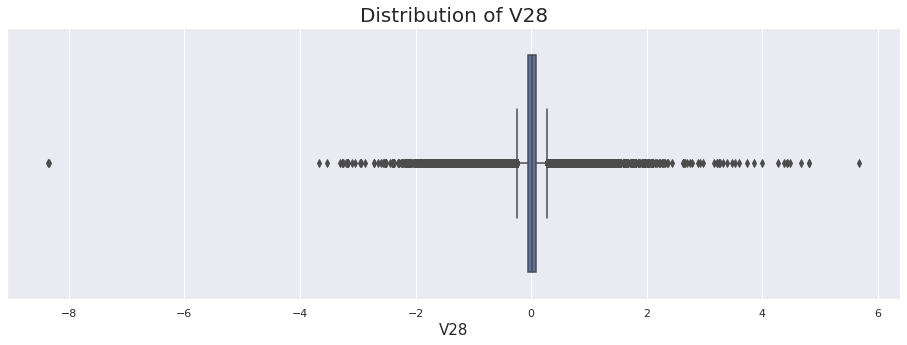

In [113]:
plot_box_graph(series=raw_data.V28)

#### In the above graph, we see that the graph is highly skewed towards left side (i.e. Negative Skewed)
#### In such cases, the better approach is dropping off outliers which is highly impacting this skewed behaviour
#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance even more?
#### Let's calculate the number of minority class instances that would have been reduced

In [114]:
check_class_distribution_on_handling_outlier(series_name='V28', quantile_val_low=0.01, quantile_val_high=1.00)

+---------+---------------+---------------------+---------------------+------------------+
|  Class  |   Raw Data    |     Data Values     |     Data Values     |   Percent Drop   |
|         |  Value Count  |   RETAINED after    |    DROPPED after    |  In Data Values  |
|         |               |  Outlier Treatment  |  Outlier Treatment  |                  |
+=========+===============+=====================+=====================+==================+
| Class 0 |    284315     |       270416        |        13899        |      4.89 %      |
+---------+---------------+---------------------+---------------------+------------------+
| Class 1 |      492      |         430         |         62          |      12.6 %      |
+---------+---------------+---------------------+---------------------+------------------+


#### Here, we see that number of minority class values will go down by 12.6% if we treat outliers and drop them and since minority class values are so low, we cannot afford to drop these many values at once.
#### Thus we, will continue to keep these outliers

# 5. <a id = "header1_5">Data Preprocesing for Modelling</a>

## 5.1. Define Input & Output values

In [115]:
y = raw_data.pop('Class')

In [116]:
X = raw_data

## 5.2. Splitting Data as Train & Test Data

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=314, stratify=y)

In [121]:
y_train.value_counts()

0    218484
1       381
Name: Class, dtype: int64

In [122]:
y_test.value_counts()

0    54622
1       95
Name: Class, dtype: int64

## 5.3. Creating Metrics Dictionary

In [123]:
metrics_dict = {
    'imbalanced': {
        'logistics': {
            'accuracy': None,
            'sensitivity': None,
            'specificity': None,
            'precision': None,
            'recall': None,
            'f1': None,
            'auc': None
        },
        'dt': {
            'accuracy': None,
            'sensitivity': None,
            'specificity': None,
            'precision': None,
            'recall': None,
            'f1': None,
            'auc': None
        },
        'rf': {
            'accuracy': None,
            'sensitivity': None,
            'specificity': None,
            'precision': None,
            'recall': None,
            'f1': None,
            'auc': None
        },
        'gb': {
            'accuracy': None,
            'sensitivity': None,
            'specificity': None,
            'precision': None,
            'recall': None,
            'f1': None,
            'auc': None
        },
        'xgb': {
            'accuracy': None,
            'sensitivity': None,
            'specificity': None,
            'precision': None,
            'recall': None,
            'f1': None,
            'auc': None
        },
        'ann': {
            'accuracy': None,
            'sensitivity': None,
            'specificity': None,
            'precision': None,
            'recall': None,
            'f1': None,
            'auc': None
        },
    },

    'random_oversample': {
        'logistics': {
            'accuracy': None,
            'sensitivity': None,
            'specificity': None,
            'precision': None,
            'recall': None,
            'f1': None,
            'auc': None
        },
        'dt': {
            'accuracy': None,
            'sensitivity': None,
            'specificity': None,
            'precision': None,
            'recall': None,
            'f1': None,
            'auc': None
        },
        'rf': {
            'accuracy': None,
            'sensitivity': None,
            'specificity': None,
            'precision': None,
            'recall': None,
            'f1': None,
            'auc': None
        },
        'gb': {
            'accuracy': None,
            'sensitivity': None,
            'specificity': None,
            'precision': None,
            'recall': None,
            'f1': None,
            'auc': None
        },
        'xgb': {
            'accuracy': None,
            'sensitivity': None,
            'specificity': None,
            'precision': None,
            'recall': None,
            'f1': None,
            'auc': None
        },
        'ann': {
            'accuracy': None,
            'sensitivity': None,
            'specificity': None,
            'precision': None,
            'recall': None,
            'f1': None,
            'auc': None
        },
    },

    'smote': {
        'logistics': {
            'accuracy': None,
            'sensitivity': None,
            'specificity': None,
            'precision': None,
            'recall': None,
            'f1': None,
            'auc': None
        },
        'dt': {
            'accuracy': None,
            'sensitivity': None,
            'specificity': None,
            'precision': None,
            'recall': None,
            'f1': None,
            'auc': None
        },
        'rf': {
            'accuracy': None,
            'sensitivity': None,
            'specificity': None,
            'precision': None,
            'recall': None,
            'f1': None,
            'auc': None
        },
        'gb': {
            'accuracy': None,
            'sensitivity': None,
            'specificity': None,
            'precision': None,
            'recall': None,
            'f1': None,
            'auc': None
        },
        'xgb': {
            'accuracy': None,
            'sensitivity': None,
            'specificity': None,
            'precision': None,
            'recall': None,
            'f1': None,
            'auc': None
        },
        'ann': {
            'accuracy': None,
            'sensitivity': None,
            'specificity': None,
            'precision': None,
            'recall': None,
            'f1': None,
            'auc': None
        },
    },

    'adasync': {
        'logistics': {
            'accuracy': None,
            'sensitivity': None,
            'specificity': None,
            'precision': None,
            'recall': None,
            'f1': None,
            'auc': None
        },
        'dt': {
            'accuracy': None,
            'sensitivity': None,
            'specificity': None,
            'precision': None,
            'recall': None,
            'f1': None,
            'auc': None
        },
        'rf': {
            'accuracy': None,
            'sensitivity': None,
            'specificity': None,
            'precision': None,
            'recall': None,
            'f1': None,
            'auc': None
        },
        'gb': {
            'accuracy': None,
            'sensitivity': None,
            'specificity': None,
            'precision': None,
            'recall': None,
            'f1': None,
            'auc': None
        },
        'xgb': {
            'accuracy': None,
            'sensitivity': None,
            'specificity': None,
            'precision': None,
            'recall': None,
            'f1': None,
            'auc': None
        },
        'ann': {
            'accuracy': None,
            'sensitivity': None,
            'specificity': None,
            'precision': None,
            'recall': None,
            'f1': None,
            'auc': None
        },
    },
}

# 6. <a id = "header1_6">Data Modelling on Sampled Data</a>

## 6.1. <a id = "header2_6_1">Logistic Regression</a>

In [128]:
logreg = LogisticRegression()
model = logreg.fit(X_train, y_train)
pred_probs_train = model.predict_proba(X_train)

In [129]:
y_train_pred_final = pd.DataFrame(y_train)
y_train_pred_final['class_probability'] = pred_probs_train[:,1]
numbers = np.arange(0.0, 0.0020, 0.0001)
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.class_probability.map(lambda x: 1 if x > i else 0)

In [130]:
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])
for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Class, y_train_pred_final[i])
    accuracy = (cm1[0, 0] + cm1[1, 1]) / sum(sum(cm1))
    speci = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])
    sensi = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1])
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]
cutoff_df

prob  accuracy     sensi     speci
0.0000  0.0000  0.001741  1.000000  0.000000
0.0001  0.0001  0.313517  0.986877  0.312343
0.0002  0.0002  0.548955  0.976378  0.548209
0.0003  0.0003  0.694227  0.971129  0.693744
0.0004  0.0004  0.775716  0.963255  0.775389
0.0005  0.0005  0.827675  0.958005  0.827447
0.0006  0.0006  0.864775  0.952756  0.864622
0.0007  0.0007  0.890618  0.942257  0.890527
0.0008  0.0008  0.909090  0.942257  0.909032
0.0009  0.0009  0.923341  0.937008  0.923317
0.0010  0.0010  0.934060  0.926509  0.934073
0.0011  0.0011  0.942398  0.921260  0.942435
0.0012  0.0012  0.949247  0.918635  0.949301
0.0013  0.0013  0.954694  0.910761  0.954770
0.0014  0.0014  0.959532  0.908136  0.959622
0.0015  0.0015  0.963448  0.905512  0.963549
0.0016  0.0016  0.966742  0.905512  0.966849
0.0017  0.0017  0.969689  0.902887  0.969806
0.0018  0.0018  0.972275  0.902887  0.972396
0.0019  0.0019  0.974377  0.902887  0.974502

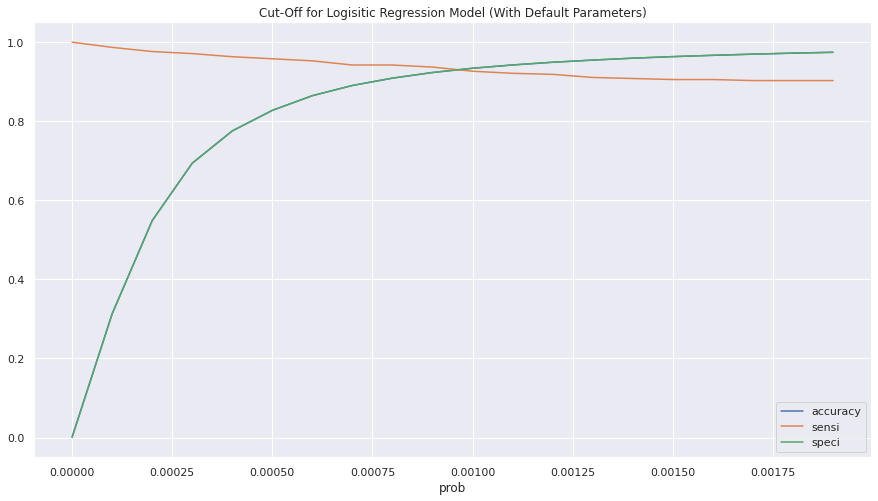

In [131]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.title('Cut-Off for Logisitic Regression Model (With Default Parameters)')
plt.show()

#### From the curve above, 0.0011 seems to be the optimum point to take it as a cutoff probability.

In [132]:
cut_off = 0.0011

In [133]:
conf_matrix = metrics.confusion_matrix(y_train_pred_final.Class, y_train_pred_final[cut_off])

TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

accuracy_score = metrics.accuracy_score(y_train_pred_final.Class, y_train_pred_final[cut_off])
accuracy_score = round(accuracy_score*100, 2)

precision_score = metrics.precision_score(y_train_pred_final.Class, y_train_pred_final[cut_off])
precision_score = round(precision_score*100, 2)

recall_score = metrics.recall_score(y_train_pred_final.Class, y_train_pred_final[cut_off])
recall_score = round(recall_score*100, 2)

sensitivity = TP / float(FN + TP)
sensitivity = round(sensitivity*100, 2)

specificity = TN / float(TN + FP)
specificity = round(specificity*100, 2)

f1_score = metrics.f1_score(y_train_pred_final.Class, y_train_pred_final[cut_off])
f1_score = round(f1_score*100, 2)

auc_score = metrics.roc_auc_score(y_train_pred_final.Class, y_train_pred_final.class_probability)
auc_score = round(auc_score*100, 2)

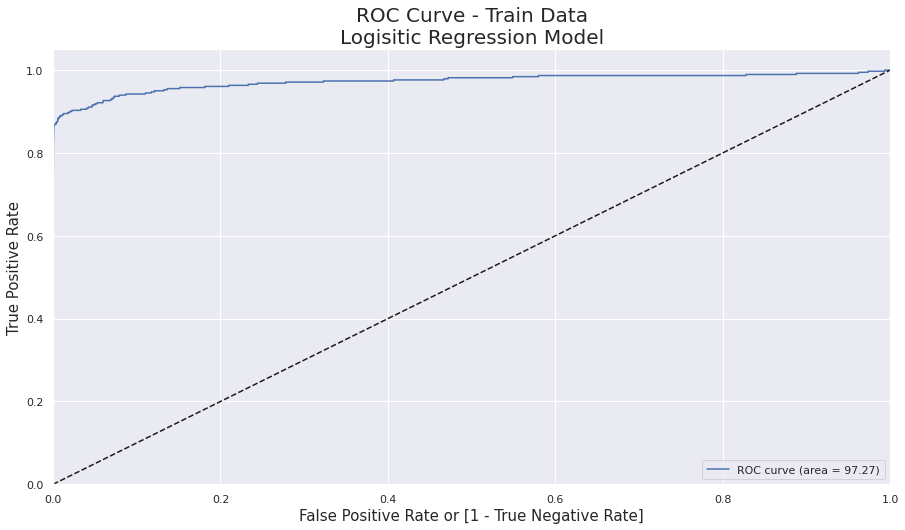

In [134]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Class, y_train_pred_final.class_probability, drop_intermediate=False )
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]', fontdict={'fontsize': 15})
plt.ylabel('True Positive Rate', fontdict={'fontsize': 15})
plt.title('ROC Curve - Train Data\nLogisitic Regression Model', fontdict={'fontsize': 20})
plt.legend(loc="lower right")
plt.show()

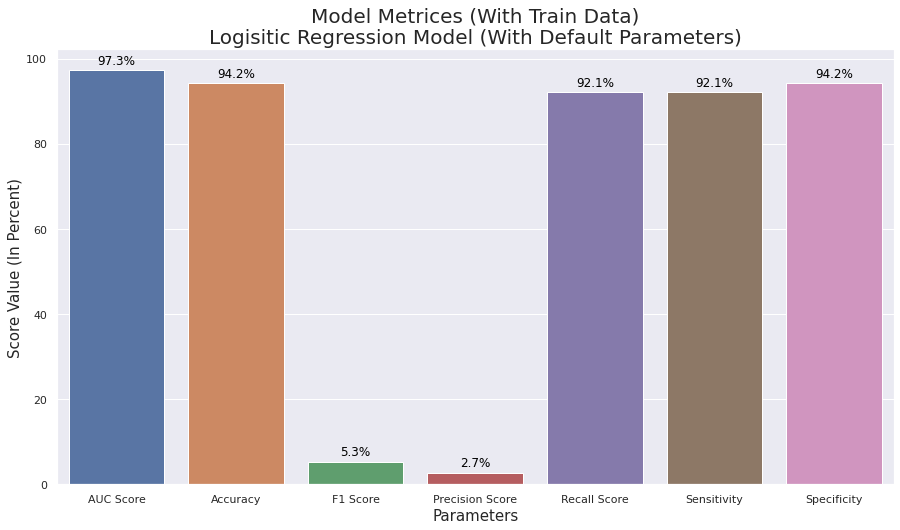

In [135]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision Score', 'Recall Score', 'F1 Score', 'AUC Score'],
                     'Value': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score]}, index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision Score', 'Recall Score', 'F1 Score', 'AUC Score'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('Model Metrices (With Train Data)\nLogisitic Regression Model (With Default Parameters)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

### 6.3.2. Test Data

In [136]:
pred_probs_test = model.predict_proba(X_test)

In [137]:
metrics.roc_auc_score(y_test, pred_probs_test[:,1])

0.9817829330383554

In [138]:
y_test_pred_final = pd.DataFrame(y_test)
y_test_pred_final['class_probability'] = pred_probs_test[:,1]
y_test_pred_final['class_predicted'] = y_test_pred_final.class_probability.map(lambda x: 1 if x > cut_off else 0)
y_test_pred_final

Class  class_probability  class_predicted
93660       0           0.000275                0
184313      0           0.000067                0
849         0           0.000211                0
36763       0           0.000710                0
98883       0           0.000182                0
...       ...                ...              ...
164287      0           0.000065                0
105359      0           0.000126                0
177345      0           0.000179                0
113054      0           0.000056                0
273719      0           0.000414                0

[54717 rows x 3 columns]

In [139]:
conf_matrix_test = metrics.confusion_matrix(y_test_pred_final.Class, y_test_pred_final.class_predicted)

TN_test = conf_matrix[0, 0]
FP_test = conf_matrix[0, 1]
FN_test = conf_matrix[1, 0]
TP_test = conf_matrix[1, 1]

accuracy_score_test = metrics.accuracy_score(y_test_pred_final.Class, y_test_pred_final.class_predicted)
accuracy_score_test = round(accuracy_score_test*100, 2)

precision_score_test = metrics.precision_score(y_test_pred_final.Class, y_test_pred_final.class_predicted)
precision_score_test = round(precision_score_test*100, 2)

recall_score_test = metrics.recall_score(y_test_pred_final.Class, y_test_pred_final.class_predicted)
recall_score_test = round(recall_score_test*100, 2)

sensitivity_test = TP_test / float(FN_test + TP_test)
sensitivity_test = round(sensitivity_test*100, 2)

specificity_test = TN_test / float(TN_test + FP_test)
specificity_test = round(specificity_test*100, 2)

f1_score_test = metrics.f1_score(y_test_pred_final.Class, y_test_pred_final.class_predicted)
f1_score_test = round(f1_score_test*100, 2)

auc_score_test = metrics.roc_auc_score(y_test_pred_final.Class, y_test_pred_final.class_probability)
auc_score_test = round(auc_score_test*100, 2)

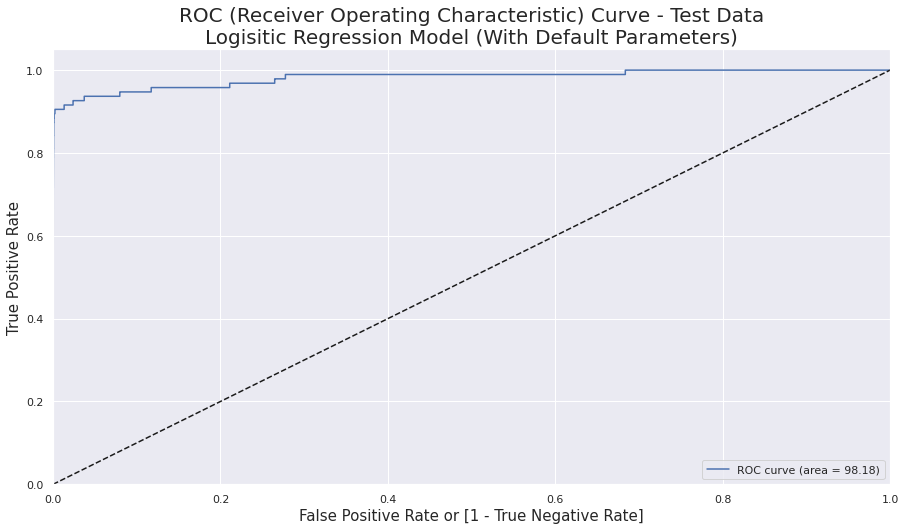

In [140]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_pred_final.Class, y_test_pred_final.class_probability, drop_intermediate=False )
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]', fontdict={'fontsize': 15})
plt.ylabel('True Positive Rate', fontdict={'fontsize': 15})
plt.title('ROC (Receiver Operating Characteristic) Curve - Test Data\nLogisitic Regression Model (With Default Parameters)', fontdict={'fontsize': 20})
plt.legend(loc="lower right")
plt.show()

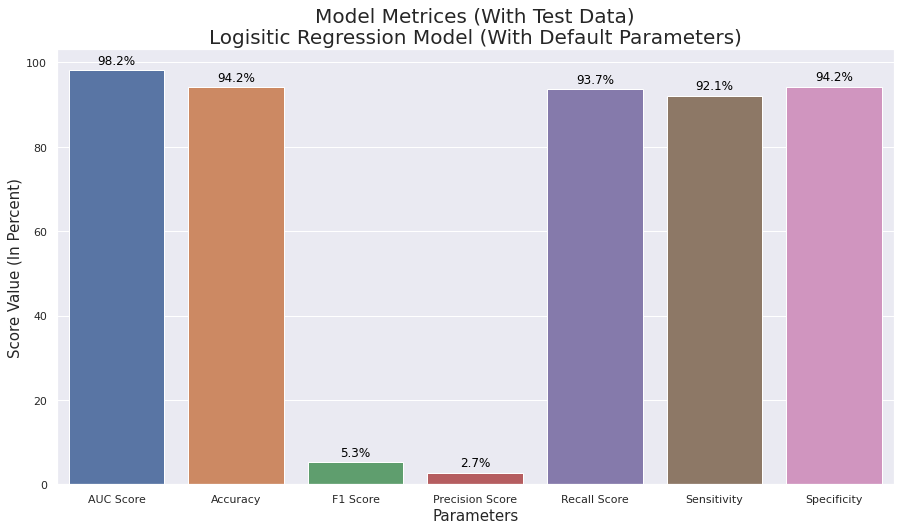

In [141]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision Score', 'Recall Score', 'F1 Score', 'AUC Score'],
                     'Value': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]}, index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision Score', 'Recall Score', 'F1 Score', 'AUC Score'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('Model Metrices (With Test Data)\nLogisitic Regression Model (With Default Parameters)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

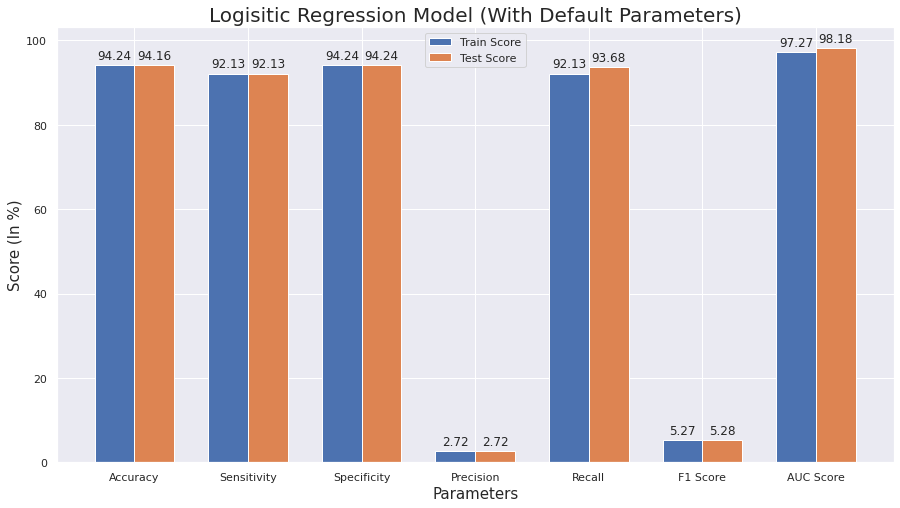

In [142]:
train_test_score_df = pd.DataFrame({'train': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score], 
                                    'test': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                                   index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC Score'])   

fig, ax = plt.subplots()
x = np.arange(len(train_test_score_df.index))
width = 0.35


ax.set_ylabel('Score (In %)', fontdict={'fontsize': 15})
ax.set_xlabel('Parameters', fontdict={'fontsize': 15})
ax.set_title('Logisitic Regression Model (With Default Parameters)', fontdict={'fontsize': 20})
ax.set_xticks(x)
ax.set_xticklabels(train_test_score_df.index)

rects1 = ax.bar(x - width/2, train_test_score_df['train'], width, label='Train Score')
for rect in rects1:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

rects2 = ax.bar(x + width/2, train_test_score_df['test'], width, label='Test Score')
for rect in rects2:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

ax.legend()
plt.show()

#### Conclusions for this model:

1. **Recall** is almost **94%**, which indicates that 6.32% of fraudulent transactions are deemed as Not Fraud. This value can be acceptable but, it will be even better if we could increase this value.

2. **Precision** is just **2.4%**, which indicates that the False Positive count (i.e., transactions which are valid but are considered as fraud) of the model is high. Due to this there will be no financial loss at all for the bank. But this behavior (of deeming non-fraudulent transactions as fraud) leads to very bad banking experience because majority of the transactions are blocked even though being valid ones. So, this value is not at all acceptable.

In [143]:
metrics_dict['imbalanced']['logistics']['accuracy'] = accuracy_score_test
metrics_dict['imbalanced']['logistics']['sensitivity'] = sensitivity_test
metrics_dict['imbalanced']['logistics']['specificity'] = specificity_test
metrics_dict['imbalanced']['logistics']['precision'] = precision_score_test
metrics_dict['imbalanced']['logistics']['recall'] = recall_score_test
metrics_dict['imbalanced']['logistics']['auc'] = auc_score_test
metrics_dict['imbalanced']['logistics']['f1'] = f1_score_test

In [144]:
metrics_dict['imbalanced']['logistics']

{'accuracy': 94.16,
 'sensitivity': 92.13,
 'specificity': 94.24,
 'precision': 2.72,
 'recall': 93.68,
 'f1': 5.28,
 'auc': 98.18}

## 6.2. <a id = "header2_6_2">Decision Trees</a>

### 6.2.1. Defining Basic Model

In [145]:
dt_hyp_tuned = DecisionTreeClassifier(random_state=314)

### 6.2.2. Defining Hyperparameters

In [146]:
params = {
    'max_depth': list(range(5, 15, 3)),
    'min_samples_leaf': list(range(50, 1001, 50)),
    'criterion': ["gini", "entropy"]
}

In [147]:
scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

### 6.2.3. Cross Fold Training

In [148]:
dt_hyp_tuned = GridSearchCV(estimator=dt_hyp_tuned, param_grid=params, cv=4, n_jobs=-1, verbose=1, scoring=scorer)

In [149]:
dt_hyp_tuned.fit(X_train, y_train)

Fitting 4 folds for each of 160 candidates, totalling 640 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=314),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 8, 11, 14],
                         'min_samples_leaf': [50, 100, 150, 200, 250, 300, 350,
                                              400, 450, 500, 550, 600, 650, 700,
                                              750, 800, 850, 900, 950, 1000]},
             scoring=make_scorer(roc_auc_score, needs_proba=True), verbose=1)

In [150]:
score_df = pd.DataFrame(dt_hyp_tuned.cv_results_)
score_df.nlargest(5, "mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
91       5.189669      0.109198         0.017483        0.000325   
92       5.162025      0.102305         0.017459        0.000292   
90       5.220957      0.129801         0.017718        0.000310   
96       5.145192      0.103877         0.017363        0.000501   
93       5.182107      0.110679         0.017495        0.000362   

   param_criterion param_max_depth param_min_samples_leaf  \
91         entropy               5                    600   
92         entropy               5                    650   
90         entropy               5                    550   
96         entropy               5                    850   
93         entropy               5                    700   

                                               params  split0_test_score  \
91  {'criterion': 'entropy', 'max_depth': 5, 'min_...           0.961938   
92  {'criterion': 'entropy', 'max_depth': 5, 'min_...           0.961791   
90  {'criterion': 'entropy', 'max_depth': 5, 'min_...           0.961355   
96  {'criterion': 'entropy', 'max_depth': 5, 'min_...           0.955685   
93  {'criterion': 'entropy', 'max_depth': 5, 'min_...           0.956137   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
91           0.953707           0.971767           0.954448         0.960465   
92           0.948386           0.971740           0.954265         0.959046   
90           0.948815           0.969796           0.954546         0.958628   
96           0.949891           0.971523           0.953591         0.957673   
93           0.948190           0.971634           0.954000         0.957490   

    std_test_score  rank_test_score  
91        0.007276                1  
92        0.008735                2  
90        0.007828                3  
96        0.008261                4  
93        0.008668                5

In [151]:
dt_best_est = dt_hyp_tuned.best_estimator_
dt_best_est

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=600,
                       random_state=314)

In [152]:
pred_probs_train = dt_best_est.predict(X_train)
pred_probs_train

array([0, 0, 0, ..., 0, 0, 0])

In [153]:
conf_matrix = metrics.confusion_matrix(y_train, pred_probs_train)

TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

accuracy_score = metrics.accuracy_score(y_train, pred_probs_train)
accuracy_score = round(accuracy_score*100, 2)

precision_score = metrics.precision_score(y_train, pred_probs_train)
precision_score = round(precision_score*100, 2)

recall_score = metrics.recall_score(y_train, pred_probs_train)
recall_score = round(recall_score*100, 2)

sensitivity = TP / float(FN + TP)
sensitivity = round(sensitivity*100, 2)

specificity = TN / float(TN + FP)
specificity = round(specificity*100, 2)

f1_score = metrics.f1_score(y_train, pred_probs_train)
f1_score = round(f1_score*100, 2)

auc_score = metrics.roc_auc_score(y_train, pred_probs_train)
auc_score = round(auc_score*100, 2)

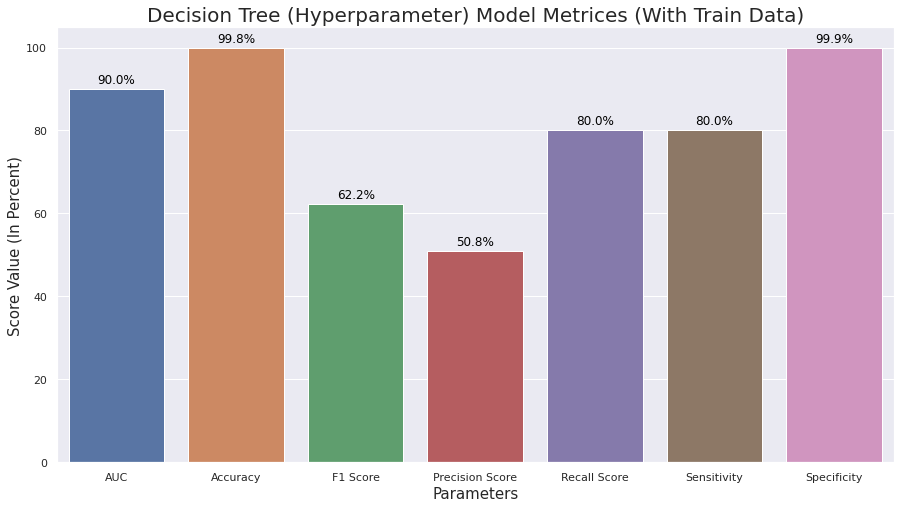

In [154]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision Score', 'Recall Score', 'F1 Score', 'AUC'],
                     'Value': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score]},
                    index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('Decision Tree (Hyperparameter) Model Metrices (With Train Data)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

### 6.2.4. Implementing best model on Test Data

In [155]:
pred_probs_test = dt_best_est.predict(X_test)
pred_probs_test

array([0, 0, 0, ..., 0, 0, 0])

In [156]:
conf_matrix_test = metrics.confusion_matrix(y_test, pred_probs_test)

TN_test = conf_matrix[0, 0]
FP_test = conf_matrix[0, 1]
FN_test = conf_matrix[1, 0]
TP_test = conf_matrix[1, 1]

accuracy_score_test = metrics.accuracy_score(y_test, pred_probs_test)
accuracy_score_test = round(accuracy_score_test*100, 2)

precision_score_test = metrics.precision_score(y_test, pred_probs_test)
precision_score_test = round(precision_score_test*100, 2)

recall_score_test = metrics.recall_score(y_test, pred_probs_test)
recall_score_test = round(recall_score_test*100, 2)

sensitivity_test = TP_test / float(FN_test + TP_test)
sensitivity_test = round(sensitivity_test*100, 2)

specificity_test = TN_test / float(TN_test + FP_test)
specificity_test = round(specificity_test*100, 2)

f1_score_test = metrics.f1_score(y_test, pred_probs_test)
f1_score_test = round(f1_score_test*100, 2)

auc_score_test = round(metrics.roc_auc_score(y_test, pred_probs_test)*100, 2)

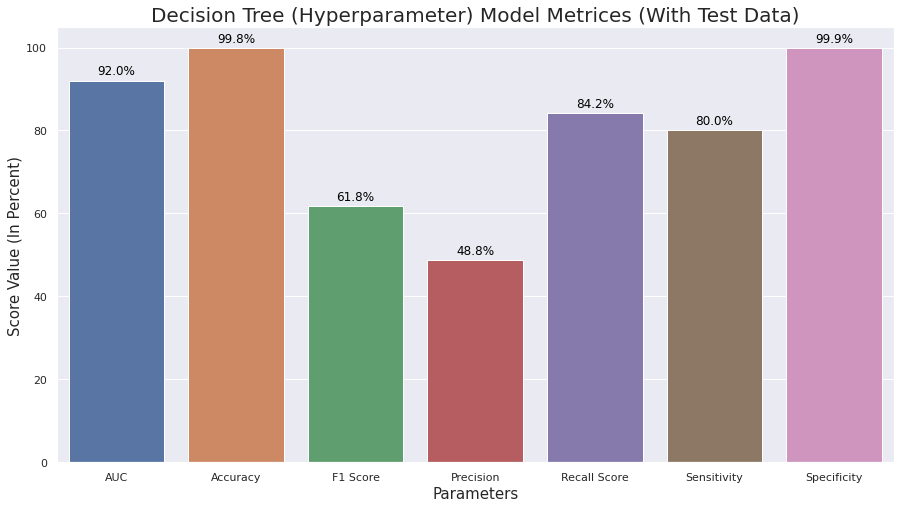

In [157]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall Score', 'F1 Score', 'AUC'],
                     'Value': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                    index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('Decision Tree (Hyperparameter) Model Metrices (With Test Data)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

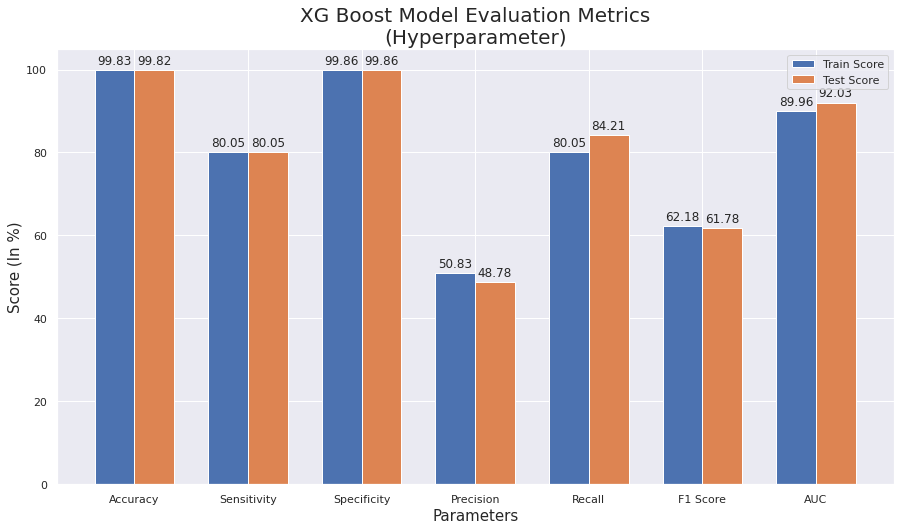

In [158]:
train_test_score_df = pd.DataFrame({'train': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score], 
                                    'test': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                                   index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   

fig, ax = plt.subplots()
x = np.arange(len(train_test_score_df.index))
width = 0.35


ax.set_ylabel('Score (In %)', fontdict={'fontsize': 15})
ax.set_xlabel('Parameters', fontdict={'fontsize': 15})
ax.set_title('XG Boost Model Evaluation Metrics\n(Hyperparameter)', fontdict={'fontsize': 20})
ax.set_xticks(x)
ax.set_xticklabels(train_test_score_df.index)

rects1 = ax.bar(x - width/2, train_test_score_df['train'], width, label='Train Score')
for rect in rects1:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

rects2 = ax.bar(x + width/2, train_test_score_df['test'], width, label='Test Score')
for rect in rects2:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

ax.legend()
plt.show()

#### Conclusions for this model:

1. **Recall** is almost **84%**, which indicates that almost 16% of fraudulent transactions are deemed as Not Fraud. This value is not acceptable. It it will be better if we could increase this value.

2. **Precision** is **49%**, which indicates that the False Positive count (i.e., transactions which are valid but are considered as fraud) of the model is high. Due to this there will be no financial loss at all for the bank. But this behavior (of deeming non-fraudulent transactions as fraud) leads to very bad banking experience because majority of the transactions are blocked even though being valid ones. So, this value is not at all acceptable.

In [159]:
metrics_dict['imbalanced']['dt']['accuracy'] = accuracy_score_test
metrics_dict['imbalanced']['dt']['sensitivity'] = sensitivity_test
metrics_dict['imbalanced']['dt']['specificity'] = specificity_test
metrics_dict['imbalanced']['dt']['precision'] = precision_score_test
metrics_dict['imbalanced']['dt']['recall'] = recall_score_test
metrics_dict['imbalanced']['dt']['auc'] = auc_score_test
metrics_dict['imbalanced']['dt']['f1'] = f1_score_test

In [160]:
metrics_dict['imbalanced']['dt']

{'accuracy': 99.82,
 'sensitivity': 80.05,
 'specificity': 99.86,
 'precision': 48.78,
 'recall': 84.21,
 'f1': 61.78,
 'auc': 92.03}

## 6.3. <a id = "header2_6_3">Random Forest</a>

### 6.3.1. Defining Basic Model

In [161]:
rf_hyp_tuned = RandomForestClassifier(random_state=314, n_jobs=-1)

### 6.3.2. Defining Hyperparameters

In [162]:
params = {
    'max_depth': list(range(3, 8)),
    'min_samples_leaf': list(range(50, 1001, 100)),
    'max_features': list(range(2, 5)),
    'n_estimators': list(range(10, 31, 10))
}

In [163]:
scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

### 6.3.3. Cross Fold Training

In [164]:
rf_hyp_tuned_grid = GridSearchCV(estimator=rf_hyp_tuned, param_grid=params, 
                                 cv=4, n_jobs=-1, verbose=1, 
                                 scoring=scorer)

In [165]:
rf_hyp_tuned_grid.fit(X_train, y_train)

Fitting 4 folds for each of 450 candidates, totalling 1800 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=314),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [50, 150, 250, 350, 450, 550, 650,
                                              750, 850, 950],
                         'n_estimators': [10, 20, 30]},
             scoring=make_scorer(roc_auc_score, needs_proba=True), verbose=1)

In [166]:
score_df = pd.DataFrame(rf_hyp_tuned_grid.cv_results_)
score_df.nlargest(5,"mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
425      16.607978      0.137162         0.525528        0.030031   
215       9.033898      0.117104         0.573666        0.072833   
311      11.114938      0.074259         0.541272        0.043703   
428      17.199425      0.097395         0.559094        0.052410   
308      11.311734      0.066911         0.625906        0.075886   

    param_max_depth param_max_features param_min_samples_leaf  \
425               7                  4                    150   
215               5                  3                    150   
311               6                  3                    350   
428               7                  4                    250   
308               6                  3                    250   

    param_n_estimators                                             params  \
425                 30  {'max_depth': 7, 'max_features': 4, 'min_sampl...   
215                 30  {'max_depth': 5, 'max_features': 3, 'min_sampl...   
311                 30  {'max_depth': 6, 'max_features': 3, 'min_sampl...   
428                 30  {'max_depth': 7, 'max_features': 4, 'min_sampl...   
308                 30  {'max_depth': 6, 'max_features': 3, 'min_sampl...   

     split0_test_score  split1_test_score  split2_test_score  \
425           0.985606           0.965988           0.981977   
215           0.981827           0.967275           0.976354   
311           0.978994           0.970446           0.977843   
428           0.976456           0.969731           0.983296   
308           0.981426           0.969732           0.977294   

     split3_test_score  mean_test_score  std_test_score  rank_test_score  
425           0.977835         0.977851        0.007381                1  
215           0.976001         0.975364        0.005210                2  
311           0.974050         0.975333        0.003363                3  
428           0.971218         0.975175        0.005312                4  
308           0.972082         0.975133        0.004548                5

In [167]:
rf_best = rf_hyp_tuned_grid.best_estimator_
rf_best

RandomForestClassifier(max_depth=7, max_features=4, min_samples_leaf=150,
                       n_estimators=30, n_jobs=-1, random_state=314)

### 6.3.4. Implementing best model on Test Data

In [168]:
pred_probs_train = rf_best.predict(X_train)

In [169]:
conf_matrix = metrics.confusion_matrix(y_train, pred_probs_train)

TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

accuracy_score = metrics.accuracy_score(y_train, pred_probs_train)
accuracy_score = round(accuracy_score*100, 2)

precision_score = metrics.precision_score(y_train, pred_probs_train)
precision_score = round(precision_score*100, 2)

recall_score = metrics.recall_score(y_train, pred_probs_train)
recall_score = round(recall_score*100, 2)

sensitivity = TP / float(FN + TP)
sensitivity = round(sensitivity*100, 2)

specificity = TN / float(TN + FP)
specificity = round(specificity*100, 2)

f1_score = metrics.f1_score(y_train, pred_probs_train)
f1_score = round(f1_score*100, 2)

auc_score = round(metrics.roc_auc_score(y_train, pred_probs_train)*100, 2)

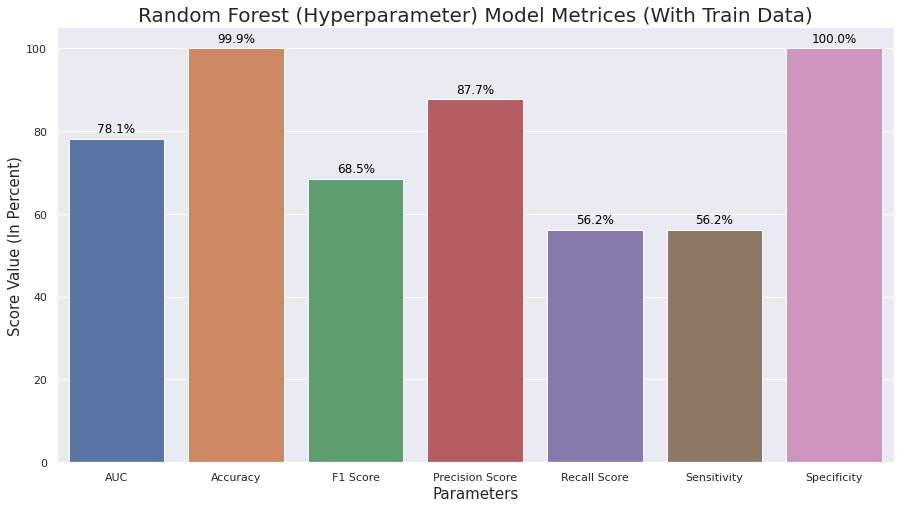

In [170]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision Score', 'Recall Score', 'F1 Score', 'AUC'],
                     'Value': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score]},
                    index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('Random Forest (Hyperparameter) Model Metrices (With Train Data)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

In [171]:
pred_probs_test = rf_best.predict(X_test)

In [172]:
conf_matrix_test = metrics.confusion_matrix(y_test, pred_probs_test)

TN_test = conf_matrix[0, 0]
FP_test = conf_matrix[0, 1]
FN_test = conf_matrix[1, 0]
TP_test = conf_matrix[1, 1]

accuracy_score_test = metrics.accuracy_score(y_test, pred_probs_test)
accuracy_score_test = round(accuracy_score_test*100, 2)

precision_score_test = metrics.precision_score(y_test, pred_probs_test)
precision_score_test = round(precision_score_test*100, 2)

recall_score_test = metrics.recall_score(y_test, pred_probs_test)
recall_score_test = round(recall_score_test*100, 2)

sensitivity_test = TP_test / float(FN_test + TP_test)
sensitivity_test = round(sensitivity_test*100, 2)

specificity_test = TN_test / float(TN_test + FP_test)
specificity_test = round(specificity_test*100, 2)

f1_score_test = metrics.f1_score(y_test, pred_probs_test)
f1_score_test = round(f1_score_test*100, 2)

auc_score_test = round(metrics.roc_auc_score(y_test, pred_probs_test)*100, 2)

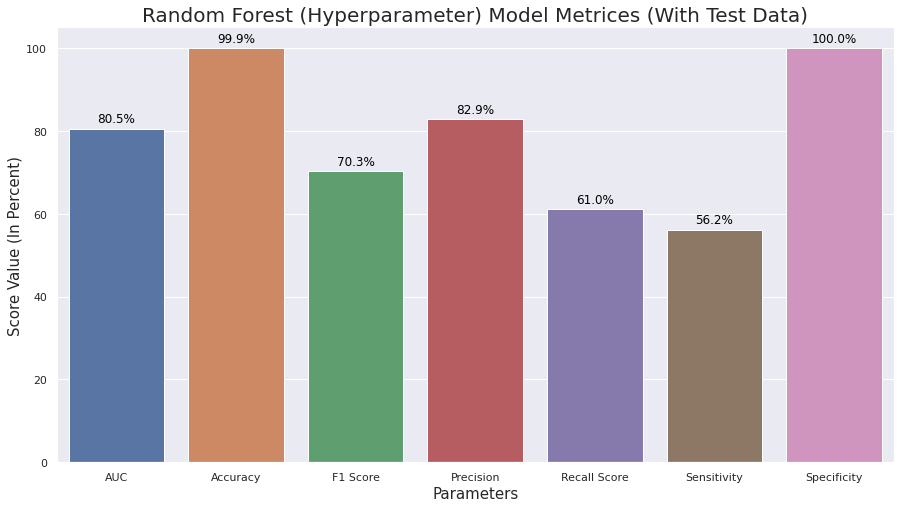

In [173]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall Score', 'F1 Score', 'AUC'],
                     'Value': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                    index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('Random Forest (Hyperparameter) Model Metrices (With Test Data)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

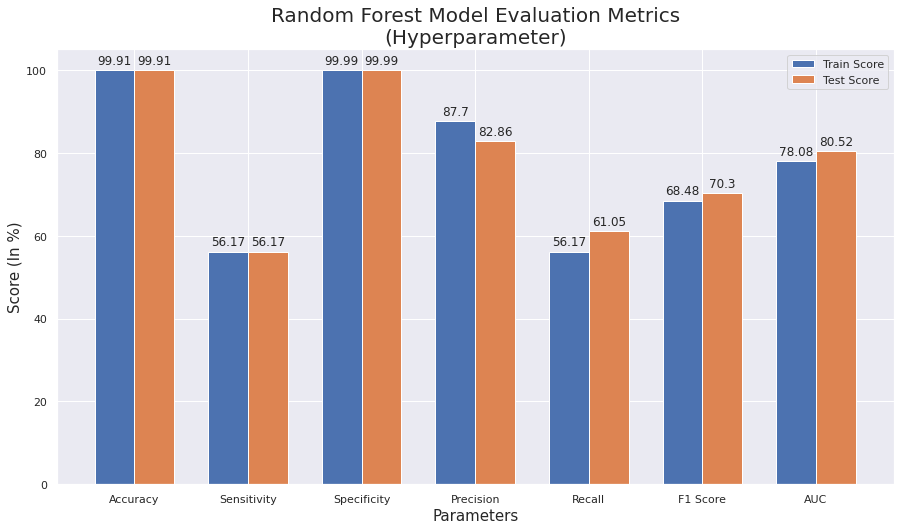

In [174]:
train_test_score_df = pd.DataFrame({'train': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score], 
                                    'test': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                                   index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   

fig, ax = plt.subplots()
x = np.arange(len(train_test_score_df.index))
width = 0.35


ax.set_ylabel('Score (In %)', fontdict={'fontsize': 15})
ax.set_xlabel('Parameters', fontdict={'fontsize': 15})
ax.set_title('Random Forest Model Evaluation Metrics\n(Hyperparameter)', fontdict={'fontsize': 20})
ax.set_xticks(x)
ax.set_xticklabels(train_test_score_df.index)

rects1 = ax.bar(x - width/2, train_test_score_df['train'], width, label='Train Score')
for rect in rects1:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

rects2 = ax.bar(x + width/2, train_test_score_df['test'], width, label='Test Score')
for rect in rects2:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

ax.legend()
plt.show()

#### Conclusions for this model:

1. **Recall** is almost **61%**, which indicates that 29% of fraudulent transactions are deemed as Not Fraud. This value is not acceptable at all. It will be better if we could increase this value.

2. **Precision** is **83%**, which indicates that the False Positive count (i.e., transactions which are valid but are considered as fraud) of the model is high. Due to this there will be no financial loss at all for the bank. But this behavior (of deeming non-fraudulent transactions as fraud) leads to very bad banking experience because majority of the transactions are blocked even though being valid ones. So, this value is not at all acceptable.

In [175]:
metrics_dict['imbalanced']['rf']['accuracy'] = accuracy_score_test
metrics_dict['imbalanced']['rf']['sensitivity'] = sensitivity_test
metrics_dict['imbalanced']['rf']['specificity'] = specificity_test
metrics_dict['imbalanced']['rf']['precision'] = precision_score_test
metrics_dict['imbalanced']['rf']['recall'] = recall_score_test
metrics_dict['imbalanced']['rf']['auc'] = auc_score_test
metrics_dict['imbalanced']['rf']['f1'] = f1_score_test

In [176]:
metrics_dict['imbalanced']['rf']

{'accuracy': 99.91,
 'sensitivity': 56.17,
 'specificity': 99.99,
 'precision': 82.86,
 'recall': 61.05,
 'f1': 70.3,
 'auc': 80.52}

## 6.4. <a id = "header2_6_4">Gradient Boosting</a>

### 6.4.1. Defining Basic Model

In [177]:
gbm_hyp_tuned = GradientBoostingClassifier(random_state=314)

### 6.4.2. Defining Hyperparameters

In [178]:
params = {
    'max_depth': list(range(3, 8)),
    'max_features': list(range(2, 5)),
    'n_estimators': list(range(10, 31, 10))
}

In [179]:
scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

### 6.4.3. Cross Fold Training

In [180]:
gbm_hyp_tuned_grid = GridSearchCV(estimator=gbm_hyp_tuned,
                                  param_grid=params, cv=4, n_jobs=-1,
                                  verbose=1, scoring=scorer)

In [181]:
gbm_hyp_tuned_grid.fit(X_train, y_train)

Fitting 4 folds for each of 45 candidates, totalling 180 fits


GridSearchCV(cv=4, estimator=GradientBoostingClassifier(random_state=314),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': [2, 3, 4],
                         'n_estimators': [10, 20, 30]},
             scoring=make_scorer(roc_auc_score, needs_proba=True), verbose=1)

In [182]:
score_df = pd.DataFrame(gbm_hyp_tuned_grid.cv_results_)
score_df.nlargest(5, "mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
33       7.126643      0.044794         0.028999        0.001032   
37       8.755326      0.059633         0.042940        0.002291   
40      12.663189      0.118339         0.041714        0.002965   
38      13.108910      0.113226         0.055429        0.004448   
39       6.367118      0.055375         0.031257        0.001621   

   param_max_depth param_max_features param_n_estimators  \
33               6                  4                 10   
37               7                  2                 20   
40               7                  3                 20   
38               7                  2                 30   
39               7                  3                 10   

                                               params  split0_test_score  \
33  {'max_depth': 6, 'max_features': 4, 'n_estimat...           0.963858   
37  {'max_depth': 7, 'max_features': 2, 'n_estimat...           0.940972   
40  {'max_depth': 7, 'max_features': 3, 'n_estimat...           0.927655   
38  {'max_depth': 7, 'max_features': 2, 'n_estimat...           0.931672   
39  {'max_depth': 7, 'max_features': 3, 'n_estimat...           0.928128   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
33           0.904727           0.974332           0.918950         0.940467   
37           0.921932           0.929738           0.894905         0.921887   
40           0.902973           0.918716           0.925676         0.918755   
38           0.889800           0.928478           0.924836         0.918697   
39           0.903376           0.909017           0.914554         0.913769   

    std_test_score  rank_test_score  
33        0.029302                1  
37        0.016985                2  
40        0.009698                3  
38        0.016858                4  
39        0.009184                5

In [183]:
gb_best = gbm_hyp_tuned_grid.best_estimator_
gb_best

GradientBoostingClassifier(max_depth=6, max_features=4, n_estimators=10,
                           random_state=314)

In [184]:
pred_probs_train = gb_best.predict(X_train)

In [185]:
conf_matrix = metrics.confusion_matrix(y_train, pred_probs_train)

TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

accuracy_score = metrics.accuracy_score(y_train, pred_probs_train)
accuracy_score = round(accuracy_score*100, 2)

precision_score = metrics.precision_score(y_train, pred_probs_train)
precision_score = round(precision_score*100, 2)

recall_score = metrics.recall_score(y_train, pred_probs_train)
recall_score = round(recall_score*100, 2)

sensitivity = TP / float(FN + TP)
sensitivity = round(sensitivity*100, 2)

specificity = TN / float(TN + FP)
specificity = round(specificity*100, 2)

f1_score = metrics.f1_score(y_train, pred_probs_train)
f1_score = round(f1_score*100, 2)

auc_score = round(metrics.roc_auc_score(y_train, pred_probs_train)*100, 2)

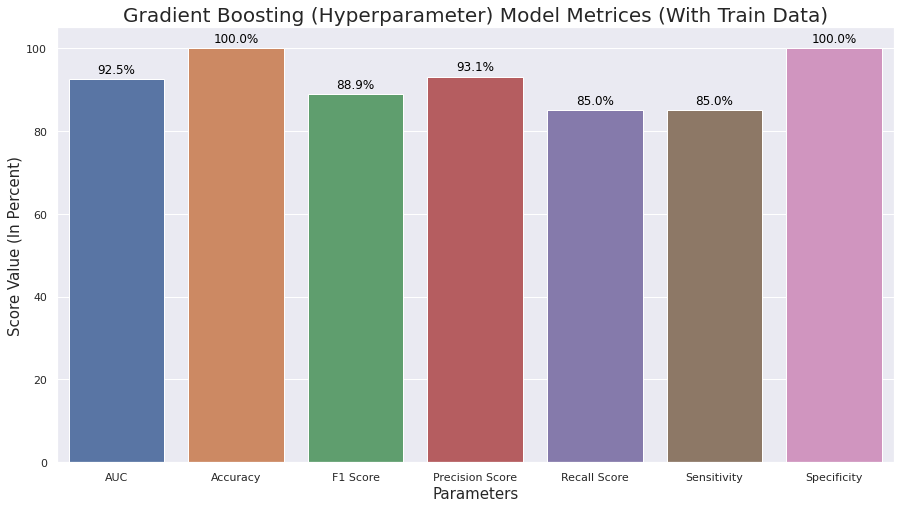

In [186]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision Score', 'Recall Score', 'F1 Score', 'AUC'],
                     'Value': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score]},
                    index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('Gradient Boosting (Hyperparameter) Model Metrices (With Train Data)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

### 6.4.4. Implementing best model on Test Data

In [187]:
pred_probs_test = gb_best.predict(X_test)

In [188]:
conf_matrix_test = metrics.confusion_matrix(y_test, pred_probs_test)

TN_test = conf_matrix[0, 0]
FP_test = conf_matrix[0, 1]
FN_test = conf_matrix[1, 0]
TP_test = conf_matrix[1, 1]

accuracy_score_test = metrics.accuracy_score(y_test, pred_probs_test)
accuracy_score_test = round(accuracy_score_test*100, 2)

precision_score_test = metrics.precision_score(y_test, pred_probs_test)
precision_score_test = round(precision_score_test*100, 2)

recall_score_test = metrics.recall_score(y_test, pred_probs_test)
recall_score_test = round(recall_score_test*100, 2)

sensitivity_test = TP_test / float(FN_test + TP_test)
sensitivity_test = round(sensitivity_test*100, 2)

specificity_test = TN_test / float(TN_test + FP_test)
specificity_test = round(specificity_test*100, 2)

f1_score_test = metrics.f1_score(y_test, pred_probs_test)
f1_score_test = round(f1_score_test*100, 2)

auc_score_test = round(metrics.roc_auc_score(y_test, pred_probs_test)*100, 2)

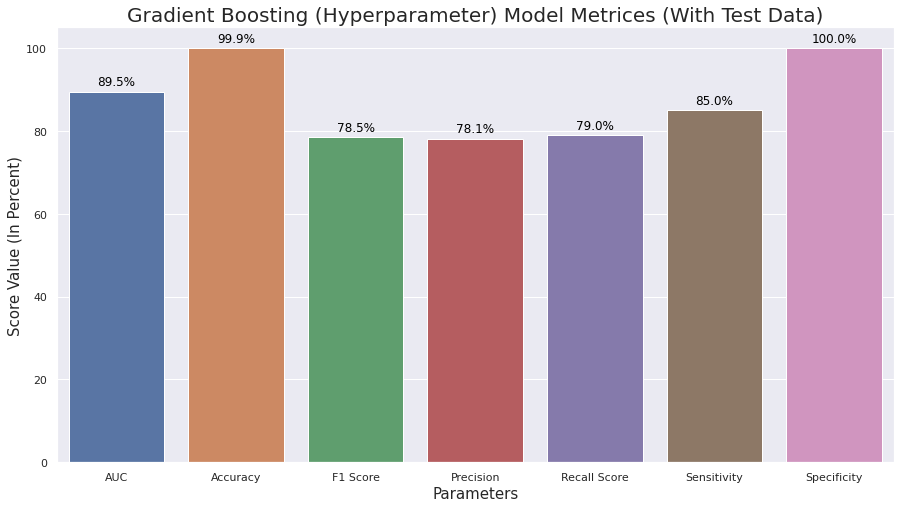

In [189]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall Score', 'F1 Score', 'AUC'],
                     'Value': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                    index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('Gradient Boosting (Hyperparameter) Model Metrices (With Test Data)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

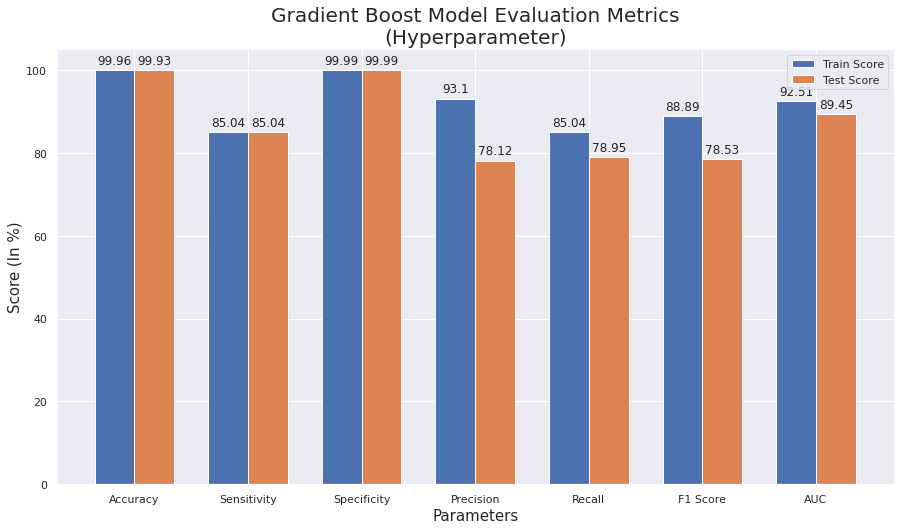

In [190]:
train_test_score_df = pd.DataFrame({'train': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score], 
                                    'test': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                                   index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   

fig, ax = plt.subplots()
x = np.arange(len(train_test_score_df.index))
width = 0.35


ax.set_ylabel('Score (In %)', fontdict={'fontsize': 15})
ax.set_xlabel('Parameters', fontdict={'fontsize': 15})
ax.set_title('Gradient Boost Model Evaluation Metrics\n(Hyperparameter)', fontdict={'fontsize': 20})
ax.set_xticks(x)
ax.set_xticklabels(train_test_score_df.index)

rects1 = ax.bar(x - width/2, train_test_score_df['train'], width, label='Train Score')
for rect in rects1:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

rects2 = ax.bar(x + width/2, train_test_score_df['test'], width, label='Test Score')
for rect in rects2:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

ax.legend()
plt.show()

#### Conclusions for this model:

1. **Recall** is almost **79%**, which indicates that 21% of fraudulent transactions are deemed as Not Fraud. This value is not acceptable at all. It will be better if we could increase this value.

2. **Precision** is **78%**, which indicates that the False Positive count (i.e., transactions which are valid but are considered as fraud) of the model is high. Due to this there will be no financial loss at all for the bank. But this behavior (of deeming non-fraudulent transactions as fraud) leads to very bad banking experience because majority of the transactions are blocked even though being valid ones. So, this value is not at all acceptable.

In [191]:
metrics_dict['imbalanced']['gb']['accuracy'] = accuracy_score_test
metrics_dict['imbalanced']['gb']['sensitivity'] = sensitivity_test
metrics_dict['imbalanced']['gb']['specificity'] = specificity_test
metrics_dict['imbalanced']['gb']['precision'] = precision_score_test
metrics_dict['imbalanced']['gb']['recall'] = recall_score_test
metrics_dict['imbalanced']['gb']['auc'] = auc_score_test
metrics_dict['imbalanced']['gb']['f1'] = f1_score_test

In [192]:
metrics_dict['imbalanced']['gb']

{'accuracy': 99.93,
 'sensitivity': 85.04,
 'specificity': 99.99,
 'precision': 78.12,
 'recall': 78.95,
 'f1': 78.53,
 'auc': 89.45}

## 6.5. <a id = "header2_6_5">XG Boost</a>

### 6.5.1. Defining Basic Model

In [193]:
xgreg = XGBClassifier(random_state=314, n_jobs = -1)

### 6.5.2. Defining Hyperparameters

In [194]:
params = {'learning_rate': np.arange(0.25, 0.76, 0.25),
          'max_depth': list(range(5, 7)), 
          'min_child_weight': [15, 18], 
          'n_estimators': list(range(25, 76, 25))}

In [195]:
scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

### 6.5.3. Cross Fold Training

In [196]:
xgboost_hyp_tuned = GridSearchCV(estimator=xgreg, param_grid=params, n_jobs=-1, 
                                 cv=4, scoring=scorer, refit=True, verbose=1)

In [197]:
xgboost_hyp_tuned.fit(X_train, y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:46:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:46:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:46:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:46:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:46:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:46:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:46:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:46:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:46:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:46:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:46:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:47:44] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:46:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:47:44] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:46:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:47:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:46:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:48:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:46:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:47:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     num_parallel_tree=None, random_state=314,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, val

In [198]:
score_df = pd.DataFrame(xgboost_hyp_tuned.cv_results_)
score_df.nlargest(5, "mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
5      191.230536      3.768824         0.412847        0.052209   
1      154.921507      2.781731         0.412159        0.019094   
7      155.624724      2.771827         0.453027        0.050241   
4      140.072505      2.474461         0.402374        0.052457   
16     127.727943      2.229984         0.419566        0.029949   

   param_learning_rate param_max_depth param_min_child_weight  \
5                 0.25               5                     18   
1                 0.25               5                     15   
7                 0.25               6                     15   
4                 0.25               5                     18   
16                 0.5               5                     18   

   param_n_estimators                                             params  \
5                  75  {'learning_rate': 0.25, 'max_depth': 5, 'min_c...   
1                  50  {'learning_rate': 0.25, 'max_depth': 5, 'min_c...   
7                  50  {'learning_rate': 0.25, 'max_depth': 6, 'min_c...   
4                  50  {'learning_rate': 0.25, 'max_depth': 5, 'min_c...   
16                 50  {'learning_rate': 0.5, 'max_depth': 5, 'min_ch...   

    split0_test_score  split1_test_score  split2_test_score  \
5            0.980452           0.980685           0.982960   
1            0.980495           0.977494           0.985126   
7            0.980495           0.977494           0.985126   
4            0.978934           0.977230           0.984616   
16           0.983082           0.978613           0.986288   

    split3_test_score  mean_test_score  std_test_score  rank_test_score  
5            0.985388         0.982371        0.001999                1  
1            0.986257         0.982343        0.003535                2  
7            0.986257         0.982343        0.003535                2  
4            0.988345         0.982281        0.004442                4  
16           0.980002         0.981996        0.002959                5

In [199]:
xgboost_best_est = xgboost_hyp_tuned.best_estimator_
xgboost_best_est

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=5,
              min_child_weight=18, missing=nan, monotone_constraints='()',
              n_estimators=75, n_jobs=-1, num_parallel_tree=1, random_state=314,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [200]:
pred_probs_train = xgboost_best_est.predict(X_train)
pred_probs_train

array([0, 0, 0, ..., 0, 0, 0])

In [201]:
conf_matrix = metrics.confusion_matrix(y_train, pred_probs_train)

TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

accuracy_score = metrics.accuracy_score(y_train, pred_probs_train)
accuracy_score = round(accuracy_score*100, 2)

precision_score = metrics.precision_score(y_train, pred_probs_train)
precision_score = round(precision_score*100, 2)

recall_score = metrics.recall_score(y_train, pred_probs_train)
recall_score = round(recall_score*100, 2)

sensitivity = TP / float(FN + TP)
sensitivity = round(sensitivity*100, 2)

specificity = TN / float(TN + FP)
specificity = round(specificity*100, 2)

f1_score = metrics.f1_score(y_train, pred_probs_train)
f1_score = round(f1_score*100, 2)

auc_score = round(metrics.roc_auc_score(y_train, pred_probs_train)*100, 2)

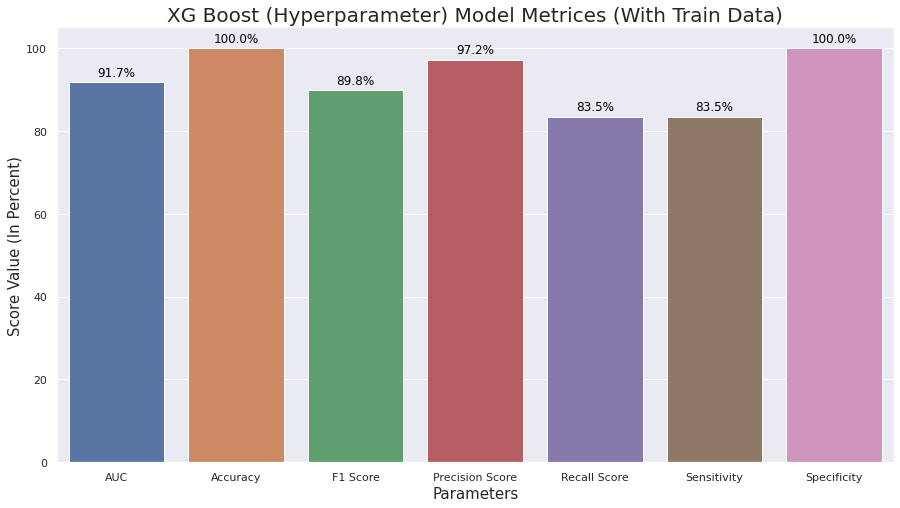

In [202]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision Score', 'Recall Score', 'F1 Score', 'AUC'],
                     'Value': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score]},
                    index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('XG Boost (Hyperparameter) Model Metrices (With Train Data)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

### 6.5.4. Implementing best model on Test Data

In [203]:
pred_probs_test = xgboost_best_est.predict(X_test)

In [204]:
conf_matrix_test = metrics.confusion_matrix(y_test, pred_probs_test)

TN_test = conf_matrix[0, 0]
FP_test = conf_matrix[0, 1]
FN_test = conf_matrix[1, 0]
TP_test = conf_matrix[1, 1]

accuracy_score_test = metrics.accuracy_score(y_test, pred_probs_test)
accuracy_score_test = round(accuracy_score_test*100, 2)

precision_score_test = metrics.precision_score(y_test, pred_probs_test)
precision_score_test = round(precision_score_test*100, 2)

recall_score_test = metrics.recall_score(y_test, pred_probs_test)
recall_score_test = round(recall_score_test*100, 2)

sensitivity_test = TP_test / float(FN_test + TP_test)
sensitivity_test = round(sensitivity_test*100, 2)

specificity_test = TN_test / float(TN_test + FP_test)
specificity_test = round(specificity_test*100, 2)

f1_score_test = metrics.f1_score(y_test, pred_probs_test)
f1_score_test = round(f1_score_test*100, 2)

auc_score_test = round(metrics.roc_auc_score(y_test, pred_probs_test)*100, 2)

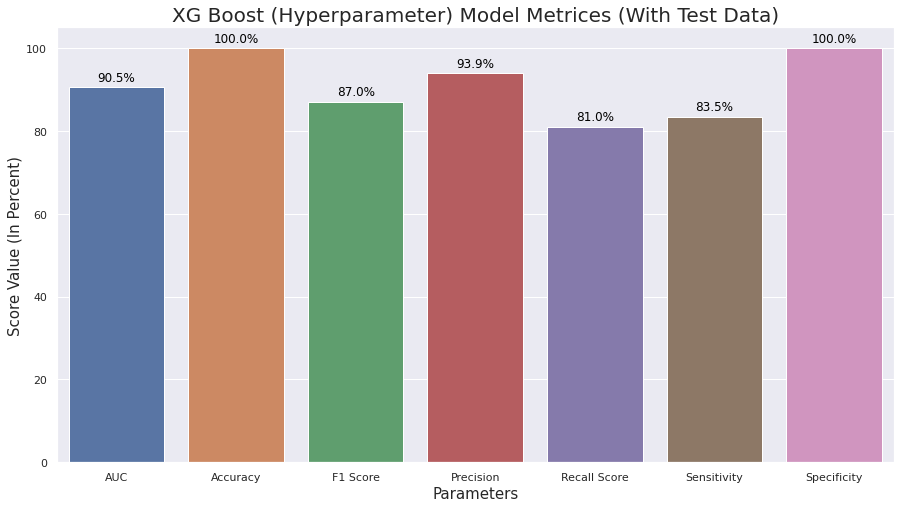

In [205]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall Score', 'F1 Score', 'AUC'],
                     'Value': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                    index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('XG Boost (Hyperparameter) Model Metrices (With Test Data)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

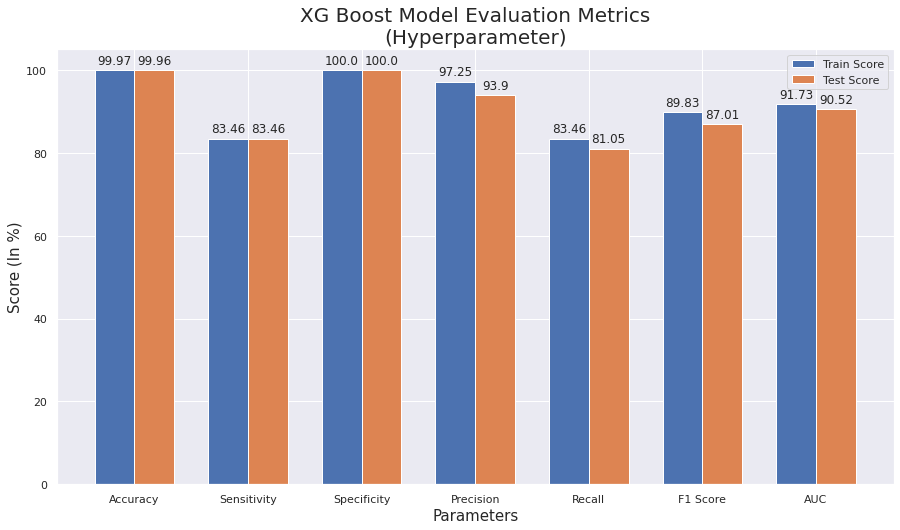

In [206]:
train_test_score_df = pd.DataFrame({'train': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score], 
                                    'test': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                                   index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   

fig, ax = plt.subplots()
x = np.arange(len(train_test_score_df.index))
width = 0.35


ax.set_ylabel('Score (In %)', fontdict={'fontsize': 15})
ax.set_xlabel('Parameters', fontdict={'fontsize': 15})
ax.set_title('XG Boost Model Evaluation Metrics\n(Hyperparameter)', fontdict={'fontsize': 20})
ax.set_xticks(x)
ax.set_xticklabels(train_test_score_df.index)

rects1 = ax.bar(x - width/2, train_test_score_df['train'], width, label='Train Score')
for rect in rects1:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

rects2 = ax.bar(x + width/2, train_test_score_df['test'], width, label='Test Score')
for rect in rects2:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

ax.legend()
plt.show()

#### Conclusions for this model:

1. **Recall** is almost **81%**, which indicates that 19% of fraudulent transactions are deemed as Not Fraud. This value is not acceptable at all. It will be better if we could increase this value.

2. **Precision** is **93%**, which indicates that the False Positive count (i.e., transactions which are valid but are considered as fraud) of the model is acceptable.

In [207]:
metrics_dict['imbalanced']['xgb']['accuracy'] = accuracy_score_test
metrics_dict['imbalanced']['xgb']['sensitivity'] = sensitivity_test
metrics_dict['imbalanced']['xgb']['specificity'] = specificity_test
metrics_dict['imbalanced']['xgb']['precision'] = precision_score_test
metrics_dict['imbalanced']['xgb']['recall'] = recall_score_test
metrics_dict['imbalanced']['xgb']['auc'] = auc_score_test
metrics_dict['imbalanced']['xgb']['f1'] = f1_score_test

In [208]:
metrics_dict['imbalanced']['xgb']

{'accuracy': 99.96,
 'sensitivity': 83.46,
 'specificity': 100.0,
 'precision': 93.9,
 'recall': 81.05,
 'f1': 87.01,
 'auc': 90.52}

## 6.6. <a id = "header2_6_6">Artificial Neural Net (ANN)</a>

### 6.6.1. Output Data Preprocessing for ANN

In [209]:
train_label_encoder = LabelEncoder().fit(y_train)
y_train_ann = train_label_encoder.transform(y_train)
y_train_ann = to_categorical(y_train_ann)

In [210]:
test_label_encoder = LabelEncoder().fit(y_test)
y_test_ann = test_label_encoder.transform(y_test)
y_test_ann = to_categorical(y_test_ann)

### 6.6.2. Data Modelling

In [211]:
model = Sequential()

2021-09-08 15:06:41.491135: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/extras/CUPTI/lib64:/usr/local/cuda/compat/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2021-09-08 15:06:41.491164: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-09-08 15:06:41.491184: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (206ca65ee23f): /proc/driver/nvidia/version does not exist
2021-09-08 15:06:41.491439: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appr

In [212]:
model.add(Dense(10, input_dim=29, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [213]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                300       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 42        
Total params: 562
Trainable params: 562
Non-trainable params: 0
_________________________________________________________________


##### accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score

In [214]:
metrics_list = ['accuracy', 'FalsePositives', 'TrueNegatives', 'AUC', 'Precision', 'Recall']

In [215]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=metrics_list)

### 6.6.3. Model Training on Train Data

In [216]:
train_data_model_history = model.fit(X_train, y_train_ann, epochs=10, batch_size=14591)

2021-09-08 15:06:41.668145: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
15/15 [==============================] - 1s 8ms/step - loss: 0.1661 - accuracy: 0.9942 - false_positives: 1280.0000 - true_negatives: 217585.0000 - auc: 0.9979 - precision: 0.9942 - recall: 0.9942
Epoch 2/10
15/15 [==============================] - 0s 7ms/step - loss: 0.1392 - accuracy: 0.9983 - false_positives: 382.0000 - true_negatives: 218483.0000 - auc: 0.9979 - precision: 0.9983 - recall: 0.9983
Epoch 3/10
15/15 [==============================] - 0s 7ms/step - loss: 0.1168 - accuracy: 0.9983 - false_positives: 381.0000 - true_negatives: 218484.0000 - auc: 0.9978 - precision: 0.9983 - recall: 0.9983
Epoch 4/10
15/15 [==============================] - 0s 8ms/step - loss: 0.0951 - accuracy: 0.9983 - false_positives: 381.0000 - true_negatives: 218484.0000 - auc: 0.9978 - precision: 0.9983 - recall: 0.9983
Epoch 5/10
15/15 [==============================] - 0s 7ms/step - loss: 0.0758 - accuracy: 0.9983 - false_positives: 381.0000 - true_negatives: 218484.0000 - auc: 0.9979 -

In [217]:
train_history = train_data_model_history.history
train_ann_dict = {str(key): round(value[-1]*100, 2) for key, value in train_history.items()}
train_ann_dict['specificity'] = round(train_ann_dict['true_negatives'] / (train_ann_dict['true_negatives'] + train_ann_dict['false_positives'])*100, 2)
train_ann_dict['f1_score'] = 2*((train_ann_dict['precision']*train_ann_dict['recall']) / (train_ann_dict['precision']+train_ann_dict['recall']))
train_ann_dict

{'loss': 1.61,
 'accuracy': 99.89,
 'false_positives': 24500.0,
 'true_negatives': 21862000.0,
 'auc': 99.94,
 'precision': 99.89,
 'recall': 99.89,
 'specificity': 99.89,
 'f1_score': 99.89}

### 6.6.4. Model Training on Test Data

In [218]:
test_data_model_history = model.evaluate(X_test, y_test_ann)

1710/1710 [==============================] - 3s 1ms/step - loss: 0.0125 - accuracy: 0.9990 - false_positives: 53.0000 - true_negatives: 54664.0000 - auc: 0.9993 - precision: 0.9990 - recall: 0.9990


In [219]:
test_metrics_list = ['Loss'] + metrics_list
test_ann_dict = {test_metrics_list[index]: round(test_data_model_history[index]*100, 2) for index in range(len(test_data_model_history))}
test_ann_dict['Specificity'] = round(test_ann_dict['TrueNegatives'] / (test_ann_dict['TrueNegatives'] + test_ann_dict['FalsePositives'])*100, 2)
test_ann_dict['f1_score'] = 2*((test_ann_dict['Precision']*test_ann_dict['Recall']) / (test_ann_dict['Precision']+test_ann_dict['Recall']))
test_ann_dict

{'Loss': 1.25,
 'accuracy': 99.9,
 'FalsePositives': 5300.0,
 'TrueNegatives': 5466400.0,
 'AUC': 99.93,
 'Precision': 99.9,
 'Recall': 99.9,
 'Specificity': 99.9,
 'f1_score': 99.90000000000002}

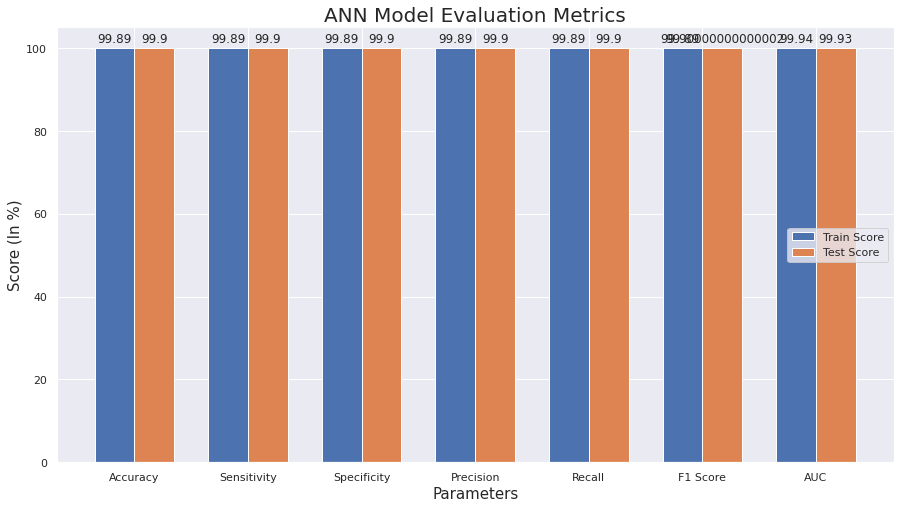

In [220]:
train_test_score_df = pd.DataFrame({'train': [train_ann_dict['accuracy'], train_ann_dict['recall'], train_ann_dict['specificity'], train_ann_dict['precision'], train_ann_dict['recall'], train_ann_dict['f1_score'], train_ann_dict['auc']], 
                                    'test': [test_ann_dict['accuracy'], test_ann_dict['Recall'], test_ann_dict['Specificity'], test_ann_dict['Precision'], test_ann_dict['Recall'], test_ann_dict['f1_score'], test_ann_dict['AUC']]},
                                   index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])

fig, ax = plt.subplots()
x = np.arange(len(train_test_score_df.index))
width = 0.35


ax.set_ylabel('Score (In %)', fontdict={'fontsize': 15})
ax.set_xlabel('Parameters', fontdict={'fontsize': 15})
ax.set_title('ANN Model Evaluation Metrics', fontdict={'fontsize': 20})
ax.set_xticks(x)
ax.set_xticklabels(train_test_score_df.index)

rects1 = ax.bar(x - width/2, train_test_score_df['train'], width, label='Train Score')
for rect in rects1:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

rects2 = ax.bar(x + width/2, train_test_score_df['test'], width, label='Test Score')
for rect in rects2:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

ax.legend(loc=5)
plt.show()

#### Conclusions for this model:

1. **Recall** is almost **99.9%**, which indicates that 0.01% of fraudulent transactions are deemed as Not Fraud. This value can be highly acceptable.

2. **Precision** is whopping **99.9%**, which indicates that the False Positive count (i.e., transactions which are valid but are considered as fraud) of the model is very low. So, this value is acceptable.

In [221]:
metrics_dict['imbalanced']['ann']['accuracy'] = test_ann_dict['accuracy']
metrics_dict['imbalanced']['ann']['sensitivity'] = test_ann_dict['Recall']
metrics_dict['imbalanced']['ann']['specificity'] = test_ann_dict['Specificity']
metrics_dict['imbalanced']['ann']['precision'] = test_ann_dict['Precision']
metrics_dict['imbalanced']['ann']['recall'] = test_ann_dict['Recall']
metrics_dict['imbalanced']['ann']['auc'] = test_ann_dict['AUC']
metrics_dict['imbalanced']['ann']['f1'] = test_ann_dict['f1_score']

In [222]:
metrics_dict['imbalanced']['ann']

{'accuracy': 99.9,
 'sensitivity': 99.9,
 'specificity': 99.9,
 'precision': 99.9,
 'recall': 99.9,
 'f1': 99.90000000000002,
 'auc': 99.93}

# 7. <a id="header1_7">Random Sampling</a>

In [223]:
random_oversample = RandomOverSampler(random_state=314)

In [224]:
X_train, y_train = random_oversample.fit_resample(X_train, y_train)

In [225]:
y_train.value_counts()

1    218484
0    218484
Name: Class, dtype: int64

## 7.1. <a id = "header2_7_1">Logistic Regression</a>

In [226]:
# fetch_vif_df(X_train_over)

In [227]:
logreg = LogisticRegression()
model = logreg.fit(X_train, y_train)
pred_probs_train = model.predict_proba(X_train)

In [228]:
y_train_pred_final = pd.DataFrame(y_train)
y_train_pred_final['class_probability'] = pred_probs_train[:,1]
numbers = np.arange(0.25, 0.3, 0.002)
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.class_probability.map(lambda x: 1 if x > i else 0)

In [229]:
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])
for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Class, y_train_pred_final[i])
    accuracy = (cm1[0, 0] + cm1[1, 1]) / sum(sum(cm1))
    speci = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])
    sensi = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1])
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]
cutoff_df

prob  accuracy     sensi     speci
0.250  0.250  0.944277  0.952550  0.936004
0.252  0.252  0.944600  0.952550  0.936650
0.254  0.254  0.944946  0.952550  0.937341
0.256  0.256  0.945248  0.952550  0.937945
0.258  0.258  0.945596  0.952550  0.938641
0.260  0.260  0.945930  0.952550  0.939309
0.262  0.262  0.944861  0.949868  0.939854
0.264  0.264  0.945179  0.949868  0.940490
0.266  0.266  0.945513  0.949868  0.941158
0.268  0.268  0.945847  0.949868  0.941826
0.270  0.270  0.946165  0.949868  0.942463
0.272  0.272  0.946449  0.949868  0.943030
0.274  0.274  0.945337  0.947062  0.943611
0.276  0.276  0.945630  0.947062  0.944197
0.278  0.278  0.944657  0.944380  0.944934
0.280  0.280  0.944914  0.944380  0.945447
0.282  0.282  0.945172  0.944380  0.945964
0.284  0.284  0.945495  0.944380  0.946609
0.286  0.286  0.944394  0.941630  0.947159
0.288  0.288  0.944657  0.941630  0.947685
0.290  0.290  0.944904  0.941630  0.948179
0.292  0.292  0.945133  0.941630  0.948637
0.294  0.294  0.945360  0.941630  0.949090
0.296  0.296  0.945618  0.941630  0.949607
0.298  0.298  0.945866  0.941630  0.950102

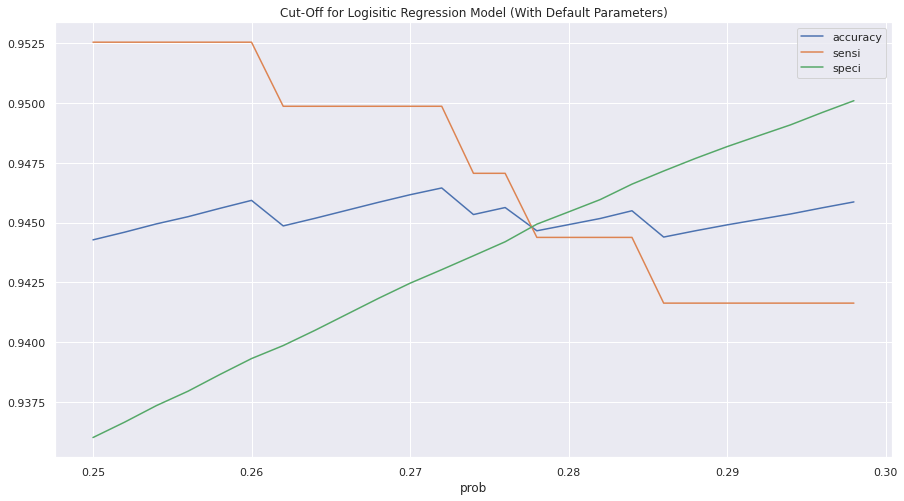

In [230]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.title('Cut-Off for Logisitic Regression Model (With Default Parameters)')
plt.show()

#### From the curve above, 0.278 seems to be the optimum point to take it as a cutoff probability.

In [231]:
cut_off = 0.278

In [232]:
conf_matrix = metrics.confusion_matrix(y_train_pred_final.Class, y_train_pred_final[cut_off])

TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

accuracy_score = metrics.accuracy_score(y_train_pred_final.Class, y_train_pred_final[cut_off])
accuracy_score = round(accuracy_score*100, 2)

precision_score = metrics.precision_score(y_train_pred_final.Class, y_train_pred_final[cut_off])
precision_score = round(precision_score*100, 2)

recall_score = metrics.recall_score(y_train_pred_final.Class, y_train_pred_final[cut_off])
recall_score = round(recall_score*100, 2)

sensitivity = TP / float(FN + TP)
sensitivity = round(sensitivity*100, 2)

specificity = TN / float(TN + FP)
specificity = round(specificity*100, 2)

f1_score = metrics.f1_score(y_train_pred_final.Class, y_train_pred_final[cut_off])
f1_score = round(f1_score*100, 2)

auc_score = metrics.roc_auc_score(y_train_pred_final.Class, y_train_pred_final.class_probability)
auc_score = round(auc_score*100, 2)

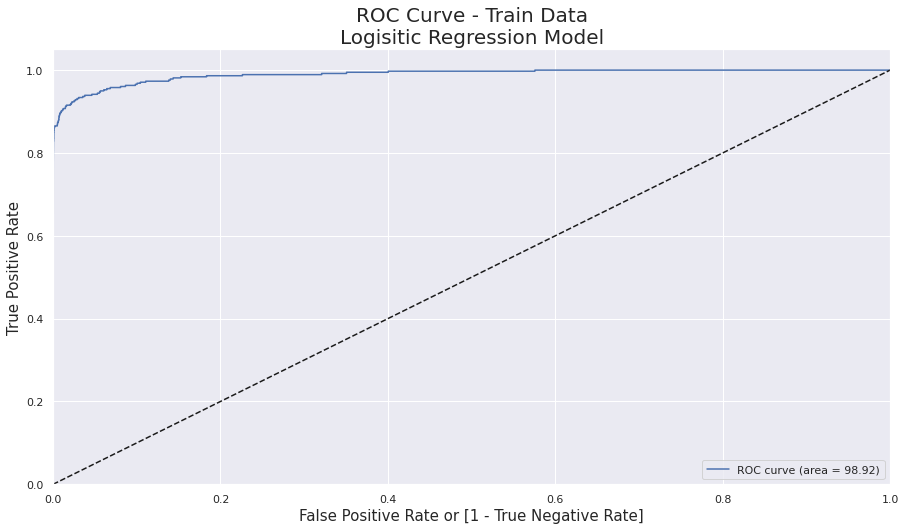

In [233]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Class, y_train_pred_final.class_probability, drop_intermediate=False )
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]', fontdict={'fontsize': 15})
plt.ylabel('True Positive Rate', fontdict={'fontsize': 15})
plt.title('ROC Curve - Train Data\nLogisitic Regression Model', fontdict={'fontsize': 20})
plt.legend(loc="lower right")
plt.show()

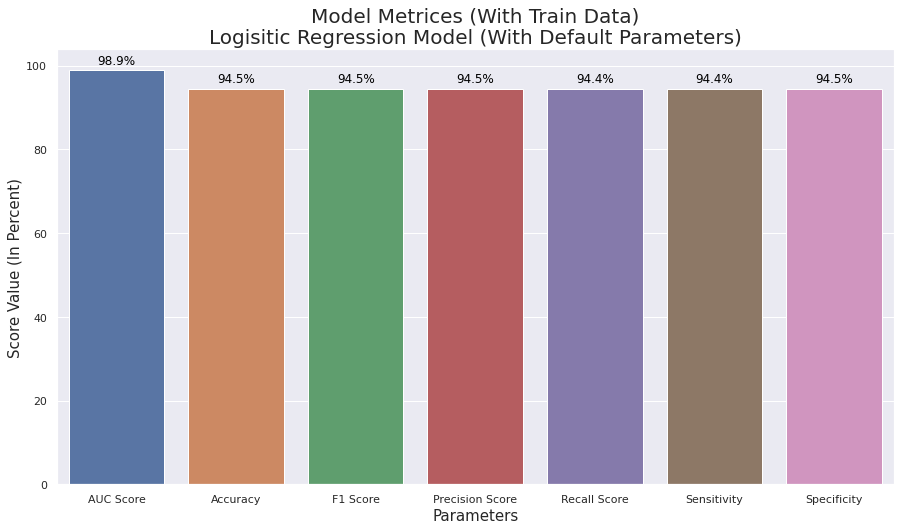

In [234]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision Score', 'Recall Score', 'F1 Score', 'AUC Score'],
                     'Value': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score]}, index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision Score', 'Recall Score', 'F1 Score', 'AUC Score'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('Model Metrices (With Train Data)\nLogisitic Regression Model (With Default Parameters)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

### 6.3.2. Test Data

In [235]:
pred_probs_test = model.predict_proba(X_test)

In [236]:
metrics.roc_auc_score(y_test, pred_probs_test[:,1])

0.9846183049436414

In [237]:
y_test_pred_final = pd.DataFrame(y_test)
y_test_pred_final['class_probability'] = pred_probs_test[:,1]
y_test_pred_final['class_predicted'] = y_test_pred_final.class_probability.map(lambda x: 1 if x > cut_off else 0)
y_test_pred_final

Class  class_probability  class_predicted
93660       0           0.065011                0
184313      0           0.011263                0
849         0           0.035580                0
36763       0           0.116817                0
98883       0           0.188901                0
...       ...                ...              ...
164287      0           0.003943                0
105359      0           0.022714                0
177345      0           0.020172                0
113054      0           0.010172                0
273719      0           0.010556                0

[54717 rows x 3 columns]

In [238]:
conf_matrix_test = metrics.confusion_matrix(y_test_pred_final.Class, y_test_pred_final.class_predicted)

TN_test = conf_matrix[0, 0]
FP_test = conf_matrix[0, 1]
FN_test = conf_matrix[1, 0]
TP_test = conf_matrix[1, 1]

accuracy_score_test = metrics.accuracy_score(y_test_pred_final.Class, y_test_pred_final.class_predicted)
accuracy_score_test = round(accuracy_score_test*100, 2)

precision_score_test = metrics.precision_score(y_test_pred_final.Class, y_test_pred_final.class_predicted)
precision_score_test = round(precision_score_test*100, 2)

recall_score_test = metrics.recall_score(y_test_pred_final.Class, y_test_pred_final.class_predicted)
recall_score_test = round(recall_score_test*100, 2)

sensitivity_test = TP_test / float(FN_test + TP_test)
sensitivity_test = round(sensitivity_test*100, 2)

specificity_test = TN_test / float(TN_test + FP_test)
specificity_test = round(specificity_test*100, 2)

f1_score_test = metrics.f1_score(y_test_pred_final.Class, y_test_pred_final.class_predicted)
f1_score_test = round(f1_score_test*100, 2)

auc_score_test = metrics.roc_auc_score(y_test_pred_final.Class, y_test_pred_final.class_probability)
auc_score_test = round(auc_score_test*100, 2)

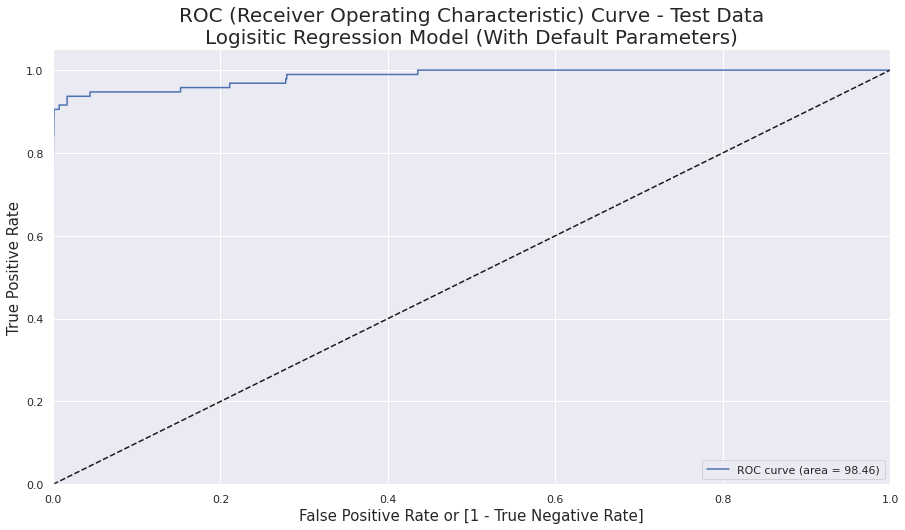

In [239]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_pred_final.Class, y_test_pred_final.class_probability, drop_intermediate=False )
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]', fontdict={'fontsize': 15})
plt.ylabel('True Positive Rate', fontdict={'fontsize': 15})
plt.title('ROC (Receiver Operating Characteristic) Curve - Test Data\nLogisitic Regression Model (With Default Parameters)', fontdict={'fontsize': 20})
plt.legend(loc="lower right")
plt.show()

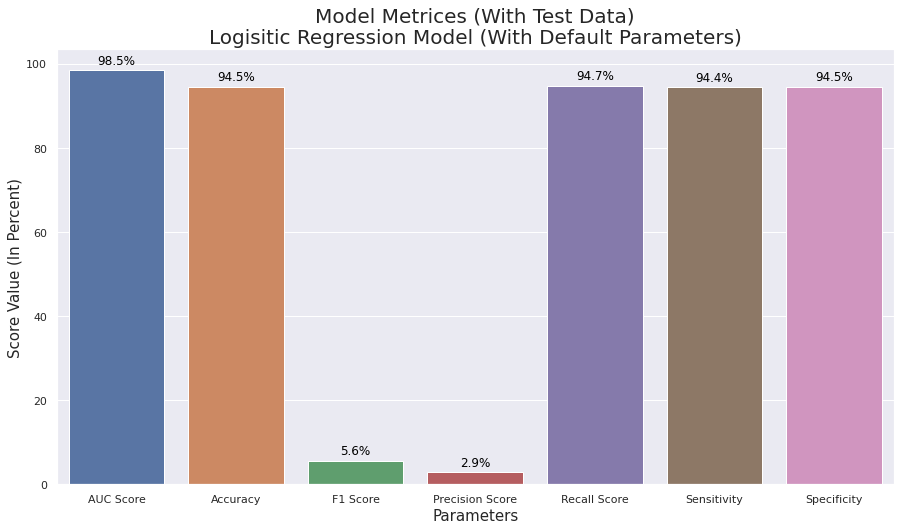

In [240]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision Score', 'Recall Score', 'F1 Score', 'AUC Score'],
                     'Value': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]}, index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision Score', 'Recall Score', 'F1 Score', 'AUC Score'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('Model Metrices (With Test Data)\nLogisitic Regression Model (With Default Parameters)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

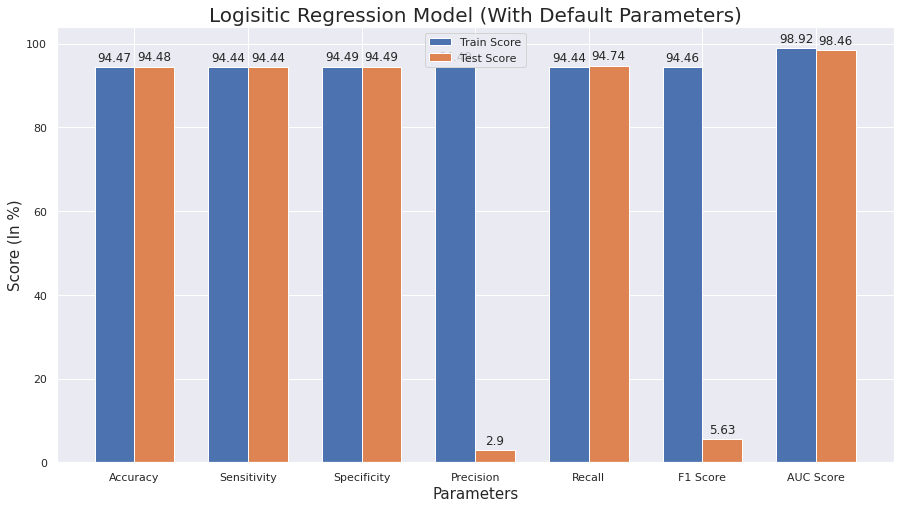

In [241]:
train_test_score_df = pd.DataFrame({'train': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score], 
                                    'test': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                                   index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC Score'])   

fig, ax = plt.subplots()
x = np.arange(len(train_test_score_df.index))
width = 0.35


ax.set_ylabel('Score (In %)', fontdict={'fontsize': 15})
ax.set_xlabel('Parameters', fontdict={'fontsize': 15})
ax.set_title('Logisitic Regression Model (With Default Parameters)', fontdict={'fontsize': 20})
ax.set_xticks(x)
ax.set_xticklabels(train_test_score_df.index)

rects1 = ax.bar(x - width/2, train_test_score_df['train'], width, label='Train Score')
for rect in rects1:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

rects2 = ax.bar(x + width/2, train_test_score_df['test'], width, label='Test Score')
for rect in rects2:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

ax.legend()
plt.show()

#### Conclusions for this model:

1. **Recall** is almost **95%**, which indicates that 5.26% of fraudulent transactions are deemed as Not Fraud. This value can be acceptable but, it will be even better if we could increase this value further.

2. **Precision** is just **2.4%**, which indicates that the False Positive count (i.e., transactions which are valid but are considered as fraud) of the model is very high. Due to this there will be no financial loss at all for the bank. But this behavior (of deeming non-fraudulent transactions as fraud) leads to very bad banking experience because majority of the transactions are blocked even though being valid ones. So, this value is not at all acceptable.

In [242]:
metrics_dict['random_oversample']['logistics']['accuracy'] = accuracy_score_test
metrics_dict['random_oversample']['logistics']['sensitivity'] = sensitivity_test
metrics_dict['random_oversample']['logistics']['specificity'] = specificity_test
metrics_dict['random_oversample']['logistics']['precision'] = precision_score_test
metrics_dict['random_oversample']['logistics']['recall'] = recall_score_test
metrics_dict['random_oversample']['logistics']['auc'] = auc_score_test
metrics_dict['random_oversample']['logistics']['f1'] = f1_score_test

In [243]:
metrics_dict['random_oversample']['logistics']

{'accuracy': 94.48,
 'sensitivity': 94.44,
 'specificity': 94.49,
 'precision': 2.9,
 'recall': 94.74,
 'f1': 5.63,
 'auc': 98.46}

## 7.2. <a id = "header2_7_2">Decision Trees</a>

In [244]:
dt_hyp_tuned = DecisionTreeClassifier(random_state=314)

In [245]:
params = {
    'max_depth': list(range(5, 15, 3)),
    'min_samples_leaf': list(range(50, 1001, 50)),
    'criterion': ["gini", "entropy"]
}

In [246]:
scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

In [247]:
dt_hyp_tuned = GridSearchCV(estimator=dt_hyp_tuned, param_grid=params, cv=4, n_jobs=-1, verbose=1, scoring=scorer)

In [248]:
dt_hyp_tuned.fit(X_train, y_train)

Fitting 4 folds for each of 160 candidates, totalling 640 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=314),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 8, 11, 14],
                         'min_samples_leaf': [50, 100, 150, 200, 250, 300, 350,
                                              400, 450, 500, 550, 600, 650, 700,
                                              750, 800, 850, 900, 950, 1000]},
             scoring=make_scorer(roc_auc_score, needs_proba=True), verbose=1)

In [249]:
score_df = pd.DataFrame(dt_hyp_tuned.cv_results_)
score_df.nlargest(5, "mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
140       8.486033      0.144843         0.032495        0.000139   
120       8.463826      0.127350         0.035293        0.002535   
121       8.482469      0.201019         0.034344        0.002258   
60        9.658117      0.119240         0.034869        0.002469   
141       8.478565      0.297986         0.033159        0.001849   

    param_criterion param_max_depth param_min_samples_leaf  \
140         entropy              14                     50   
120         entropy              11                     50   
121         entropy              11                    100   
60             gini              14                     50   
141         entropy              14                    100   

                                                params  split0_test_score  \
140  {'criterion': 'entropy', 'max_depth': 14, 'min...           0.999797   
120  {'criterion': 'entropy', 'max_depth': 11, 'min...           0.999781   
121  {'criterion': 'entropy', 'max_depth': 11, 'min...           0.999800   
60   {'criterion': 'gini', 'max_depth': 14, 'min_sa...           0.999788   
141  {'criterion': 'entropy', 'max_depth': 14, 'min...           0.999808   

     split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
140           0.999828           0.999733           0.999799         0.999789   
120           0.999808           0.999717           0.999772         0.999770   
121           0.999782           0.999674           0.999720         0.999744   
60            0.999746           0.999647           0.999768         0.999737   
141           0.999775           0.999640           0.999717         0.999735   

     std_test_score  rank_test_score  
140        0.000035                1  
120        0.000033                2  
121        0.000050                3  
60         0.000054                4  
141        0.000064                5

In [250]:
dt_best_est = dt_hyp_tuned.best_estimator_
dt_best_est

DecisionTreeClassifier(criterion='entropy', max_depth=14, min_samples_leaf=50,
                       random_state=314)

In [251]:
pred_probs_train = dt_best_est.predict(X_train)
pred_probs_train

array([0, 0, 0, ..., 1, 1, 1])

In [252]:
conf_matrix = metrics.confusion_matrix(y_train, pred_probs_train)

TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

accuracy_score = metrics.accuracy_score(y_train, pred_probs_train)
accuracy_score = round(accuracy_score*100, 2)

precision_score = metrics.precision_score(y_train, pred_probs_train)
precision_score = round(precision_score*100, 2)

recall_score = metrics.recall_score(y_train, pred_probs_train)
recall_score = round(recall_score*100, 2)

sensitivity = TP / float(FN + TP)
sensitivity = round(sensitivity*100, 2)

specificity = TN / float(TN + FP)
specificity = round(specificity*100, 2)

f1_score = metrics.f1_score(y_train, pred_probs_train)
f1_score = round(f1_score*100, 2)

auc_score = metrics.roc_auc_score(y_train, pred_probs_train)
auc_score = round(auc_score*100, 2)

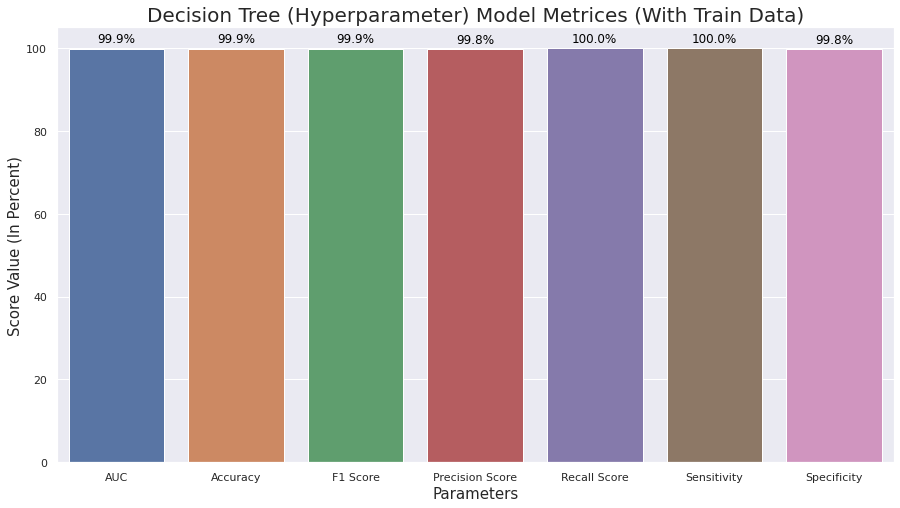

In [253]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision Score', 'Recall Score', 'F1 Score', 'AUC'],
                     'Value': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score]},
                    index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('Decision Tree (Hyperparameter) Model Metrices (With Train Data)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

In [254]:
pred_probs_test = dt_best_est.predict(X_test)
pred_probs_test

array([0, 0, 0, ..., 0, 0, 0])

In [255]:
conf_matrix_test = metrics.confusion_matrix(y_test, pred_probs_test)

TN_test = conf_matrix[0, 0]
FP_test = conf_matrix[0, 1]
FN_test = conf_matrix[1, 0]
TP_test = conf_matrix[1, 1]

accuracy_score_test = metrics.accuracy_score(y_test, pred_probs_test)
accuracy_score_test = round(accuracy_score_test*100, 2)

precision_score_test = metrics.precision_score(y_test, pred_probs_test)
precision_score_test = round(precision_score_test*100, 2)

recall_score_test = metrics.recall_score(y_test, pred_probs_test)
recall_score_test = round(recall_score_test*100, 2)

sensitivity_test = TP_test / float(FN_test + TP_test)
sensitivity_test = round(sensitivity_test*100, 2)

specificity_test = TN_test / float(TN_test + FP_test)
specificity_test = round(specificity_test*100, 2)

f1_score_test = metrics.f1_score(y_test, pred_probs_test)
f1_score_test = round(f1_score_test*100, 2)

auc_score_test = round(metrics.roc_auc_score(y_test, pred_probs_test)*100, 2)

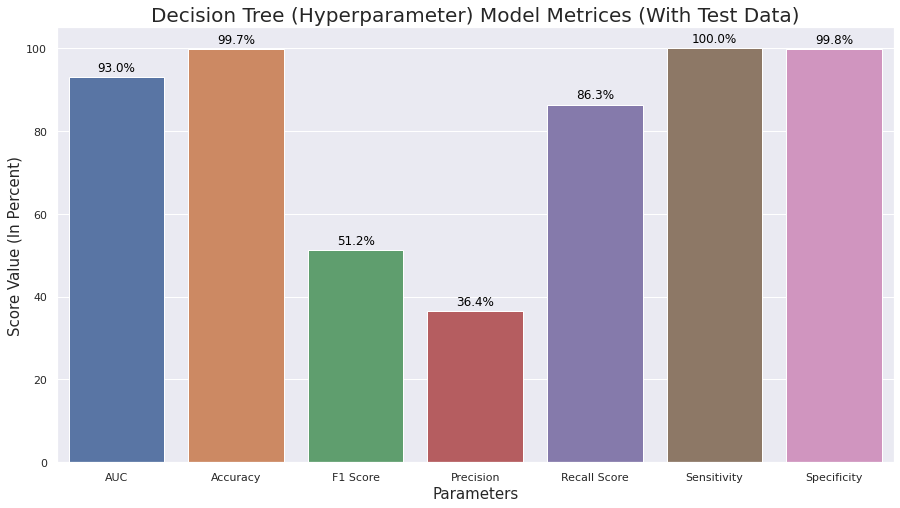

In [256]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall Score', 'F1 Score', 'AUC'],
                     'Value': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                    index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('Decision Tree (Hyperparameter) Model Metrices (With Test Data)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

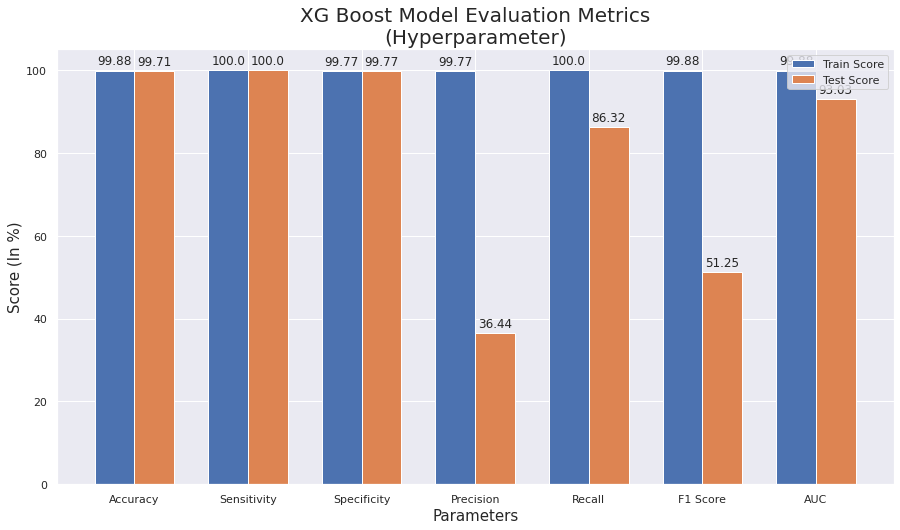

In [257]:
train_test_score_df = pd.DataFrame({'train': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score], 
                                    'test': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                                   index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   

fig, ax = plt.subplots()
x = np.arange(len(train_test_score_df.index))
width = 0.35


ax.set_ylabel('Score (In %)', fontdict={'fontsize': 15})
ax.set_xlabel('Parameters', fontdict={'fontsize': 15})
ax.set_title('XG Boost Model Evaluation Metrics\n(Hyperparameter)', fontdict={'fontsize': 20})
ax.set_xticks(x)
ax.set_xticklabels(train_test_score_df.index)

rects1 = ax.bar(x - width/2, train_test_score_df['train'], width, label='Train Score')
for rect in rects1:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

rects2 = ax.bar(x + width/2, train_test_score_df['test'], width, label='Test Score')
for rect in rects2:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

ax.legend()
plt.show()

#### Conclusions for this model:

1. **Recall** is almost **85%**, which indicates that the model is not able to detect 15% of fraudulent transactions, i.e., 15% of fraudulent transactions are deemed as Not Fraud which is not acceptable as it will lead to loss for the bank. **This value is not at all acceptable**

2. **Precision** is just **49%**, which indicates that the False Positive count (i.e., transactions which are valid but are considered as fraud) of the model is still high enough. Due to this there will be no financial loss as such for the bank. But this behavior (of deeming non-fraudulent transactions as fraud) leads to very bad banking experience because majority of the transactions are blocked even though being valid ones. **So, this value is not at all acceptable.**

In [258]:
metrics_dict['random_oversample']['dt']['accuracy'] = accuracy_score_test
metrics_dict['random_oversample']['dt']['sensitivity'] = sensitivity_test
metrics_dict['random_oversample']['dt']['specificity'] = specificity_test
metrics_dict['random_oversample']['dt']['precision'] = precision_score_test
metrics_dict['random_oversample']['dt']['recall'] = recall_score_test
metrics_dict['random_oversample']['dt']['auc'] = auc_score_test
metrics_dict['random_oversample']['dt']['f1'] = f1_score_test

In [259]:
metrics_dict['random_oversample']['dt']

{'accuracy': 99.71,
 'sensitivity': 100.0,
 'specificity': 99.77,
 'precision': 36.44,
 'recall': 86.32,
 'f1': 51.25,
 'auc': 93.03}

## 7.3. <a id = "header2_7_3">Random Forest</a>

In [260]:
rf_hyp_tuned = RandomForestClassifier(random_state=314, n_jobs=-1)

In [261]:
params = {
    'max_depth': list(range(3, 8)),
    'min_samples_leaf': list(range(50, 1001, 100)),
    'max_features': list(range(2, 5)),
    'n_estimators': list(range(10, 31, 10))
}

In [262]:
scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

In [263]:
rf_hyp_tuned_grid = GridSearchCV(estimator=rf_hyp_tuned, param_grid=params, 
                                 cv=4, n_jobs=-1, verbose=1, 
                                 scoring=scorer)

In [264]:
rf_hyp_tuned_grid.fit(X_train, y_train)

Fitting 4 folds for each of 450 candidates, totalling 1800 fits
[14:49:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:50:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:51:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:55:21] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[14:50:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:53:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:57:08] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:59:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[14:50:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:52:36] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:53:56] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:57:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[14:47:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:51:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:53:36] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:55:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[14:49:58] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:52:36] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:54:00] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:55:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[14:51:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:53:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:56:57] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:59:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[14:50:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:51:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:55:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:57:26] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[14:50:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:52:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:54:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:55:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[14:50:21] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:53:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:57:07] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:59:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[14:50:08] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:52:40] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:54:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:55:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[14:47:57] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:51:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:53:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:56:00] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[14:46:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:47:44] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:50:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:53:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[14:49:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:50:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:52:00] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:55:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[14:49:12] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:50:38] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:52:00] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:55:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=314),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [50, 150, 250, 350, 450, 550, 650,
                                              750, 850, 950],
                         'n_estimators': [10, 20, 30]},
             scoring=make_scorer(roc_auc_score, needs_proba=True), verbose=1)

In [265]:
score_df = pd.DataFrame(rf_hyp_tuned_grid.cv_results_)
score_df.nlargest(5,"mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
391      19.376017      0.180257         0.793104        0.082065   
392      20.169801      0.170701         0.754125        0.094647   
421      24.567100      0.052205         1.147078        0.275602   
422      25.609180      0.188334         0.867398        0.051064   
425      25.463318      0.102466         0.759682        0.046702   

    param_max_depth param_max_features param_min_samples_leaf  \
391               7                  3                     50   
392               7                  3                     50   
421               7                  4                     50   
422               7                  4                     50   
425               7                  4                    150   

    param_n_estimators                                             params  \
391                 20  {'max_depth': 7, 'max_features': 3, 'min_sampl...   
392                 30  {'max_depth': 7, 'max_features': 3, 'min_sampl...   
421                 20  {'max_depth': 7, 'max_features': 4, 'min_sampl...   
422                 30  {'max_depth': 7, 'max_features': 4, 'min_sampl...   
425                 30  {'max_depth': 7, 'max_features': 4, 'min_sampl...   

     split0_test_score  split1_test_score  split2_test_score  \
391           0.998856           0.999232           0.998872   
392           0.998665           0.999109           0.998939   
421           0.998537           0.998623           0.998633   
422           0.998563           0.998709           0.998548   
425           0.998773           0.998921           0.998904   

     split3_test_score  mean_test_score  std_test_score  rank_test_score  
391           0.998632         0.998898        0.000215                1  
392           0.998862         0.998894        0.000160                2  
421           0.998831         0.998656        0.000108                3  
422           0.998749         0.998642        0.000088                4  
425           0.997718         0.998579        0.000501                5

In [266]:
rf_best = rf_hyp_tuned_grid.best_estimator_
rf_best

RandomForestClassifier(max_depth=7, max_features=3, min_samples_leaf=50,
                       n_estimators=20, n_jobs=-1, random_state=314)

In [267]:
pred_probs_train = rf_best.predict(X_train)

In [268]:
conf_matrix = metrics.confusion_matrix(y_train, pred_probs_train)

TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

accuracy_score = metrics.accuracy_score(y_train, pred_probs_train)
accuracy_score = round(accuracy_score*100, 2)

precision_score = metrics.precision_score(y_train, pred_probs_train)
precision_score = round(precision_score*100, 2)

recall_score = metrics.recall_score(y_train, pred_probs_train)
recall_score = round(recall_score*100, 2)

sensitivity = TP / float(FN + TP)
sensitivity = round(sensitivity*100, 2)

specificity = TN / float(TN + FP)
specificity = round(specificity*100, 2)

f1_score = metrics.f1_score(y_train, pred_probs_train)
f1_score = round(f1_score*100, 2)

auc_score = round(metrics.roc_auc_score(y_train, pred_probs_train)*100, 2)

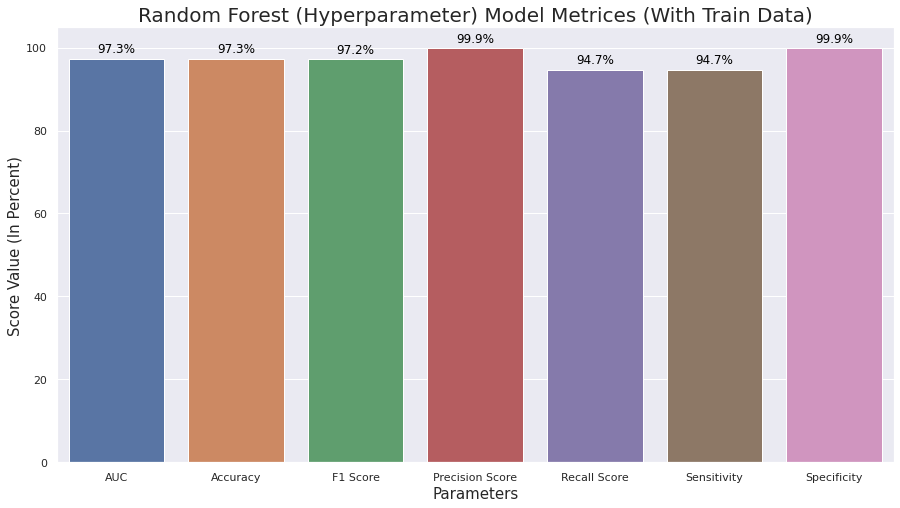

In [269]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision Score', 'Recall Score', 'F1 Score', 'AUC'],
                     'Value': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score]},
                    index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('Random Forest (Hyperparameter) Model Metrices (With Train Data)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

In [270]:
pred_probs_test = rf_best.predict(X_test)

In [271]:
conf_matrix_test = metrics.confusion_matrix(y_test, pred_probs_test)

TN_test = conf_matrix[0, 0]
FP_test = conf_matrix[0, 1]
FN_test = conf_matrix[1, 0]
TP_test = conf_matrix[1, 1]

accuracy_score_test = metrics.accuracy_score(y_test, pred_probs_test)
accuracy_score_test = round(accuracy_score_test*100, 2)

precision_score_test = metrics.precision_score(y_test, pred_probs_test)
precision_score_test = round(precision_score_test*100, 2)

recall_score_test = metrics.recall_score(y_test, pred_probs_test)
recall_score_test = round(recall_score_test*100, 2)

sensitivity_test = TP_test / float(FN_test + TP_test)
sensitivity_test = round(sensitivity_test*100, 2)

specificity_test = TN_test / float(TN_test + FP_test)
specificity_test = round(specificity_test*100, 2)

f1_score_test = metrics.f1_score(y_test, pred_probs_test)
f1_score_test = round(f1_score_test*100, 2)

auc_score_test = round(metrics.roc_auc_score(y_test, pred_probs_test)*100, 2)

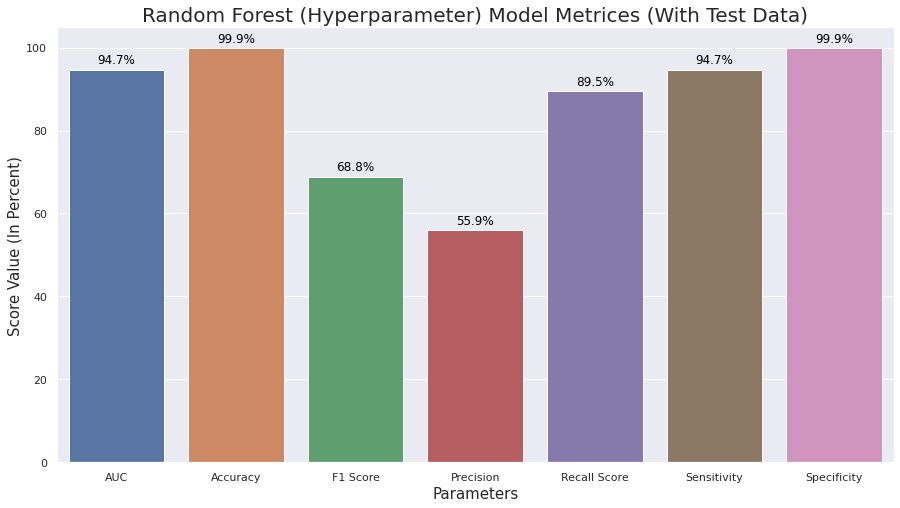

In [272]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall Score', 'F1 Score', 'AUC'],
                     'Value': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                    index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('Random Forest (Hyperparameter) Model Metrices (With Test Data)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

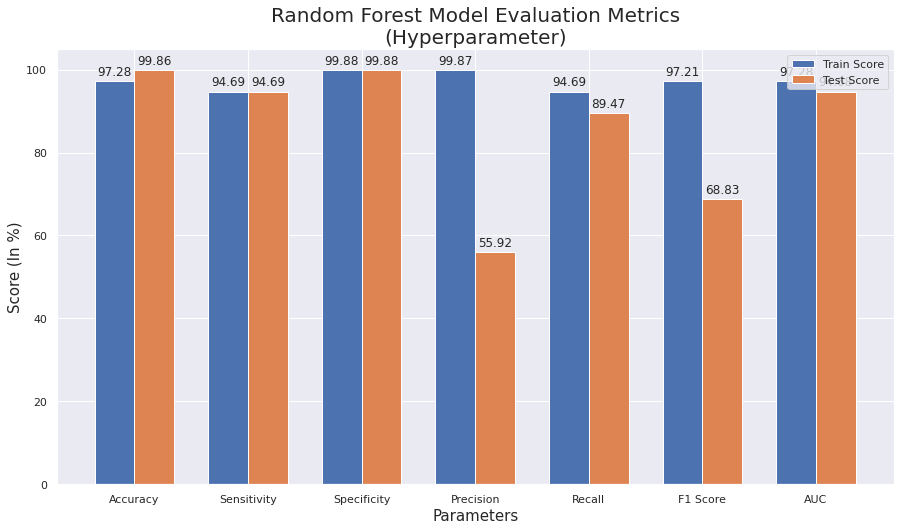

In [273]:
train_test_score_df = pd.DataFrame({'train': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score], 
                                    'test': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                                   index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   

fig, ax = plt.subplots()
x = np.arange(len(train_test_score_df.index))
width = 0.35


ax.set_ylabel('Score (In %)', fontdict={'fontsize': 15})
ax.set_xlabel('Parameters', fontdict={'fontsize': 15})
ax.set_title('Random Forest Model Evaluation Metrics\n(Hyperparameter)', fontdict={'fontsize': 20})
ax.set_xticks(x)
ax.set_xticklabels(train_test_score_df.index)

rects1 = ax.bar(x - width/2, train_test_score_df['train'], width, label='Train Score')
for rect in rects1:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

rects2 = ax.bar(x + width/2, train_test_score_df['test'], width, label='Test Score')
for rect in rects2:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

ax.legend()
plt.show()

#### Conclusions for this model:

1. **Recall** is almost **89.47%**, which indicates that 10.53% of fraudulent transactions are deemed as Not Fraud. This value is not acceptable at all. It will be better if we could increase this value.

2. **Precision** is **56%**, which indicates that the False Positive count (i.e., transactions which are valid but are considered as fraud) of the model is high. Due to this there will be no financial loss at all for the bank. But this behavior (of deeming non-fraudulent transactions as fraud) leads to very bad banking experience because majority of the transactions are blocked even though being valid ones. So, this value is not at all acceptable.

In [274]:
metrics_dict['random_oversample']['rf']['accuracy'] = accuracy_score_test
metrics_dict['random_oversample']['rf']['sensitivity'] = sensitivity_test
metrics_dict['random_oversample']['rf']['specificity'] = specificity_test
metrics_dict['random_oversample']['rf']['precision'] = precision_score_test
metrics_dict['random_oversample']['rf']['recall'] = recall_score_test
metrics_dict['random_oversample']['rf']['auc'] = auc_score_test
metrics_dict['random_oversample']['rf']['f1'] = f1_score_test

In [275]:
metrics_dict['random_oversample']['rf']

{'accuracy': 99.86,
 'sensitivity': 94.69,
 'specificity': 99.88,
 'precision': 55.92,
 'recall': 89.47,
 'f1': 68.83,
 'auc': 94.68}

## 7.4. <a id = "header2_7_4">Gradient Boosting</a>

In [276]:
gbm_hyp_tuned = GradientBoostingClassifier(random_state=314)

In [277]:
params = {
    'max_depth': list(range(3, 8)),
    'max_features': list(range(2, 5)),
    'n_estimators': list(range(10, 31, 10))
}

In [278]:
scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

In [279]:
gbm_hyp_tuned_grid = GridSearchCV(estimator=gbm_hyp_tuned,
                                  param_grid=params, cv=4, n_jobs=-1,
                                  verbose=1, scoring=scorer)

In [280]:
gbm_hyp_tuned_grid.fit(X_train, y_train)

Fitting 4 folds for each of 45 candidates, totalling 180 fits


GridSearchCV(cv=4, estimator=GradientBoostingClassifier(random_state=314),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': [2, 3, 4],
                         'n_estimators': [10, 20, 30]},
             scoring=make_scorer(roc_auc_score, needs_proba=True), verbose=1)

In [281]:
score_df = pd.DataFrame(gbm_hyp_tuned_grid.cv_results_)
score_df.nlargest(5, "mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
44      28.828885      0.065049         0.116505        0.004504   
41      26.081434      0.117853         0.133294        0.002243   
38      19.570151      0.076477         0.154682        0.000630   
43      21.371043      0.076041         0.096398        0.001677   
35      29.690322      0.117289         0.129012        0.001623   

   param_max_depth param_max_features param_n_estimators  \
44               7                  4                 30   
41               7                  3                 30   
38               7                  2                 30   
43               7                  4                 20   
35               6                  4                 30   

                                               params  split0_test_score  \
44  {'max_depth': 7, 'max_features': 4, 'n_estimat...           0.999911   
41  {'max_depth': 7, 'max_features': 3, 'n_estimat...           0.999910   
38  {'max_depth': 7, 'max_features': 2, 'n_estimat...           0.999920   
43  {'max_depth': 7, 'max_features': 4, 'n_estimat...           0.999853   
35  {'max_depth': 6, 'max_features': 4, 'n_estimat...           0.999856   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
44           0.999947           0.999803           0.999920         0.999895   
41           0.999937           0.999795           0.999906         0.999887   
38           0.999893           0.999815           0.999910         0.999884   
43           0.999894           0.999774           0.999873         0.999849   
35           0.999864           0.999730           0.999865         0.999829   

    std_test_score  rank_test_score  
44        0.000055                1  
41        0.000054                2  
38        0.000041                3  
43        0.000045                4  
35        0.000057                5

In [282]:
gb_best = gbm_hyp_tuned_grid.best_estimator_
gb_best

GradientBoostingClassifier(max_depth=7, max_features=4, n_estimators=30,
                           random_state=314)

In [283]:
pred_probs_train = gb_best.predict(X_train)

In [284]:
conf_matrix = metrics.confusion_matrix(y_train, pred_probs_train)

TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

accuracy_score = metrics.accuracy_score(y_train, pred_probs_train)
accuracy_score = round(accuracy_score*100, 2)

precision_score = metrics.precision_score(y_train, pred_probs_train)
precision_score = round(precision_score*100, 2)

recall_score = metrics.recall_score(y_train, pred_probs_train)
recall_score = round(recall_score*100, 2)

sensitivity = TP / float(FN + TP)
sensitivity = round(sensitivity*100, 2)

specificity = TN / float(TN + FP)
specificity = round(specificity*100, 2)

f1_score = metrics.f1_score(y_train, pred_probs_train)
f1_score = round(f1_score*100, 2)

auc_score = round(metrics.roc_auc_score(y_train, pred_probs_train)*100, 2)

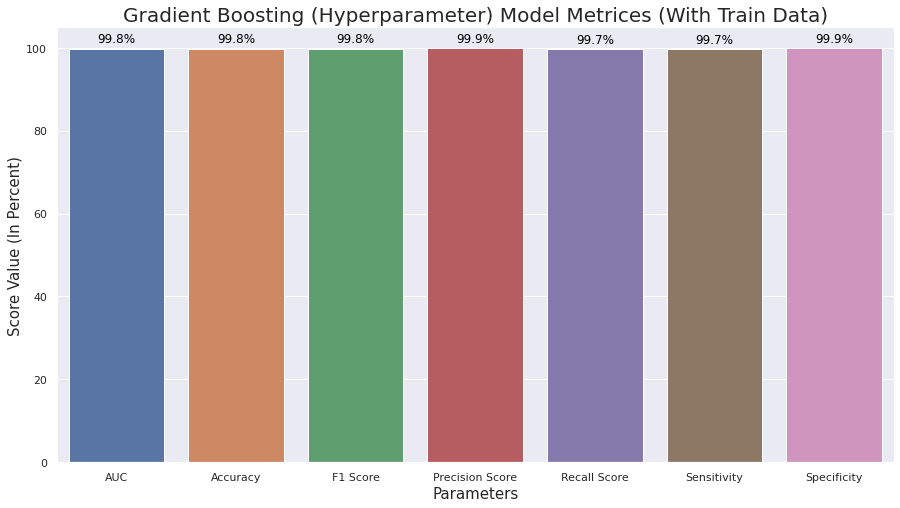

In [285]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision Score', 'Recall Score', 'F1 Score', 'AUC'],
                     'Value': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score]},
                    index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('Gradient Boosting (Hyperparameter) Model Metrices (With Train Data)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

In [286]:
pred_probs_test = gb_best.predict(X_test)

In [287]:
conf_matrix_test = metrics.confusion_matrix(y_test, pred_probs_test)

TN_test = conf_matrix[0, 0]
FP_test = conf_matrix[0, 1]
FN_test = conf_matrix[1, 0]
TP_test = conf_matrix[1, 1]

accuracy_score_test = metrics.accuracy_score(y_test, pred_probs_test)
accuracy_score_test = round(accuracy_score_test*100, 2)

precision_score_test = metrics.precision_score(y_test, pred_probs_test)
precision_score_test = round(precision_score_test*100, 2)

recall_score_test = metrics.recall_score(y_test, pred_probs_test)
recall_score_test = round(recall_score_test*100, 2)

sensitivity_test = TP_test / float(FN_test + TP_test)
sensitivity_test = round(sensitivity_test*100, 2)

specificity_test = TN_test / float(TN_test + FP_test)
specificity_test = round(specificity_test*100, 2)

f1_score_test = metrics.f1_score(y_test, pred_probs_test)
f1_score_test = round(f1_score_test*100, 2)

auc_score_test = round(metrics.roc_auc_score(y_test, pred_probs_test)*100, 2)

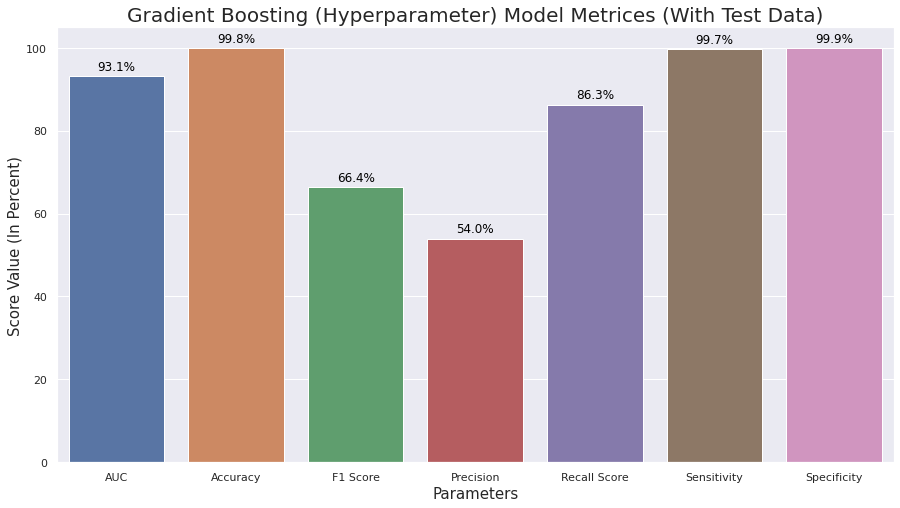

In [288]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall Score', 'F1 Score', 'AUC'],
                     'Value': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                    index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('Gradient Boosting (Hyperparameter) Model Metrices (With Test Data)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

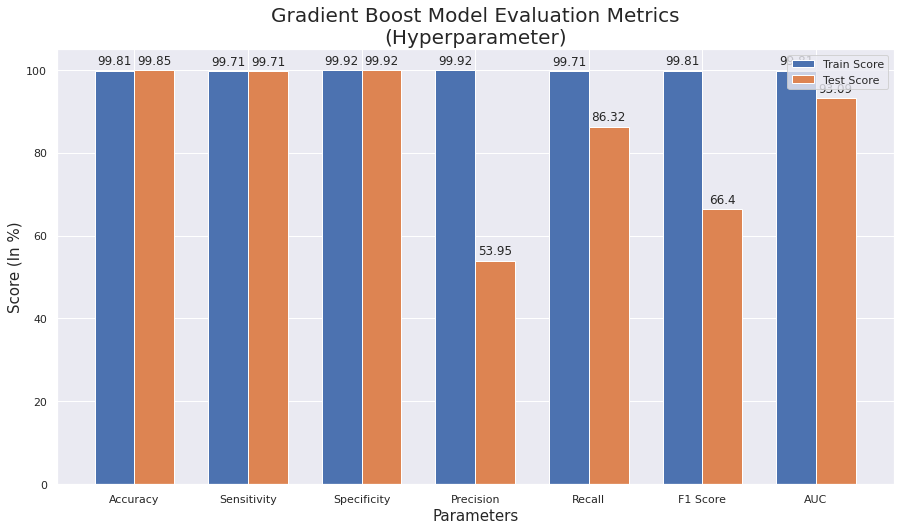

In [289]:
train_test_score_df = pd.DataFrame({'train': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score], 
                                    'test': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                                   index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   

fig, ax = plt.subplots()
x = np.arange(len(train_test_score_df.index))
width = 0.35


ax.set_ylabel('Score (In %)', fontdict={'fontsize': 15})
ax.set_xlabel('Parameters', fontdict={'fontsize': 15})
ax.set_title('Gradient Boost Model Evaluation Metrics\n(Hyperparameter)', fontdict={'fontsize': 20})
ax.set_xticks(x)
ax.set_xticklabels(train_test_score_df.index)

rects1 = ax.bar(x - width/2, train_test_score_df['train'], width, label='Train Score')
for rect in rects1:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

rects2 = ax.bar(x + width/2, train_test_score_df['test'], width, label='Test Score')
for rect in rects2:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

ax.legend()
plt.show()

#### Conclusions for this model:

1. **Recall** is almost **86.32%**, which indicates that 13.68% of fraudulent transactions are deemed as Not Fraud. This value is not acceptable at all. It will be better if we could increase this value.

2. **Precision** is **54%**, which indicates that the False Positive count (i.e., transactions which are valid but are considered as fraud) of the model is high. Due to this there will be no financial loss at all for the bank. But this behavior (of deeming non-fraudulent transactions as fraud) leads to very bad banking experience because majority of the transactions are blocked even though being valid ones. So, this value is not at all acceptable.

In [290]:
metrics_dict['random_oversample']['gb']['accuracy'] = accuracy_score_test
metrics_dict['random_oversample']['gb']['sensitivity'] = sensitivity_test
metrics_dict['random_oversample']['gb']['specificity'] = specificity_test
metrics_dict['random_oversample']['gb']['precision'] = precision_score_test
metrics_dict['random_oversample']['gb']['recall'] = recall_score_test
metrics_dict['random_oversample']['gb']['auc'] = auc_score_test
metrics_dict['random_oversample']['gb']['f1'] = f1_score_test

In [291]:
metrics_dict['random_oversample']['gb']

{'accuracy': 99.85,
 'sensitivity': 99.71,
 'specificity': 99.92,
 'precision': 53.95,
 'recall': 86.32,
 'f1': 66.4,
 'auc': 93.09}

## 7.5. <a id = "header2_7_5">XG Boost</a>

In [292]:
xgreg = XGBClassifier(random_state=314, n_jobs = -1)

In [293]:
params = {'learning_rate': np.arange(0.25, 0.76, 0.25),
          'max_depth': list(range(5, 7)), 
          'min_child_weight': [15, 18], 
          'n_estimators': list(range(25, 76, 25))}

In [294]:
scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

In [295]:
xgboost_hyp_tuned = GridSearchCV(estimator=xgreg, param_grid=params, n_jobs=-1, 
                                 cv=4, scoring=scorer, refit=True, verbose=1)

In [296]:
xgboost_hyp_tuned.fit(X_train, y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits
[15:41:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:41:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:41:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:22:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     num_parallel_tree=None, random_state=314,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, val

In [297]:
score_df = pd.DataFrame(xgboost_hyp_tuned.cv_results_)
score_df.nlargest(5, "mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
19     293.214379      0.547006         0.777438        0.074704   
20     378.447592      2.455329         0.690175        0.094935   
14     354.941358      1.689299         0.803326        0.067763   
35     186.326275      4.247648         0.105428        0.048169   
32     285.466429      3.079114         0.527087        0.095990   

   param_learning_rate param_max_depth param_min_child_weight  \
19                 0.5               6                     15   
20                 0.5               6                     15   
14                 0.5               5                     15   
35                0.75               6                     18   
32                0.75               6                     15   

   param_n_estimators                                             params  \
19                 50  {'learning_rate': 0.5, 'max_depth': 6, 'min_ch...   
20                 75  {'learning_rate': 0.5, 'max_depth': 6, 'min_ch...   
14                 75  {'learning_rate': 0.5, 'max_depth': 5, 'min_ch...   
35                 75  {'learning_rate': 0.75, 'max_depth': 6, 'min_c...   
32                 75  {'learning_rate': 0.75, 'max_depth': 6, 'min_c...   

    split0_test_score  split1_test_score  split2_test_score  \
19           0.999994           0.999996           0.999994   
20           0.999996           0.999996           0.999993   
14           0.999996           0.999996           0.999993   
35           1.000000           0.999987           0.999995   
32           1.000000           0.999990           0.999995   

    split3_test_score  mean_test_score  std_test_score  rank_test_score  
19           0.999991         0.999994        0.000002                1  
20           0.999988         0.999993        0.000003                2  
14           0.999985         0.999992        0.000004                3  
35           0.999987         0.999992        0.000005                4  
32           0.999984         0.999992        0.000006                5

In [298]:
xgboost_best_est = xgboost_hyp_tuned.best_estimator_
xgboost_best_est

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=6,
              min_child_weight=15, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=-1, num_parallel_tree=1, random_state=314,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [299]:
pred_probs_train = xgboost_best_est.predict(X_train)
pred_probs_train

array([0, 0, 0, ..., 1, 1, 1])

In [300]:
conf_matrix = metrics.confusion_matrix(y_train, pred_probs_train)

TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

accuracy_score = metrics.accuracy_score(y_train, pred_probs_train)
accuracy_score = round(accuracy_score*100, 2)

precision_score = metrics.precision_score(y_train, pred_probs_train)
precision_score = round(precision_score*100, 2)

recall_score = metrics.recall_score(y_train, pred_probs_train)
recall_score = round(recall_score*100, 2)

sensitivity = TP / float(FN + TP)
sensitivity = round(sensitivity*100, 2)

specificity = TN / float(TN + FP)
specificity = round(specificity*100, 2)

f1_score = metrics.f1_score(y_train, pred_probs_train)
f1_score = round(f1_score*100, 2)

auc_score = round(metrics.roc_auc_score(y_train, pred_probs_train)*100, 2)

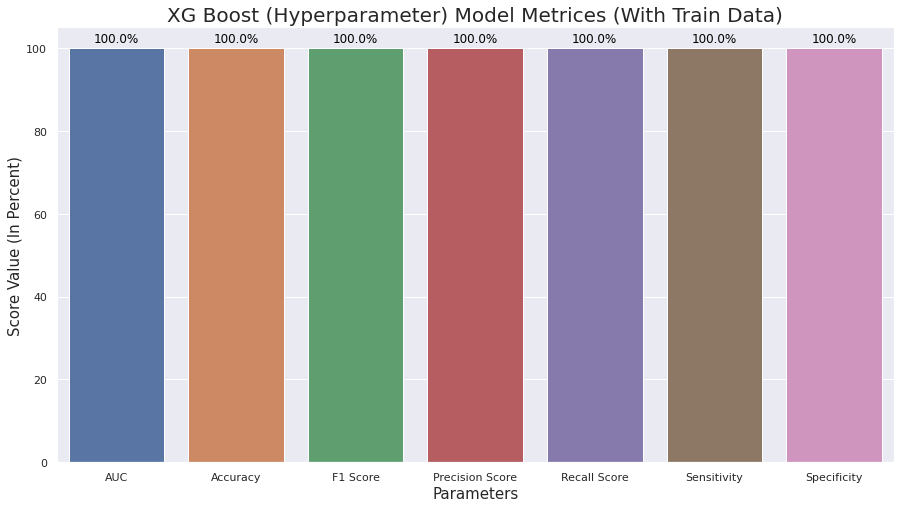

In [301]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision Score', 'Recall Score', 'F1 Score', 'AUC'],
                     'Value': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score]},
                    index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('XG Boost (Hyperparameter) Model Metrices (With Train Data)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

In [302]:
pred_probs_test = xgboost_best_est.predict(X_test)

In [303]:
conf_matrix_test = metrics.confusion_matrix(y_test, pred_probs_test)

TN_test = conf_matrix[0, 0]
FP_test = conf_matrix[0, 1]
FN_test = conf_matrix[1, 0]
TP_test = conf_matrix[1, 1]

accuracy_score_test = metrics.accuracy_score(y_test, pred_probs_test)
accuracy_score_test = round(accuracy_score_test*100, 2)

precision_score_test = metrics.precision_score(y_test, pred_probs_test)
precision_score_test = round(precision_score_test*100, 2)

recall_score_test = metrics.recall_score(y_test, pred_probs_test)
recall_score_test = round(recall_score_test*100, 2)

sensitivity_test = TP_test / float(FN_test + TP_test)
sensitivity_test = round(sensitivity_test*100, 2)

specificity_test = TN_test / float(TN_test + FP_test)
specificity_test = round(specificity_test*100, 2)

f1_score_test = metrics.f1_score(y_test, pred_probs_test)
f1_score_test = round(f1_score_test*100, 2)

auc_score_test = round(metrics.roc_auc_score(y_test, pred_probs_test)*100, 2)

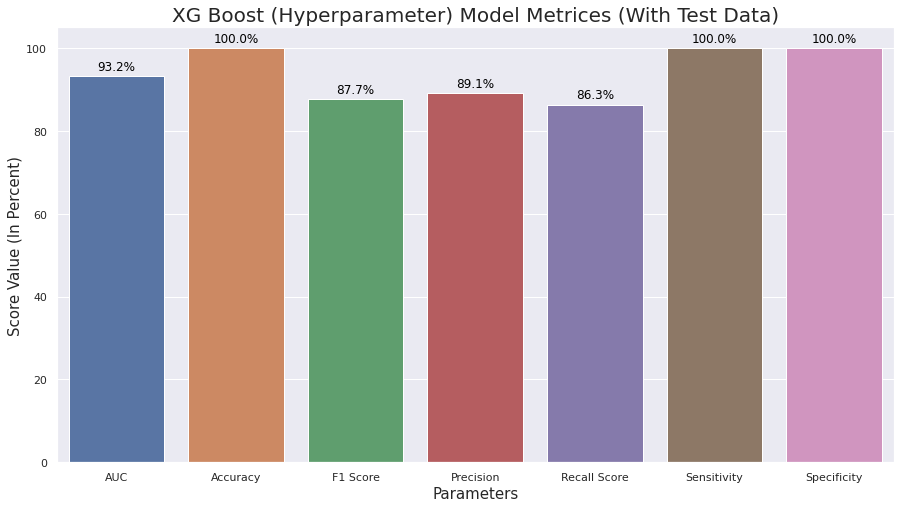

In [304]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall Score', 'F1 Score', 'AUC'],
                     'Value': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                    index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('XG Boost (Hyperparameter) Model Metrices (With Test Data)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

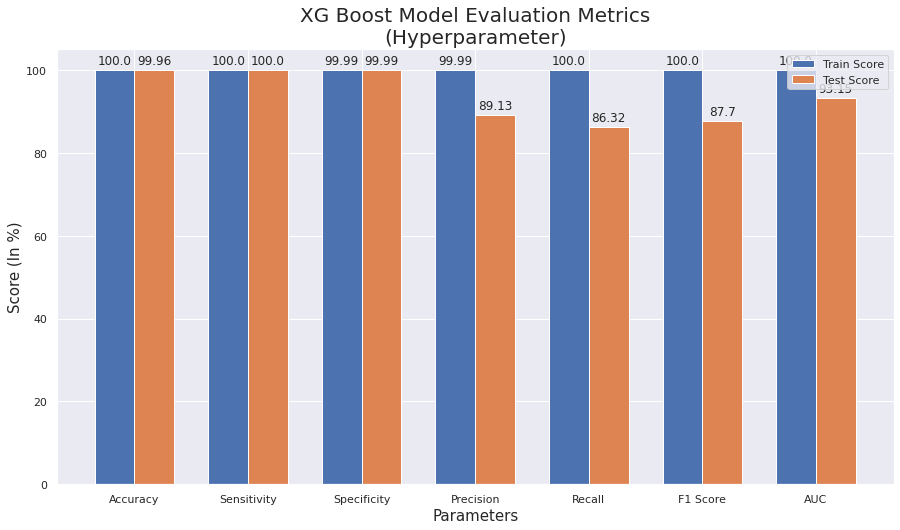

In [305]:
train_test_score_df = pd.DataFrame({'train': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score], 
                                    'test': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                                   index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   

fig, ax = plt.subplots()
x = np.arange(len(train_test_score_df.index))
width = 0.35


ax.set_ylabel('Score (In %)', fontdict={'fontsize': 15})
ax.set_xlabel('Parameters', fontdict={'fontsize': 15})
ax.set_title('XG Boost Model Evaluation Metrics\n(Hyperparameter)', fontdict={'fontsize': 20})
ax.set_xticks(x)
ax.set_xticklabels(train_test_score_df.index)

rects1 = ax.bar(x - width/2, train_test_score_df['train'], width, label='Train Score')
for rect in rects1:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

rects2 = ax.bar(x + width/2, train_test_score_df['test'], width, label='Test Score')
for rect in rects2:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

ax.legend()
plt.show()

#### Conclusions for this model:

1. **Recall** is almost **86.32%**, which indicates that 13.68% of fraudulent transactions are deemed as Not Fraud. This value is not acceptable at all. It will be better if we could increase this value.

2. **Precision** is **89%**, which indicates that the False Positive count (i.e., transactions which are valid but are considered as fraud) of the model is bit low. Due to this there will be no financial loss at all for the bank. But this behavior (of deeming non-fraudulent transactions as fraud) leads to very bad banking experience because majority of the transactions are blocked even though being valid ones. So, this value is somewhat acceptable.

In [306]:
metrics_dict['random_oversample']['xgb']['accuracy'] = accuracy_score_test
metrics_dict['random_oversample']['xgb']['sensitivity'] = sensitivity_test
metrics_dict['random_oversample']['xgb']['specificity'] = specificity_test
metrics_dict['random_oversample']['xgb']['precision'] = precision_score_test
metrics_dict['random_oversample']['xgb']['recall'] = recall_score_test
metrics_dict['random_oversample']['xgb']['auc'] = auc_score_test
metrics_dict['random_oversample']['xgb']['f1'] = f1_score_test

In [307]:
metrics_dict['random_oversample']['xgb']

{'accuracy': 99.96,
 'sensitivity': 100.0,
 'specificity': 99.99,
 'precision': 89.13,
 'recall': 86.32,
 'f1': 87.7,
 'auc': 93.15}

## 7.6. <a id = "header2_7_6">Artificial Neural Net (ANN)</a>

In [308]:
train_label_encoder = LabelEncoder().fit(y_train)
y_train_ann = train_label_encoder.transform(y_train)
y_train_ann = to_categorical(y_train_ann)

In [309]:
test_label_encoder = LabelEncoder().fit(y_test)
y_test_ann = test_label_encoder.transform(y_test)
y_test_ann = to_categorical(y_test_ann)

In [310]:
model = Sequential()

In [311]:
model.add(Dense(10, input_dim=29, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [312]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                300       
_________________________________________________________________
dense_4 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 42        
Total params: 562
Trainable params: 562
Non-trainable params: 0
_________________________________________________________________


In [313]:
metrics_list = ['accuracy', 'FalsePositives', 'TrueNegatives', 'AUC', 'Precision', 'Recall']

In [314]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=metrics_list)

In [315]:
train_data_model_history = model.fit(X_train, y_train_ann, epochs=10, batch_size=14591)

Epoch 1/10
30/30 [==============================] - 1s 7ms/step - loss: 2.3781 - accuracy: 0.5264 - false_positives: 206953.0000 - true_negatives: 230015.0000 - auc: 0.5599 - precision: 0.5264 - recall: 0.5264
Epoch 2/10
30/30 [==============================] - 0s 7ms/step - loss: 0.5742 - accuracy: 0.7128 - false_positives: 125518.0000 - true_negatives: 311450.0000 - auc: 0.7958 - precision: 0.7128 - recall: 0.7128
Epoch 3/10
30/30 [==============================] - 0s 7ms/step - loss: 0.4329 - accuracy: 0.7792 - false_positives: 96492.0000 - true_negatives: 340476.0000 - auc: 0.8693 - precision: 0.7792 - recall: 0.7792
Epoch 4/10
30/30 [==============================] - 0s 7ms/step - loss: 0.3790 - accuracy: 0.8259 - false_positives: 76079.0000 - true_negatives: 360889.0000 - auc: 0.9094 - precision: 0.8259 - recall: 0.8259
Epoch 5/10
30/30 [==============================] - 0s 8ms/step - loss: 0.3379 - accuracy: 0.8534 - false_positives: 64053.0000 - true_negatives: 372915.0000 - au

In [316]:
train_history = train_data_model_history.history
train_ann_dict = {str(key): round(value[-1]*100, 2) for key, value in train_history.items()}
train_ann_dict['specificity'] = round(train_ann_dict['true_negatives'] / (train_ann_dict['true_negatives'] + train_ann_dict['false_positives'])*100, 2)
train_ann_dict['f1_score'] = 2*((train_ann_dict['precision']*train_ann_dict['recall']) / (train_ann_dict['precision']+train_ann_dict['recall']))
train_ann_dict

{'loss': 13.83,
 'accuracy': 94.8,
 'false_positives': 2273300.0,
 'true_negatives': 41423500.0,
 'auc': 99.0,
 'precision': 94.8,
 'recall': 94.8,
 'specificity': 94.8,
 'f1_score': 94.8}

In [317]:
test_data_model_history = model.evaluate(X_test, y_test_ann)

1710/1710 [==============================] - 3s 2ms/step - loss: 0.1265 - accuracy: 0.9734 - false_positives: 1456.0000 - true_negatives: 53261.0000 - auc: 0.9938 - precision: 0.9734 - recall: 0.9734


In [318]:
test_metrics_list = ['Loss'] + metrics_list
test_ann_dict = {test_metrics_list[index]: round(test_data_model_history[index]*100, 2) for index in range(len(test_data_model_history))}
test_ann_dict['Specificity'] = round(test_ann_dict['TrueNegatives'] / (test_ann_dict['TrueNegatives'] + test_ann_dict['FalsePositives'])*100, 2)
test_ann_dict['f1_score'] = 2*((test_ann_dict['Precision']*test_ann_dict['Recall']) / (test_ann_dict['Precision']+test_ann_dict['Recall']))
test_ann_dict

{'Loss': 12.65,
 'accuracy': 97.34,
 'FalsePositives': 145600.0,
 'TrueNegatives': 5326100.0,
 'AUC': 99.38,
 'Precision': 97.34,
 'Recall': 97.34,
 'Specificity': 97.34,
 'f1_score': 97.34}

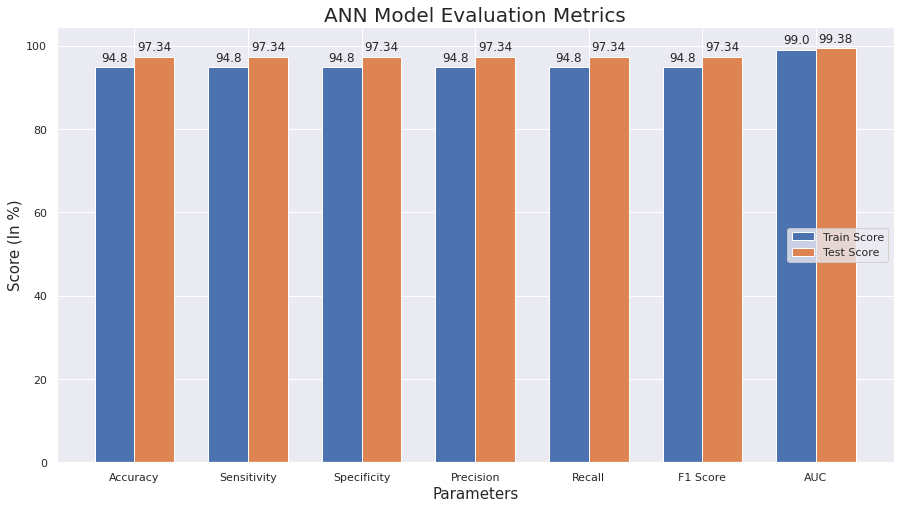

In [319]:
train_test_score_df = pd.DataFrame({'train': [train_ann_dict['accuracy'], train_ann_dict['recall'], train_ann_dict['specificity'], train_ann_dict['precision'], train_ann_dict['recall'], train_ann_dict['f1_score'], train_ann_dict['auc']], 
                                    'test': [test_ann_dict['accuracy'], test_ann_dict['Recall'], test_ann_dict['Specificity'], test_ann_dict['Precision'], test_ann_dict['Recall'], test_ann_dict['f1_score'], test_ann_dict['AUC']]},
                                   index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])

fig, ax = plt.subplots()
x = np.arange(len(train_test_score_df.index))
width = 0.35


ax.set_ylabel('Score (In %)', fontdict={'fontsize': 15})
ax.set_xlabel('Parameters', fontdict={'fontsize': 15})
ax.set_title('ANN Model Evaluation Metrics', fontdict={'fontsize': 20})
ax.set_xticks(x)
ax.set_xticklabels(train_test_score_df.index)

rects1 = ax.bar(x - width/2, train_test_score_df['train'], width, label='Train Score')
for rect in rects1:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

rects2 = ax.bar(x + width/2, train_test_score_df['test'], width, label='Test Score')
for rect in rects2:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

ax.legend(loc=5)
plt.show()

#### Conclusions for this model:

1. **Recall** is almost **97.34%**, which indicates that 2.66% of fraudulent transactions are deemed as Not Fraud. This value can be highly acceptable.

2. **Precision** is whopping **97.34%**, which indicates that the False Positive count (i.e., transactions which are valid but are considered as fraud) of the model is high. Due to this there will be no financial loss at all for the bank. But this behavior (of deeming non-fraudulent transactions as fraud) leads to very bad banking experience because majority of the transactions are blocked even though being valid ones. So, this value is not at all acceptable.

In [320]:
metrics_dict['random_oversample']['ann']['accuracy'] = test_ann_dict['accuracy']
metrics_dict['random_oversample']['ann']['sensitivity'] = test_ann_dict['Recall']
metrics_dict['random_oversample']['ann']['specificity'] = test_ann_dict['Specificity']
metrics_dict['random_oversample']['ann']['precision'] = test_ann_dict['Precision']
metrics_dict['random_oversample']['ann']['recall'] = test_ann_dict['Recall']
metrics_dict['random_oversample']['ann']['auc'] = test_ann_dict['AUC']
metrics_dict['random_oversample']['ann']['f1'] = test_ann_dict['f1_score']

In [321]:
metrics_dict['random_oversample']['ann']

{'accuracy': 97.34,
 'sensitivity': 97.34,
 'specificity': 97.34,
 'precision': 97.34,
 'recall': 97.34,
 'f1': 97.34,
 'auc': 99.38}

## 7.7. <a id = "header2_7_7">Reverting Input & Output Train Variables</a>

In [322]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=314, stratify=y)

In [323]:
y_train.value_counts()

0    218484
1       381
Name: Class, dtype: int64

In [324]:
y_test.value_counts()

0    54622
1       95
Name: Class, dtype: int64

# 8. <a id="header1_8">Synthetic Minority Oversampling Technique (SMOTE)</a>

In [325]:
y_train.value_counts()

0    218484
1       381
Name: Class, dtype: int64

In [326]:
smote_oversample = SMOTE(random_state=314)

In [327]:
X_train, y_train = smote_oversample.fit_resample(X_train, y_train)

In [328]:
y_train.value_counts()

1    218484
0    218484
Name: Class, dtype: int64

## 8.1. <a id = "header2_8_1">Logistic Regression</a>

In [329]:
logreg = LogisticRegression()
model = logreg.fit(X_train, y_train)
pred_probs_train = model.predict_proba(X_train)

In [330]:
y_train_pred_final = pd.DataFrame(y_train)
y_train_pred_final['class_probability'] = pred_probs_train[:,1]
# numbers = [float(x)/10 for x in range(10)]
numbers = np.arange(0.29, 0.31, 0.001)
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.class_probability.map(lambda x: 1 if x > i else 0)

In [331]:
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])
for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Class, y_train_pred_final[i])
    accuracy = (cm1[0, 0] + cm1[1, 1]) / sum(sum(cm1))
    speci = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])
    sensi = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1])
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]
cutoff_df

prob  accuracy     sensi     speci
0.290  0.290  0.962000  0.963466  0.960533
0.291  0.291  0.962016  0.963302  0.960729
0.292  0.292  0.962048  0.963196  0.960899
0.293  0.293  0.962084  0.963055  0.961114
0.294  0.294  0.962098  0.962844  0.961352
0.295  0.295  0.962100  0.962624  0.961576
0.296  0.296  0.962102  0.962423  0.961782
0.297  0.297  0.962075  0.962226  0.961924
0.298  0.298  0.962132  0.962084  0.962180
0.299  0.299  0.962139  0.961915  0.962363
0.300  0.300  0.962176  0.961741  0.962611
0.301  0.301  0.962215  0.961572  0.962858
0.302  0.302  0.962238  0.961407  0.963068
0.303  0.303  0.962270  0.961256  0.963283
0.304  0.304  0.962281  0.961146  0.963416
0.305  0.305  0.962290  0.960963  0.963617
0.306  0.306  0.962306  0.960826  0.963787
0.307  0.307  0.962334  0.960693  0.963974
0.308  0.308  0.962361  0.960546  0.964176
0.309  0.309  0.962340  0.960382  0.964299
0.310  0.310  0.962354  0.960185  0.964524

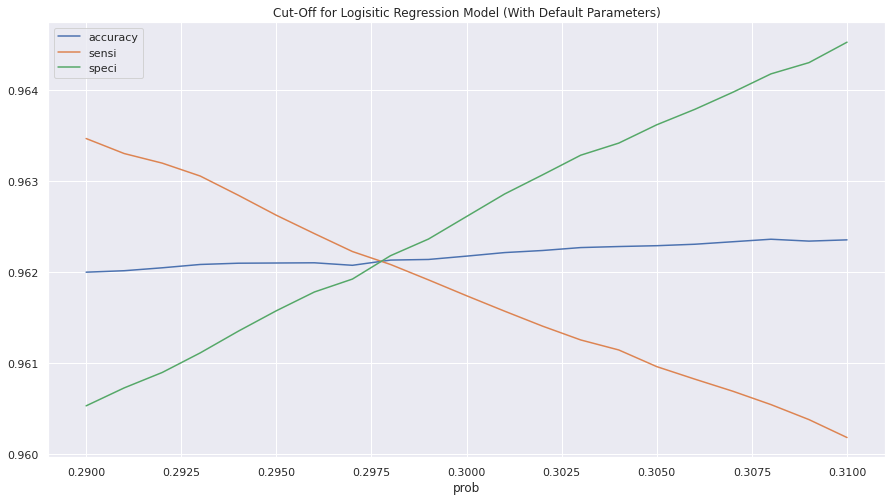

In [332]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.title('Cut-Off for Logisitic Regression Model (With Default Parameters)')
plt.show()

#### From the curve above, 0.298 seems to be the optimum point to take it as a cutoff probability.

In [333]:
cut_off = 0.298

In [334]:
conf_matrix = metrics.confusion_matrix(y_train_pred_final.Class, y_train_pred_final[cut_off])

TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

accuracy_score = metrics.accuracy_score(y_train_pred_final.Class, y_train_pred_final[cut_off])
accuracy_score = round(accuracy_score*100, 2)

precision_score = metrics.precision_score(y_train_pred_final.Class, y_train_pred_final[cut_off])
precision_score = round(precision_score*100, 2)

recall_score = metrics.recall_score(y_train_pred_final.Class, y_train_pred_final[cut_off])
recall_score = round(recall_score*100, 2)

sensitivity = TP / float(FN + TP)
sensitivity = round(sensitivity*100, 2)

specificity = TN / float(TN + FP)
specificity = round(specificity*100, 2)

f1_score = metrics.f1_score(y_train_pred_final.Class, y_train_pred_final[cut_off])
f1_score = round(f1_score*100, 2)

auc_score = metrics.roc_auc_score(y_train_pred_final.Class, y_train_pred_final.class_probability)
auc_score = round(auc_score*100, 2)

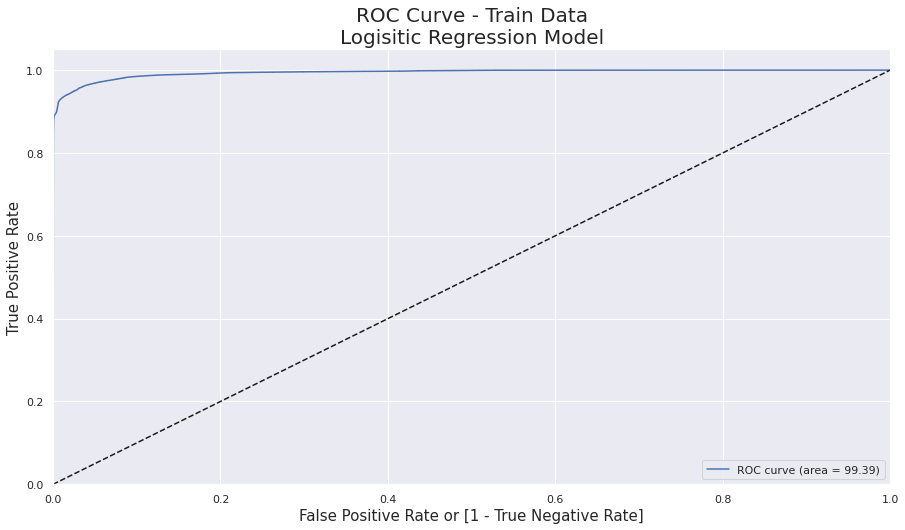

In [335]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Class, y_train_pred_final.class_probability, drop_intermediate=False )
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]', fontdict={'fontsize': 15})
plt.ylabel('True Positive Rate', fontdict={'fontsize': 15})
plt.title('ROC Curve - Train Data\nLogisitic Regression Model', fontdict={'fontsize': 20})
plt.legend(loc="lower right")
plt.show()

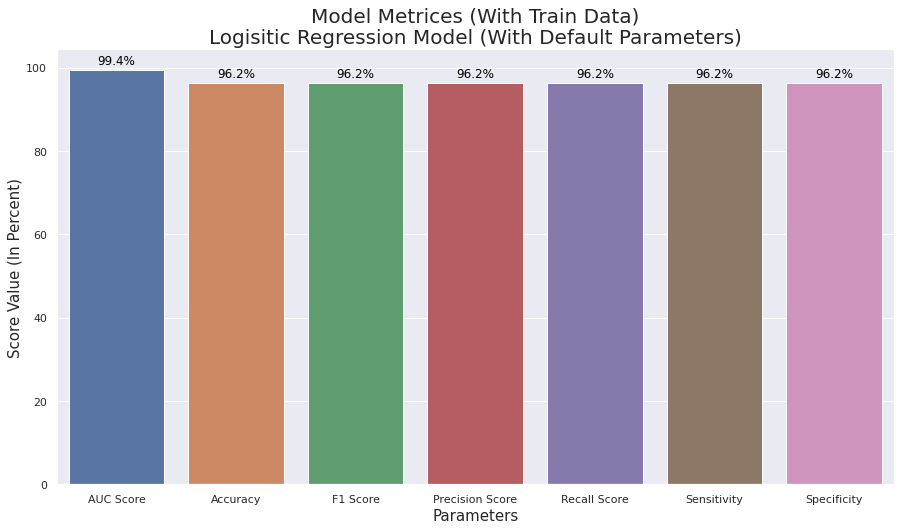

In [336]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision Score', 'Recall Score', 'F1 Score', 'AUC Score'],
                     'Value': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score]}, index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision Score', 'Recall Score', 'F1 Score', 'AUC Score'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('Model Metrices (With Train Data)\nLogisitic Regression Model (With Default Parameters)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

In [337]:
pred_probs_test = model.predict_proba(X_test)

In [338]:
metrics.roc_auc_score(y_test, pred_probs_test[:,1])

0.9775784386086963

In [339]:
y_test_pred_final = pd.DataFrame(y_test)
y_test_pred_final['class_probability'] = pred_probs_test[:,1]
y_test_pred_final['class_predicted'] = y_test_pred_final.class_probability.map(lambda x: 1 if x > cut_off else 0)
y_test_pred_final

Class  class_probability  class_predicted
93660       0           0.062353                0
184313      0           0.007186                0
849         0           0.027616                0
36763       0           0.089299                0
98883       0           0.137406                0
...       ...                ...              ...
164287      0           0.001881                0
105359      0           0.010668                0
177345      0           0.012798                0
113054      0           0.001949                0
273719      0           0.001528                0

[54717 rows x 3 columns]

In [340]:
conf_matrix_test = metrics.confusion_matrix(y_test_pred_final.Class, y_test_pred_final.class_predicted)

TN_test = conf_matrix[0, 0]
FP_test = conf_matrix[0, 1]
FN_test = conf_matrix[1, 0]
TP_test = conf_matrix[1, 1]

accuracy_score_test = metrics.accuracy_score(y_test_pred_final.Class, y_test_pred_final.class_predicted)
accuracy_score_test = round(accuracy_score_test*100, 2)

precision_score_test = metrics.precision_score(y_test_pred_final.Class, y_test_pred_final.class_predicted)
precision_score_test = round(precision_score_test*100, 2)

recall_score_test = metrics.recall_score(y_test_pred_final.Class, y_test_pred_final.class_predicted)
recall_score_test = round(recall_score_test*100, 2)

sensitivity_test = TP_test / float(FN_test + TP_test)
sensitivity_test = round(sensitivity_test*100, 2)

specificity_test = TN_test / float(TN_test + FP_test)
specificity_test = round(specificity_test*100, 2)

f1_score_test = metrics.f1_score(y_test_pred_final.Class, y_test_pred_final.class_predicted)
f1_score_test = round(f1_score_test*100, 2)

auc_score_test = metrics.roc_auc_score(y_test_pred_final.Class, y_test_pred_final.class_probability)
auc_score_test = round(auc_score_test*100, 2)

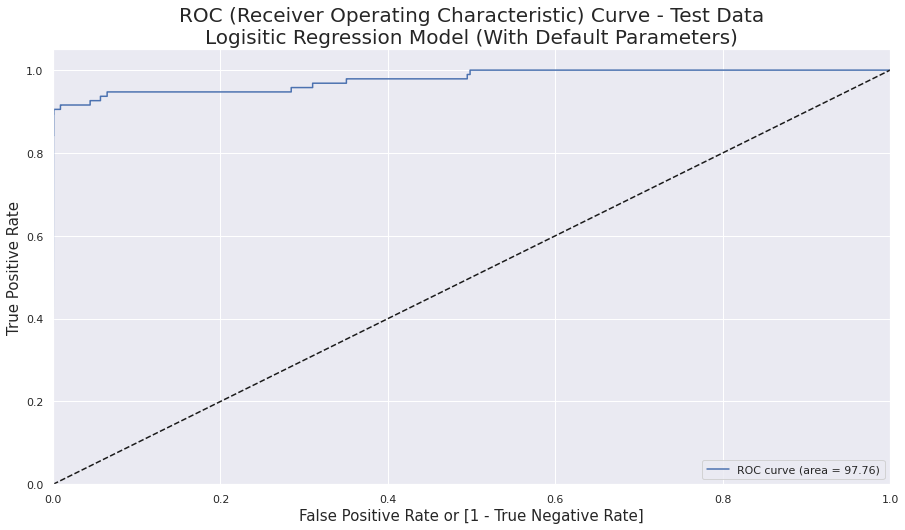

In [341]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_pred_final.Class, y_test_pred_final.class_probability, drop_intermediate=False )
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]', fontdict={'fontsize': 15})
plt.ylabel('True Positive Rate', fontdict={'fontsize': 15})
plt.title('ROC (Receiver Operating Characteristic) Curve - Test Data\nLogisitic Regression Model (With Default Parameters)', fontdict={'fontsize': 20})
plt.legend(loc="lower right")
plt.show()

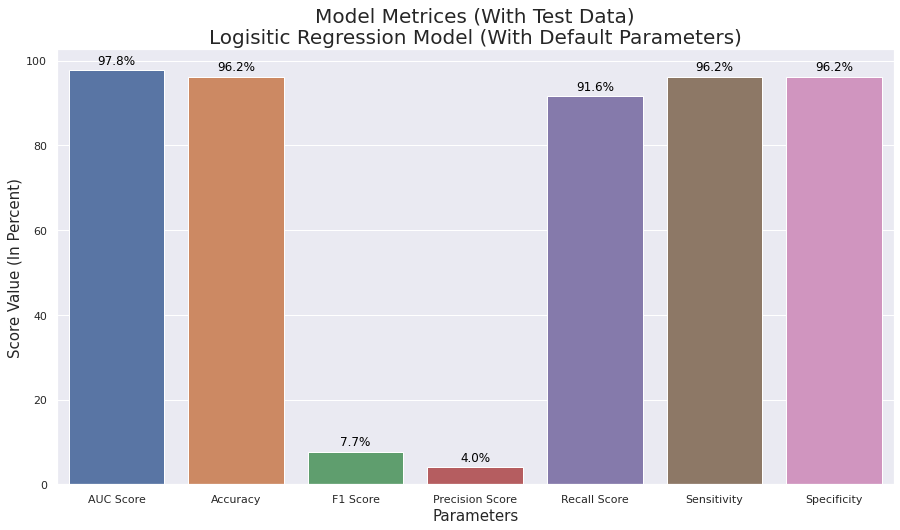

In [342]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision Score', 'Recall Score', 'F1 Score', 'AUC Score'],
                     'Value': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]}, index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision Score', 'Recall Score', 'F1 Score', 'AUC Score'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('Model Metrices (With Test Data)\nLogisitic Regression Model (With Default Parameters)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

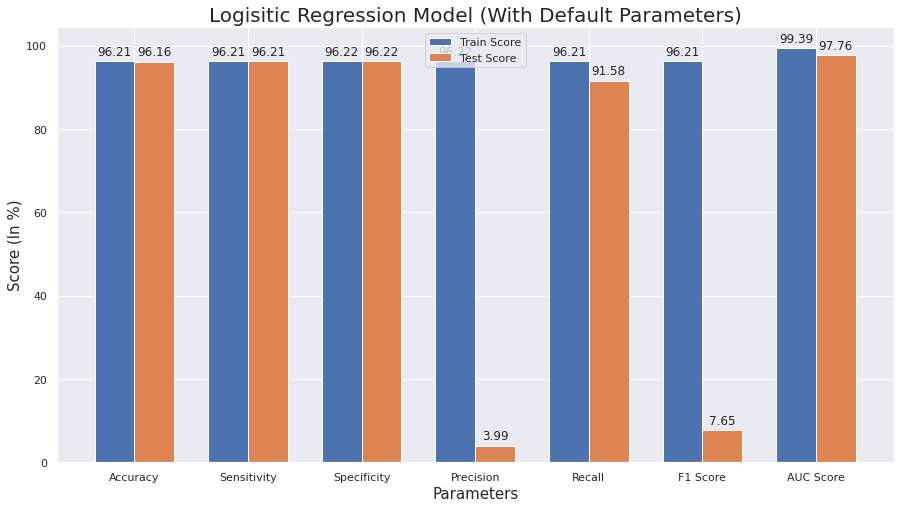

In [343]:
train_test_score_df = pd.DataFrame({'train': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score], 
                                    'test': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                                   index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC Score'])   

fig, ax = plt.subplots()
x = np.arange(len(train_test_score_df.index))
width = 0.35


ax.set_ylabel('Score (In %)', fontdict={'fontsize': 15})
ax.set_xlabel('Parameters', fontdict={'fontsize': 15})
ax.set_title('Logisitic Regression Model (With Default Parameters)', fontdict={'fontsize': 20})
ax.set_xticks(x)
ax.set_xticklabels(train_test_score_df.index)

rects1 = ax.bar(x - width/2, train_test_score_df['train'], width, label='Train Score')
for rect in rects1:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

rects2 = ax.bar(x + width/2, train_test_score_df['test'], width, label='Test Score')
for rect in rects2:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

ax.legend()
plt.show()

#### Conclusions for this model:

1. **Recall** is almost **92%**, which indicates that 8.4% of fraudulent transactions are deemed as Not Fraud. This value can be acceptable but, it will be even better if we could increase this value.

2. **Precision** is just **4%**, which indicates that the False Positive count (i.e., transactions which are valid but are considered as fraud) of the model is high. Due to this there will be no financial loss at all for the bank. But this behavior (of deeming non-fraudulent transactions as fraud) leads to very bad banking experience because majority of the transactions are blocked even though being valid ones. So, this value is not at all acceptable.

In [344]:
metrics_dict['smote']['logistics']['accuracy'] = accuracy_score_test
metrics_dict['smote']['logistics']['sensitivity'] = sensitivity_test
metrics_dict['smote']['logistics']['specificity'] = specificity_test
metrics_dict['smote']['logistics']['precision'] = precision_score_test
metrics_dict['smote']['logistics']['recall'] = recall_score_test
metrics_dict['smote']['logistics']['auc'] = auc_score_test
metrics_dict['smote']['logistics']['f1'] = f1_score_test

In [345]:
metrics_dict['smote']['logistics']

{'accuracy': 96.16,
 'sensitivity': 96.21,
 'specificity': 96.22,
 'precision': 3.99,
 'recall': 91.58,
 'f1': 7.65,
 'auc': 97.76}

## 8.2. <a id = "header2_8_2">Decision Trees</a>

In [346]:
dt_hyp_tuned = DecisionTreeClassifier(random_state=314)

In [347]:
params = {
    'max_depth': list(range(5, 15, 3)),
    'min_samples_leaf': list(range(50, 1001, 50)),
    'criterion': ["gini", "entropy"]
}

In [348]:
scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

In [349]:
dt_hyp_tuned = GridSearchCV(estimator=dt_hyp_tuned, param_grid=params, cv=4, n_jobs=-1, verbose=1, scoring=scorer)

In [350]:
dt_hyp_tuned.fit(X_train, y_train)

Fitting 4 folds for each of 160 candidates, totalling 640 fits
[15:41:23] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:43:57] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:48:44] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:56:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'.

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[15:41:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:43:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:48:42] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:56:37] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[15:41:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:46:12] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:52:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=314),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 8, 11, 14],
                         'min_samples_leaf': [50, 100, 150, 200, 250, 300, 350,
                                              400, 450, 500, 550, 600, 650, 700,
                                              750, 800, 850, 900, 950, 1000]},
             scoring=make_scorer(roc_auc_score, needs_proba=True), verbose=1)

In [351]:
score_df = pd.DataFrame(dt_hyp_tuned.cv_results_)
score_df.nlargest(5, "mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
141      15.351176      0.734919         0.033526        0.000803   
140      15.607068      0.724947         0.035059        0.001719   
120      15.309091      0.720195         0.034053        0.001495   
142      14.760646      0.448238         0.034599        0.001799   
40       17.674636      0.271387         0.037014        0.002432   

    param_criterion param_max_depth param_min_samples_leaf  \
141         entropy              14                    100   
140         entropy              14                     50   
120         entropy              11                     50   
142         entropy              14                    150   
40             gini              11                     50   

                                                params  split0_test_score  \
141  {'criterion': 'entropy', 'max_depth': 14, 'min...           0.999314   
140  {'criterion': 'entropy', 'max_depth': 14, 'min...           0.999297   
120  {'criterion': 'entropy', 'max_depth': 11, 'min...           0.999239   
142  {'criterion': 'entropy', 'max_depth': 14, 'min...           0.999207   
40   {'criterion': 'gini', 'max_depth': 11, 'min_sa...           0.999140   

     split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
141           0.999374           0.999325           0.999393         0.999352   
140           0.999379           0.999420           0.999287         0.999346   
120           0.999279           0.999331           0.999247         0.999274   
142           0.999264           0.999213           0.999282         0.999241   
40            0.999231           0.999151           0.999118         0.999160   

     std_test_score  rank_test_score  
141        0.000033                1  
140        0.000056                2  
120        0.000036                3  
142        0.000032                4  
40         0.000043                5

In [352]:
dt_best_est = dt_hyp_tuned.best_estimator_
dt_best_est

DecisionTreeClassifier(criterion='entropy', max_depth=14, min_samples_leaf=100,
                       random_state=314)

In [353]:
pred_probs_train = dt_best_est.predict(X_train)
pred_probs_train

array([0, 0, 0, ..., 1, 1, 1])

In [354]:
conf_matrix = metrics.confusion_matrix(y_train, pred_probs_train)

TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

accuracy_score = metrics.accuracy_score(y_train, pred_probs_train)
accuracy_score = round(accuracy_score*100, 2)

precision_score = metrics.precision_score(y_train, pred_probs_train)
precision_score = round(precision_score*100, 2)

recall_score = metrics.recall_score(y_train, pred_probs_train)
recall_score = round(recall_score*100, 2)

sensitivity = TP / float(FN + TP)
sensitivity = round(sensitivity*100, 2)

specificity = TN / float(TN + FP)
specificity = round(specificity*100, 2)

f1_score = metrics.f1_score(y_train, pred_probs_train)
f1_score = round(f1_score*100, 2)

auc_score = metrics.roc_auc_score(y_train, pred_probs_train)
auc_score = round(auc_score*100, 2)

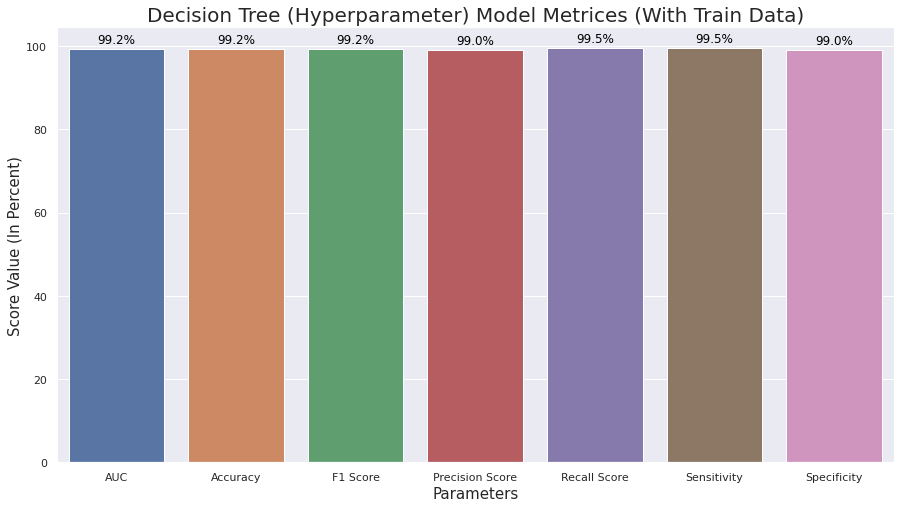

In [355]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision Score', 'Recall Score', 'F1 Score', 'AUC'],
                     'Value': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score]},
                    index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('Decision Tree (Hyperparameter) Model Metrices (With Train Data)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

### 6.2.4. Implementing best model on Test Data

In [356]:
pred_probs_test = dt_best_est.predict(X_test)
pred_probs_test

array([0, 0, 0, ..., 0, 0, 0])

In [357]:
conf_matrix_test = metrics.confusion_matrix(y_test, pred_probs_test)

TN_test = conf_matrix[0, 0]
FP_test = conf_matrix[0, 1]
FN_test = conf_matrix[1, 0]
TP_test = conf_matrix[1, 1]

accuracy_score_test = metrics.accuracy_score(y_test, pred_probs_test)
accuracy_score_test = round(accuracy_score_test*100, 2)

precision_score_test = metrics.precision_score(y_test, pred_probs_test)
precision_score_test = round(precision_score_test*100, 2)

recall_score_test = metrics.recall_score(y_test, pred_probs_test)
recall_score_test = round(recall_score_test*100, 2)

sensitivity_test = TP_test / float(FN_test + TP_test)
sensitivity_test = round(sensitivity_test*100, 2)

specificity_test = TN_test / float(TN_test + FP_test)
specificity_test = round(specificity_test*100, 2)

f1_score_test = metrics.f1_score(y_test, pred_probs_test)
f1_score_test = round(f1_score_test*100, 2)

auc_score_test = round(metrics.roc_auc_score(y_test, pred_probs_test)*100, 2)

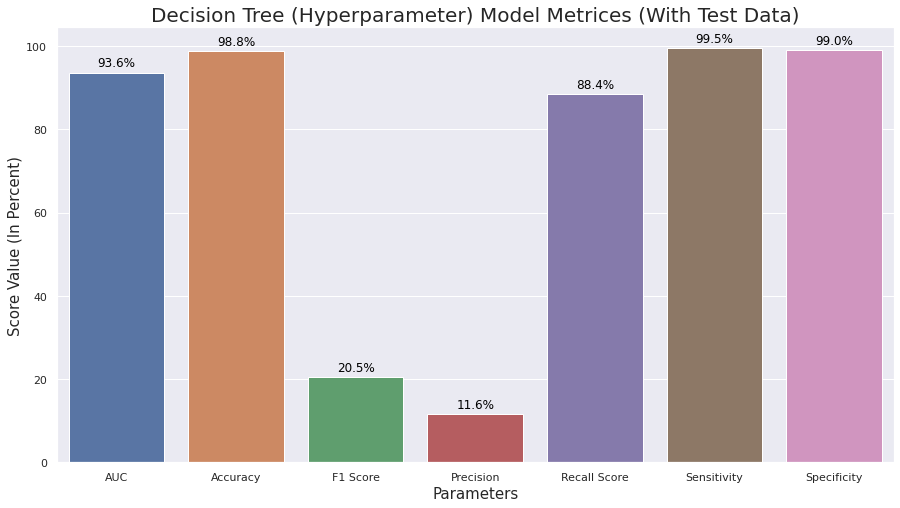

In [358]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall Score', 'F1 Score', 'AUC'],
                     'Value': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                    index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('Decision Tree (Hyperparameter) Model Metrices (With Test Data)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

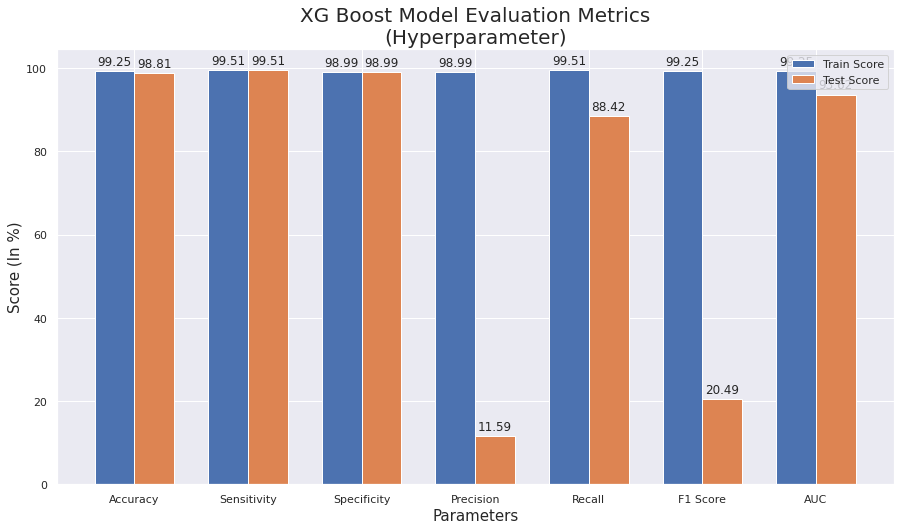

In [359]:
train_test_score_df = pd.DataFrame({'train': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score], 
                                    'test': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                                   index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   

fig, ax = plt.subplots()
x = np.arange(len(train_test_score_df.index))
width = 0.35


ax.set_ylabel('Score (In %)', fontdict={'fontsize': 15})
ax.set_xlabel('Parameters', fontdict={'fontsize': 15})
ax.set_title('XG Boost Model Evaluation Metrics\n(Hyperparameter)', fontdict={'fontsize': 20})
ax.set_xticks(x)
ax.set_xticklabels(train_test_score_df.index)

rects1 = ax.bar(x - width/2, train_test_score_df['train'], width, label='Train Score')
for rect in rects1:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

rects2 = ax.bar(x + width/2, train_test_score_df['test'], width, label='Test Score')
for rect in rects2:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

ax.legend()
plt.show()

#### Conclusions for this model:

1. **Recall** is almost **88.4%**, which indicates that 11.58% of fraudulent transactions are deemed as Not Fraud. This value can be acceptable but, it will be even better if we could increase this value.

2. **Precision** is just **12%**, which indicates that the False Positive count (i.e., transactions which are valid but are considered as fraud) of the model is high. Due to this there will be no financial loss at all for the bank. But this behavior (of deeming non-fraudulent transactions as fraud) leads to very bad banking experience because majority of the transactions are blocked even though being valid ones. So, this value is not at all acceptable.

In [360]:
metrics_dict['smote']['dt']['accuracy'] = accuracy_score_test
metrics_dict['smote']['dt']['sensitivity'] = sensitivity_test
metrics_dict['smote']['dt']['specificity'] = specificity_test
metrics_dict['smote']['dt']['precision'] = precision_score_test
metrics_dict['smote']['dt']['recall'] = recall_score_test
metrics_dict['smote']['dt']['auc'] = auc_score_test
metrics_dict['smote']['dt']['f1'] = f1_score_test

In [361]:
metrics_dict['smote']['dt']

{'accuracy': 98.81,
 'sensitivity': 99.51,
 'specificity': 98.99,
 'precision': 11.59,
 'recall': 88.42,
 'f1': 20.49,
 'auc': 93.62}

## 8.3. <a id = "header2_8_3">Random Forest</a>

In [362]:
rf_hyp_tuned = RandomForestClassifier(random_state=314, n_jobs=-1)

In [363]:
params = {
    'max_depth': list(range(3, 8)),
    'min_samples_leaf': list(range(50, 1001, 100)),
    'max_features': list(range(2, 5)),
    'n_estimators': list(range(10, 31, 10))
}

In [364]:
scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

In [365]:
rf_hyp_tuned_grid = GridSearchCV(estimator=rf_hyp_tuned, param_grid=params, 
                                 cv=4, n_jobs=-1, verbose=1, 
                                 scoring=scorer)

In [366]:
rf_hyp_tuned_grid.fit(X_train, y_train)

Fitting 4 folds for each of 450 candidates, totalling 1800 fits
[15:41:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:48:10] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:53:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:56:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[15:41:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:48:07] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:53:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:56:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[15:41:23] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:43:58] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:50:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:56:26] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[15:41:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:48:08] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:53:58] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:56:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[15:41:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:43:56] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:48:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:56:40] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[15:41:33] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:44:10] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:50:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:56:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[15:46:32] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:52] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:53:12] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:01:02] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[15:41:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:43:56] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:48:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:56:33] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[15:41:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:43:58] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:50:40] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:56:25] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[15:41:23] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:46:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:31] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:52:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[15:41:23] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:48:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:54:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:56:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[15:46:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:45] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:52:59] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:00:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[15:44:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:51:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:56:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:59:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=314),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [50, 150, 250, 350, 450, 550, 650,
                                              750, 850, 950],
                         'n_estimators': [10, 20, 30]},
             scoring=make_scorer(roc_auc_score, needs_proba=True), verbose=1)

In [367]:
score_df = pd.DataFrame(rf_hyp_tuned_grid.cv_results_)
score_df.nlargest(5,"mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
422      34.245663      0.107886         0.770581        0.060356   
421      33.072119      0.411736         1.019028        0.015938   
420      17.813518      0.136758         0.587559        0.034802   
425      34.421318      0.164067         0.737005        0.060744   
392      26.681293      0.053672         0.781480        0.040949   

    param_max_depth param_max_features param_min_samples_leaf  \
422               7                  4                     50   
421               7                  4                     50   
420               7                  4                     50   
425               7                  4                    150   
392               7                  3                     50   

    param_n_estimators                                             params  \
422                 30  {'max_depth': 7, 'max_features': 4, 'min_sampl...   
421                 20  {'max_depth': 7, 'max_features': 4, 'min_sampl...   
420                 10  {'max_depth': 7, 'max_features': 4, 'min_sampl...   
425                 30  {'max_depth': 7, 'max_features': 4, 'min_sampl...   
392                 30  {'max_depth': 7, 'max_features': 3, 'min_sampl...   

     split0_test_score  split1_test_score  split2_test_score  \
422           0.998226           0.998436           0.998374   
421           0.998178           0.998529           0.998227   
420           0.997684           0.998013           0.998210   
425           0.997747           0.998098           0.997807   
392           0.997678           0.997993           0.997796   

     split3_test_score  mean_test_score  std_test_score  rank_test_score  
422           0.998377         0.998353        0.000078                1  
421           0.998314         0.998312        0.000134                2  
420           0.997923         0.997957        0.000189                3  
425           0.998021         0.997919        0.000145                4  
392           0.998018         0.997871        0.000141                5

In [368]:
rf_best = rf_hyp_tuned_grid.best_estimator_
rf_best

RandomForestClassifier(max_depth=7, max_features=4, min_samples_leaf=50,
                       n_estimators=30, n_jobs=-1, random_state=314)

In [369]:
pred_probs_train = rf_best.predict(X_train)

In [370]:
conf_matrix = metrics.confusion_matrix(y_train, pred_probs_train)

TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

accuracy_score = metrics.accuracy_score(y_train, pred_probs_train)
accuracy_score = round(accuracy_score*100, 2)

precision_score = metrics.precision_score(y_train, pred_probs_train)
precision_score = round(precision_score*100, 2)

recall_score = metrics.recall_score(y_train, pred_probs_train)
recall_score = round(recall_score*100, 2)

sensitivity = TP / float(FN + TP)
sensitivity = round(sensitivity*100, 2)

specificity = TN / float(TN + FP)
specificity = round(specificity*100, 2)

f1_score = metrics.f1_score(y_train, pred_probs_train)
f1_score = round(f1_score*100, 2)

auc_score = round(metrics.roc_auc_score(y_train, pred_probs_train)*100, 2)

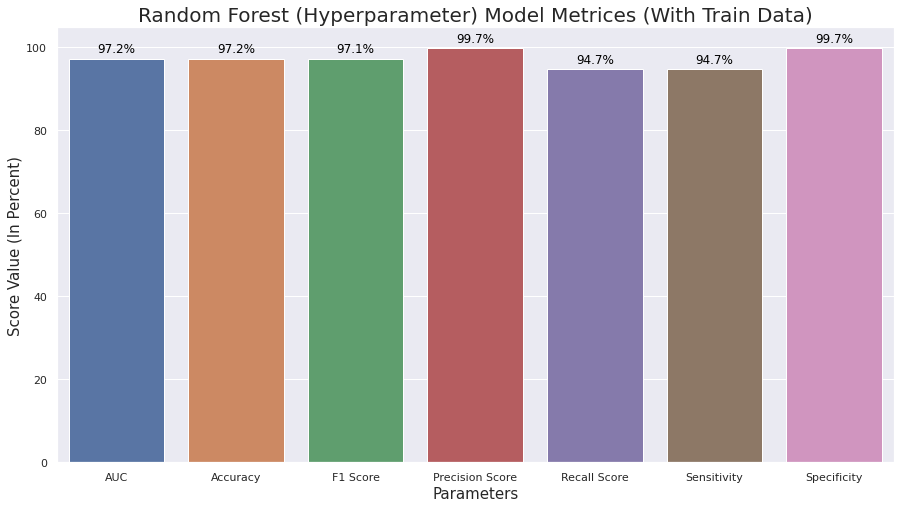

In [371]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision Score', 'Recall Score', 'F1 Score', 'AUC'],
                     'Value': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score]},
                    index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('Random Forest (Hyperparameter) Model Metrices (With Train Data)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

In [372]:
pred_probs_test = rf_best.predict(X_test)

In [373]:
conf_matrix_test = metrics.confusion_matrix(y_test, pred_probs_test)

TN_test = conf_matrix[0, 0]
FP_test = conf_matrix[0, 1]
FN_test = conf_matrix[1, 0]
TP_test = conf_matrix[1, 1]

accuracy_score_test = metrics.accuracy_score(y_test, pred_probs_test)
accuracy_score_test = round(accuracy_score_test*100, 2)

precision_score_test = metrics.precision_score(y_test, pred_probs_test)
precision_score_test = round(precision_score_test*100, 2)

recall_score_test = metrics.recall_score(y_test, pred_probs_test)
recall_score_test = round(recall_score_test*100, 2)

sensitivity_test = TP_test / float(FN_test + TP_test)
sensitivity_test = round(sensitivity_test*100, 2)

specificity_test = TN_test / float(TN_test + FP_test)
specificity_test = round(specificity_test*100, 2)

f1_score_test = metrics.f1_score(y_test, pred_probs_test)
f1_score_test = round(f1_score_test*100, 2)

auc_score_test = round(metrics.roc_auc_score(y_test, pred_probs_test)*100, 2)

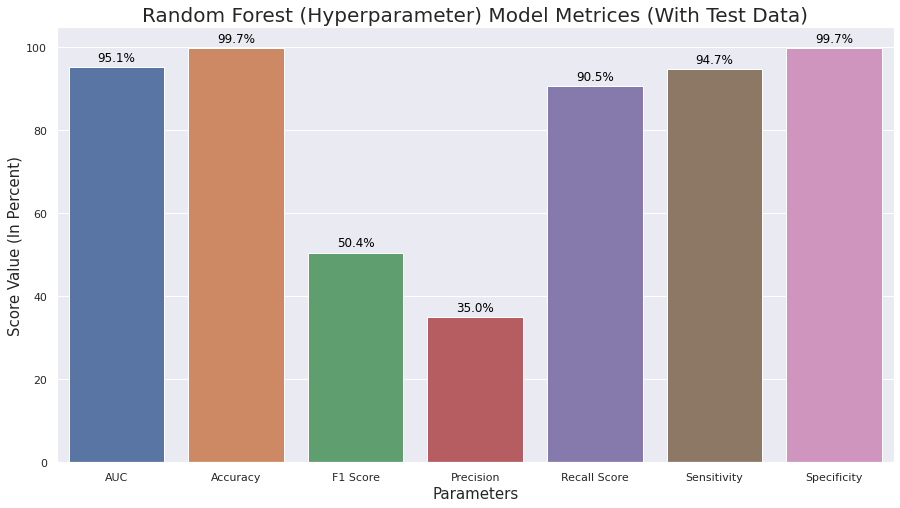

In [374]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall Score', 'F1 Score', 'AUC'],
                     'Value': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                    index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('Random Forest (Hyperparameter) Model Metrices (With Test Data)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

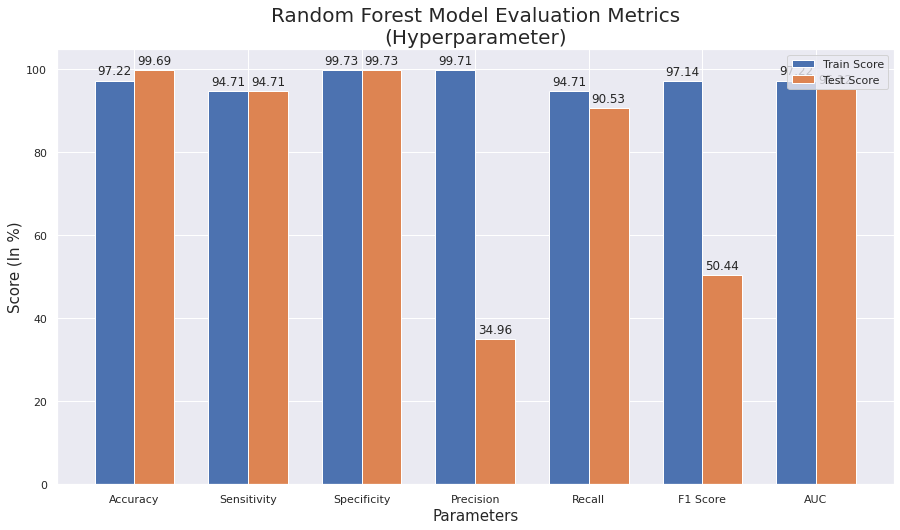

In [375]:
train_test_score_df = pd.DataFrame({'train': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score], 
                                    'test': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                                   index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   

fig, ax = plt.subplots()
x = np.arange(len(train_test_score_df.index))
width = 0.35


ax.set_ylabel('Score (In %)', fontdict={'fontsize': 15})
ax.set_xlabel('Parameters', fontdict={'fontsize': 15})
ax.set_title('Random Forest Model Evaluation Metrics\n(Hyperparameter)', fontdict={'fontsize': 20})
ax.set_xticks(x)
ax.set_xticklabels(train_test_score_df.index)

rects1 = ax.bar(x - width/2, train_test_score_df['train'], width, label='Train Score')
for rect in rects1:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

rects2 = ax.bar(x + width/2, train_test_score_df['test'], width, label='Test Score')
for rect in rects2:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

ax.legend()
plt.show()

#### Conclusions for this model:

1. **Recall** is almost **90%**, which indicates that 9.5% of fraudulent transactions are deemed as Not Fraud. This value is not acceptable at all. It will be better if we could increase this value.

2. **Precision** is **35%**, which indicates that the False Positive count (i.e., transactions which are valid but are considered as fraud) of the model is high. Due to this there will be no financial loss at all for the bank. But this behavior (of deeming non-fraudulent transactions as fraud) leads to very bad banking experience because majority of the transactions are blocked even though being valid ones. So, this value is not at all acceptable.

In [376]:
metrics_dict['smote']['rf']['accuracy'] = accuracy_score_test
metrics_dict['smote']['rf']['sensitivity'] = sensitivity_test
metrics_dict['smote']['rf']['specificity'] = specificity_test
metrics_dict['smote']['rf']['precision'] = precision_score_test
metrics_dict['smote']['rf']['recall'] = recall_score_test
metrics_dict['smote']['rf']['auc'] = auc_score_test
metrics_dict['smote']['rf']['f1'] = f1_score_test

In [377]:
metrics_dict['smote']['rf']

{'accuracy': 99.69,
 'sensitivity': 94.71,
 'specificity': 99.73,
 'precision': 34.96,
 'recall': 90.53,
 'f1': 50.44,
 'auc': 95.12}

## 8.4. <a id = "header2_8_4">Gradient Boosting</a>

In [378]:
gbm_hyp_tuned = GradientBoostingClassifier(random_state=314)

In [379]:
params = {
    'max_depth': list(range(3, 8)),
    'max_features': list(range(2, 5)),
    'n_estimators': list(range(10, 31, 10))
}

In [380]:
scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

In [381]:
gbm_hyp_tuned_grid = GridSearchCV(estimator=gbm_hyp_tuned,
                                  param_grid=params, cv=4, n_jobs=-1,
                                  verbose=1, scoring=scorer)

In [382]:
gbm_hyp_tuned_grid.fit(X_train, y_train)

Fitting 4 folds for each of 45 candidates, totalling 180 fits


GridSearchCV(cv=4, estimator=GradientBoostingClassifier(random_state=314),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': [2, 3, 4],
                         'n_estimators': [10, 20, 30]},
             scoring=make_scorer(roc_auc_score, needs_proba=True), verbose=1)

In [383]:
score_df = pd.DataFrame(gbm_hyp_tuned_grid.cv_results_)
score_df.nlargest(5, "mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
44      44.743608      0.154218         0.129301        0.003885   
41      38.863479      0.063752         0.143003        0.002455   
38      28.449999      0.076358         0.159747        0.000668   
43      32.619067      0.070129         0.101418        0.002230   
40      26.454738      0.142251         0.115678        0.001589   

   param_max_depth param_max_features param_n_estimators  \
44               7                  4                 30   
41               7                  3                 30   
38               7                  2                 30   
43               7                  4                 20   
40               7                  3                 20   

                                               params  split0_test_score  \
44  {'max_depth': 7, 'max_features': 4, 'n_estimat...           0.999715   
41  {'max_depth': 7, 'max_features': 3, 'n_estimat...           0.999678   
38  {'max_depth': 7, 'max_features': 2, 'n_estimat...           0.999477   
43  {'max_depth': 7, 'max_features': 4, 'n_estimat...           0.999422   
40  {'max_depth': 7, 'max_features': 3, 'n_estimat...           0.999373   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
44           0.999732           0.999580           0.999681         0.999677   
41           0.999674           0.999531           0.999695         0.999645   
38           0.999494           0.999325           0.999467         0.999441   
43           0.999489           0.999312           0.999343         0.999392   
40           0.999451           0.999250           0.999287         0.999340   

    std_test_score  rank_test_score  
44        0.000059                1  
41        0.000066                2  
38        0.000068                3  
43        0.000069                4  
40        0.000078                5

In [384]:
gb_best = gbm_hyp_tuned_grid.best_estimator_
gb_best

GradientBoostingClassifier(max_depth=7, max_features=4, n_estimators=30,
                           random_state=314)

In [385]:
pred_probs_train = gb_best.predict(X_train)

In [386]:
conf_matrix = metrics.confusion_matrix(y_train, pred_probs_train)

TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

accuracy_score = metrics.accuracy_score(y_train, pred_probs_train)
accuracy_score = round(accuracy_score*100, 2)

precision_score = metrics.precision_score(y_train, pred_probs_train)
precision_score = round(precision_score*100, 2)

recall_score = metrics.recall_score(y_train, pred_probs_train)
recall_score = round(recall_score*100, 2)

sensitivity = TP / float(FN + TP)
sensitivity = round(sensitivity*100, 2)

specificity = TN / float(TN + FP)
specificity = round(specificity*100, 2)

f1_score = metrics.f1_score(y_train, pred_probs_train)
f1_score = round(f1_score*100, 2)

auc_score = round(metrics.roc_auc_score(y_train, pred_probs_train)*100, 2)

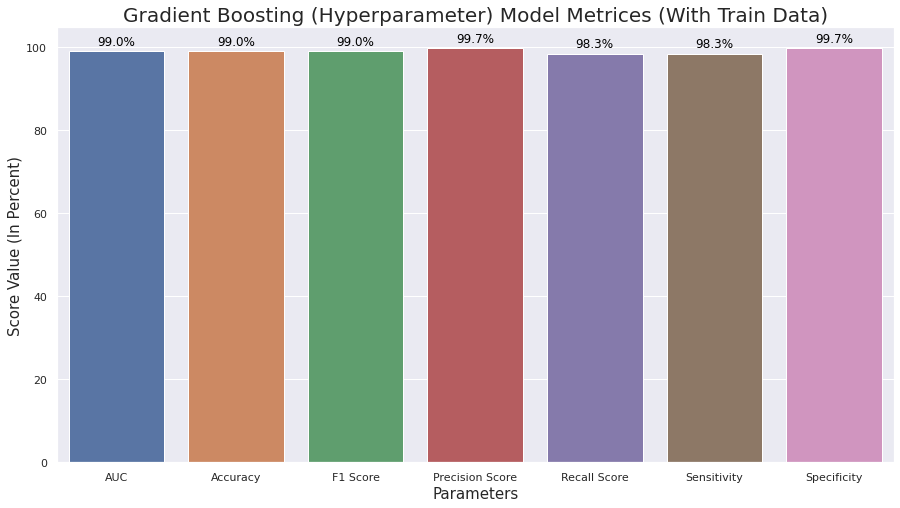

In [387]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision Score', 'Recall Score', 'F1 Score', 'AUC'],
                     'Value': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score]},
                    index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('Gradient Boosting (Hyperparameter) Model Metrices (With Train Data)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

In [388]:
pred_probs_test = gb_best.predict(X_test)

In [389]:
conf_matrix_test = metrics.confusion_matrix(y_test, pred_probs_test)

TN_test = conf_matrix[0, 0]
FP_test = conf_matrix[0, 1]
FN_test = conf_matrix[1, 0]
TP_test = conf_matrix[1, 1]

accuracy_score_test = metrics.accuracy_score(y_test, pred_probs_test)
accuracy_score_test = round(accuracy_score_test*100, 2)

precision_score_test = metrics.precision_score(y_test, pred_probs_test)
precision_score_test = round(precision_score_test*100, 2)

recall_score_test = metrics.recall_score(y_test, pred_probs_test)
recall_score_test = round(recall_score_test*100, 2)

sensitivity_test = TP_test / float(FN_test + TP_test)
sensitivity_test = round(sensitivity_test*100, 2)

specificity_test = TN_test / float(TN_test + FP_test)
specificity_test = round(specificity_test*100, 2)

f1_score_test = metrics.f1_score(y_test, pred_probs_test)
f1_score_test = round(f1_score_test*100, 2)

auc_score_test = round(metrics.roc_auc_score(y_test, pred_probs_test)*100, 2)

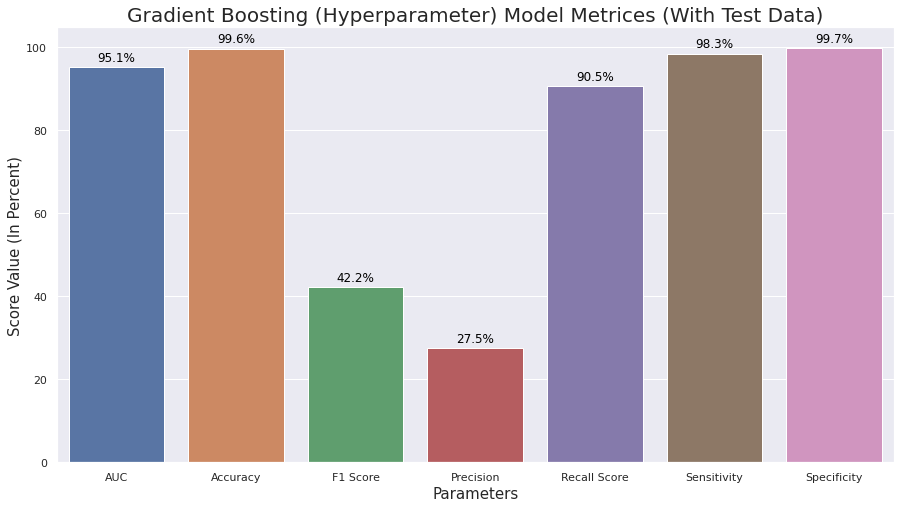

In [390]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall Score', 'F1 Score', 'AUC'],
                     'Value': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                    index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('Gradient Boosting (Hyperparameter) Model Metrices (With Test Data)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

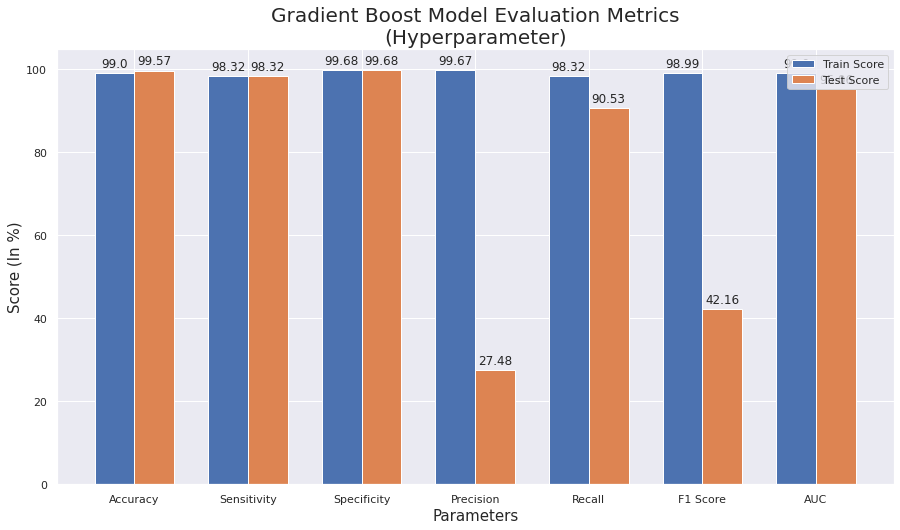

In [391]:
train_test_score_df = pd.DataFrame({'train': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score], 
                                    'test': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                                   index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   

fig, ax = plt.subplots()
x = np.arange(len(train_test_score_df.index))
width = 0.35


ax.set_ylabel('Score (In %)', fontdict={'fontsize': 15})
ax.set_xlabel('Parameters', fontdict={'fontsize': 15})
ax.set_title('Gradient Boost Model Evaluation Metrics\n(Hyperparameter)', fontdict={'fontsize': 20})
ax.set_xticks(x)
ax.set_xticklabels(train_test_score_df.index)

rects1 = ax.bar(x - width/2, train_test_score_df['train'], width, label='Train Score')
for rect in rects1:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

rects2 = ax.bar(x + width/2, train_test_score_df['test'], width, label='Test Score')
for rect in rects2:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

ax.legend()
plt.show()

#### Conclusions for this model:

1. **Recall** is almost **90.5%**, which indicates that 9.5% of fraudulent transactions are deemed as Not Fraud. This value can be acceptable but, it will be even better if we could increase this value.

2. **Precision** is just **27.5%**, which indicates that the False Positive count (i.e., transactions which are valid but are considered as fraud) of the model is high. Due to this there will be no financial loss at all for the bank. But this behavior (of deeming non-fraudulent transactions as fraud) leads to very bad banking experience because majority of the transactions are blocked even though being valid ones. So, this value is not at all acceptable.

In [392]:
metrics_dict['smote']['gb']['accuracy'] = accuracy_score_test
metrics_dict['smote']['gb']['sensitivity'] = sensitivity_test
metrics_dict['smote']['gb']['specificity'] = specificity_test
metrics_dict['smote']['gb']['precision'] = precision_score_test
metrics_dict['smote']['gb']['recall'] = recall_score_test
metrics_dict['smote']['gb']['auc'] = auc_score_test
metrics_dict['smote']['gb']['f1'] = f1_score_test

In [393]:
metrics_dict['smote']['gb']

{'accuracy': 99.57,
 'sensitivity': 98.32,
 'specificity': 99.68,
 'precision': 27.48,
 'recall': 90.53,
 'f1': 42.16,
 'auc': 95.06}

## 8.5. <a id = "header2_8_5">XG Boost</a>

In [394]:
xgreg = XGBClassifier(random_state=314, n_jobs = -1)

In [395]:
params = {'learning_rate': np.arange(0.25, 0.76, 0.25),
          'max_depth': list(range(5, 7)), 
          'min_child_weight': [15, 18], 
          'n_estimators': list(range(25, 76, 25))}

In [396]:
scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

In [397]:
xgboost_hyp_tuned = GridSearchCV(estimator=xgreg, param_grid=params, n_jobs=-1, 
                                 cv=4, scoring=scorer, refit=True, verbose=1)

In [398]:
xgboost_hyp_tuned.fit(X_train, y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits
[17:09:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:09:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:09:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:09:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:09:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:09:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:15:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:09:31] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:17:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:00:37] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     num_parallel_tree=None, random_state=314,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, val

In [399]:
score_df = pd.DataFrame(xgboost_hyp_tuned.cv_results_)
score_df.nlargest(5, "mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
26     402.791435      1.317070         0.771999        0.064569   
35     234.319306      3.505386         0.102366        0.043911   
34     259.175130      1.150633         0.281713        0.076806   
14     440.801933      2.413977         0.851141        0.059788   
25     295.097246      0.472500         0.751128        0.032674   

   param_learning_rate param_max_depth param_min_child_weight  \
26                0.75               5                     15   
35                0.75               6                     18   
34                0.75               6                     18   
14                 0.5               5                     15   
25                0.75               5                     15   

   param_n_estimators                                             params  \
26                 75  {'learning_rate': 0.75, 'max_depth': 5, 'min_c...   
35                 75  {'learning_rate': 0.75, 'max_depth': 6, 'min_c...   
34                 50  {'learning_rate': 0.75, 'max_depth': 6, 'min_c...   
14                 75  {'learning_rate': 0.5, 'max_depth': 5, 'min_ch...   
25                 50  {'learning_rate': 0.75, 'max_depth': 5, 'min_c...   

    split0_test_score  split1_test_score  split2_test_score  \
26           0.999995           0.999993           0.999992   
35           0.999992           0.999993           0.999990   
34           0.999989           0.999992           0.999986   
14           0.999996           0.999990           0.999983   
25           0.999993           0.999991           0.999985   

    split3_test_score  mean_test_score  std_test_score  rank_test_score  
26           0.999988         0.999992        0.000003                1  
35           0.999989         0.999991        0.000002                2  
34           0.999989         0.999989        0.000002                3  
14           0.999986         0.999989        0.000005                4  
25           0.999984         0.999989        0.000004                5

In [400]:
xgboost_best_est = xgboost_hyp_tuned.best_estimator_
xgboost_best_est

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.75, max_delta_step=0, max_depth=5,
              min_child_weight=15, missing=nan, monotone_constraints='()',
              n_estimators=75, n_jobs=-1, num_parallel_tree=1, random_state=314,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [401]:
pred_probs_train = xgboost_best_est.predict(X_train)
pred_probs_train

array([0, 0, 0, ..., 1, 1, 1])

In [402]:
conf_matrix = metrics.confusion_matrix(y_train, pred_probs_train)

TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

accuracy_score = metrics.accuracy_score(y_train, pred_probs_train)
accuracy_score = round(accuracy_score*100, 2)

precision_score = metrics.precision_score(y_train, pred_probs_train)
precision_score = round(precision_score*100, 2)

recall_score = metrics.recall_score(y_train, pred_probs_train)
recall_score = round(recall_score*100, 2)

sensitivity = TP / float(FN + TP)
sensitivity = round(sensitivity*100, 2)

specificity = TN / float(TN + FP)
specificity = round(specificity*100, 2)

f1_score = metrics.f1_score(y_train, pred_probs_train)
f1_score = round(f1_score*100, 2)

auc_score = round(metrics.roc_auc_score(y_train, pred_probs_train)*100, 2)

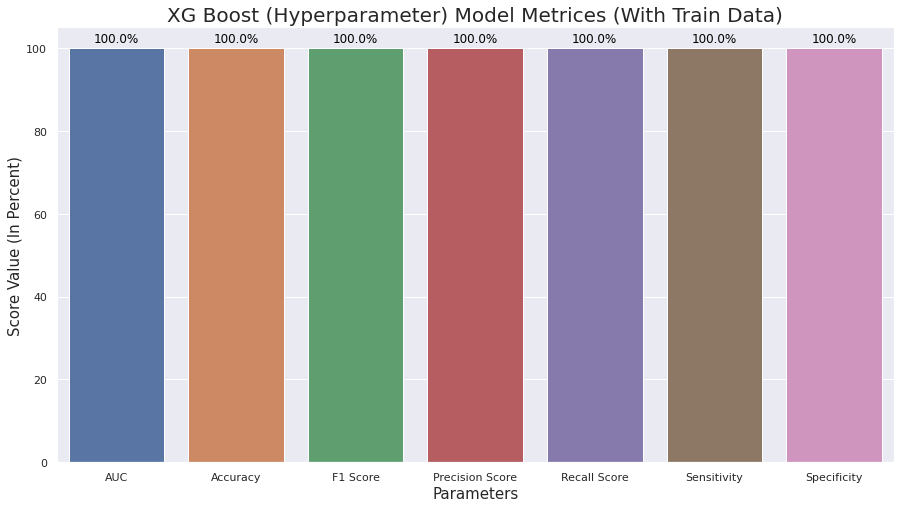

In [403]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision Score', 'Recall Score', 'F1 Score', 'AUC'],
                     'Value': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score]},
                    index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('XG Boost (Hyperparameter) Model Metrices (With Train Data)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

In [404]:
pred_probs_test = xgboost_best_est.predict(X_test)

In [405]:
conf_matrix_test = metrics.confusion_matrix(y_test, pred_probs_test)

TN_test = conf_matrix[0, 0]
FP_test = conf_matrix[0, 1]
FN_test = conf_matrix[1, 0]
TP_test = conf_matrix[1, 1]

accuracy_score_test = metrics.accuracy_score(y_test, pred_probs_test)
accuracy_score_test = round(accuracy_score_test*100, 2)

precision_score_test = metrics.precision_score(y_test, pred_probs_test)
precision_score_test = round(precision_score_test*100, 2)

recall_score_test = metrics.recall_score(y_test, pred_probs_test)
recall_score_test = round(recall_score_test*100, 2)

sensitivity_test = TP_test / float(FN_test + TP_test)
sensitivity_test = round(sensitivity_test*100, 2)

specificity_test = TN_test / float(TN_test + FP_test)
specificity_test = round(specificity_test*100, 2)

f1_score_test = metrics.f1_score(y_test, pred_probs_test)
f1_score_test = round(f1_score_test*100, 2)

auc_score_test = round(metrics.roc_auc_score(y_test, pred_probs_test)*100, 2)

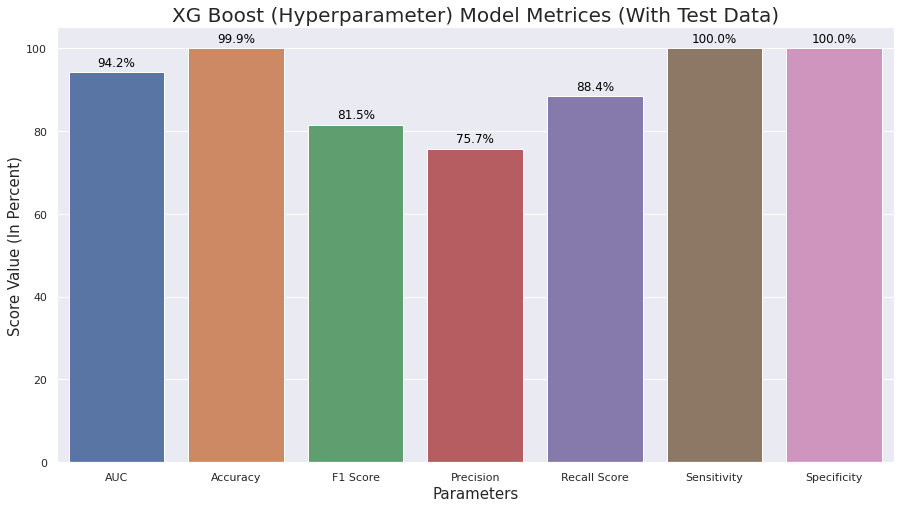

In [406]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall Score', 'F1 Score', 'AUC'],
                     'Value': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                    index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('XG Boost (Hyperparameter) Model Metrices (With Test Data)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

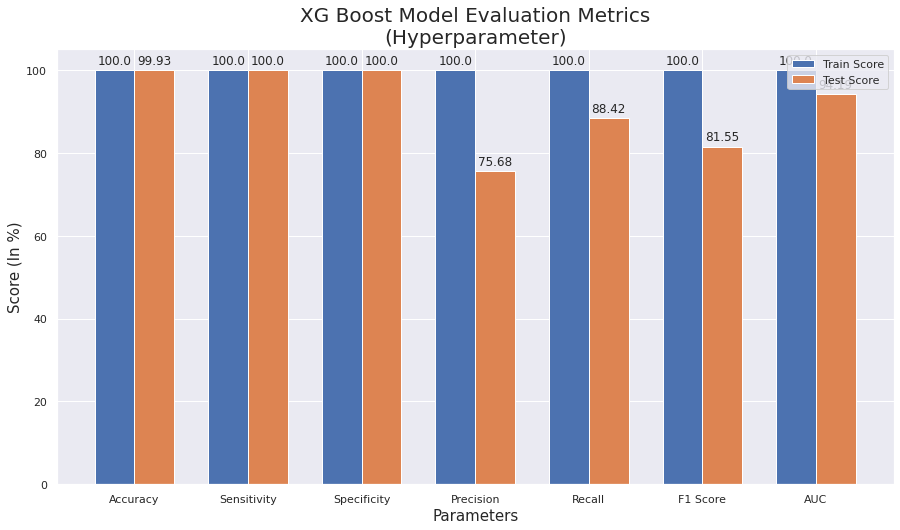

In [407]:
train_test_score_df = pd.DataFrame({'train': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score], 
                                    'test': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                                   index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   

fig, ax = plt.subplots()
x = np.arange(len(train_test_score_df.index))
width = 0.35


ax.set_ylabel('Score (In %)', fontdict={'fontsize': 15})
ax.set_xlabel('Parameters', fontdict={'fontsize': 15})
ax.set_title('XG Boost Model Evaluation Metrics\n(Hyperparameter)', fontdict={'fontsize': 20})
ax.set_xticks(x)
ax.set_xticklabels(train_test_score_df.index)

rects1 = ax.bar(x - width/2, train_test_score_df['train'], width, label='Train Score')
for rect in rects1:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

rects2 = ax.bar(x + width/2, train_test_score_df['test'], width, label='Test Score')
for rect in rects2:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

ax.legend()
plt.show()

#### Conclusions for this model:

1. **Recall** is almost **88.42%**, which indicates that 11.58% of fraudulent transactions are deemed as Not Fraud. This value is not acceptable at all. It will be better if we could increase this value.

2. **Precision** is **76%**, which indicates that the False Positive count (i.e., transactions which are valid but are considered as fraud) of the model is high. Due to this there will be no financial loss at all for the bank. But this behavior (of deeming non-fraudulent transactions as fraud) leads to very bad banking experience because majority of the transactions are blocked even though being valid ones. So, this value is not at all acceptable.

In [408]:
metrics_dict['smote']['xgb']['accuracy'] = accuracy_score_test
metrics_dict['smote']['xgb']['sensitivity'] = sensitivity_test
metrics_dict['smote']['xgb']['specificity'] = specificity_test
metrics_dict['smote']['xgb']['precision'] = precision_score_test
metrics_dict['smote']['xgb']['recall'] = recall_score_test
metrics_dict['smote']['xgb']['auc'] = auc_score_test
metrics_dict['smote']['xgb']['f1'] = f1_score_test

In [409]:
metrics_dict['smote']['xgb']

{'accuracy': 99.93,
 'sensitivity': 100.0,
 'specificity': 100.0,
 'precision': 75.68,
 'recall': 88.42,
 'f1': 81.55,
 'auc': 94.19}

## 8.6. <a id = "header2_8_6">Artificial Neural Net (ANN)</a>

In [410]:
train_label_encoder = LabelEncoder().fit(y_train)
y_train_ann = train_label_encoder.transform(y_train)
y_train_ann = to_categorical(y_train_ann)

In [411]:
test_label_encoder = LabelEncoder().fit(y_test)
y_test_ann = test_label_encoder.transform(y_test)
y_test_ann = to_categorical(y_test_ann)

In [412]:
model = Sequential()

In [413]:
model.add(Dense(10, input_dim=29, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [414]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                300       
_________________________________________________________________
dense_7 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 42        
Total params: 562
Trainable params: 562
Non-trainable params: 0
_________________________________________________________________


In [415]:
metrics_list = ['accuracy', 'FalsePositives', 'TrueNegatives', 'AUC', 'Precision', 'Recall']

In [416]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=metrics_list)

In [417]:
train_data_model_history = model.fit(X_train, y_train_ann, epochs=10, batch_size=14591)

Epoch 1/10
30/30 [==============================] - 1s 7ms/step - loss: 3.2376 - accuracy: 0.4735 - false_positives: 230054.0000 - true_negatives: 206914.0000 - auc: 0.4730 - precision: 0.4735 - recall: 0.4735
Epoch 2/10
30/30 [==============================] - 0s 7ms/step - loss: 0.6722 - accuracy: 0.6609 - false_positives: 148174.0000 - true_negatives: 288794.0000 - auc: 0.7466 - precision: 0.6609 - recall: 0.6609
Epoch 3/10
30/30 [==============================] - 0s 7ms/step - loss: 0.4926 - accuracy: 0.7251 - false_positives: 120130.0000 - true_negatives: 316838.0000 - auc: 0.8251 - precision: 0.7251 - recall: 0.7251
Epoch 4/10
30/30 [==============================] - 0s 8ms/step - loss: 0.4082 - accuracy: 0.7889 - false_positives: 92256.0000 - true_negatives: 344712.0000 - auc: 0.8843 - precision: 0.7889 - recall: 0.7889
Epoch 5/10
30/30 [==============================] - 0s 7ms/step - loss: 0.3393 - accuracy: 0.8492 - false_positives: 65897.0000 - true_negatives: 371071.0000 - a

In [418]:
train_history = train_data_model_history.history
train_ann_dict = {str(key): round(value[-1]*100, 2) for key, value in train_history.items()}
train_ann_dict['specificity'] = round(train_ann_dict['true_negatives'] / (train_ann_dict['true_negatives'] + train_ann_dict['false_positives'])*100, 2)
train_ann_dict['f1_score'] = 2*((train_ann_dict['precision']*train_ann_dict['recall']) / (train_ann_dict['precision']+train_ann_dict['recall']))
train_ann_dict

{'loss': 13.66,
 'accuracy': 94.97,
 'false_positives': 2197600.0,
 'true_negatives': 41499200.0,
 'auc': 99.15,
 'precision': 94.97,
 'recall': 94.97,
 'specificity': 94.97,
 'f1_score': 94.97}

In [419]:
test_data_model_history = model.evaluate(X_test, y_test_ann)

1710/1710 [==============================] - 3s 2ms/step - loss: 0.1293 - accuracy: 0.9811 - false_positives: 1035.0000 - true_negatives: 53682.0000 - auc: 0.9964 - precision: 0.9811 - recall: 0.9811


In [420]:
test_metrics_list = ['Loss'] + metrics_list
test_ann_dict = {test_metrics_list[index]: round(test_data_model_history[index]*100, 2) for index in range(len(test_data_model_history))}
test_ann_dict['Specificity'] = round(test_ann_dict['TrueNegatives'] / (test_ann_dict['TrueNegatives'] + test_ann_dict['FalsePositives'])*100, 2)
test_ann_dict['f1_score'] = 2*((test_ann_dict['Precision']*test_ann_dict['Recall']) / (test_ann_dict['Precision']+test_ann_dict['Recall']))
test_ann_dict

{'Loss': 12.93,
 'accuracy': 98.11,
 'FalsePositives': 103500.0,
 'TrueNegatives': 5368200.0,
 'AUC': 99.64,
 'Precision': 98.11,
 'Recall': 98.11,
 'Specificity': 98.11,
 'f1_score': 98.11}

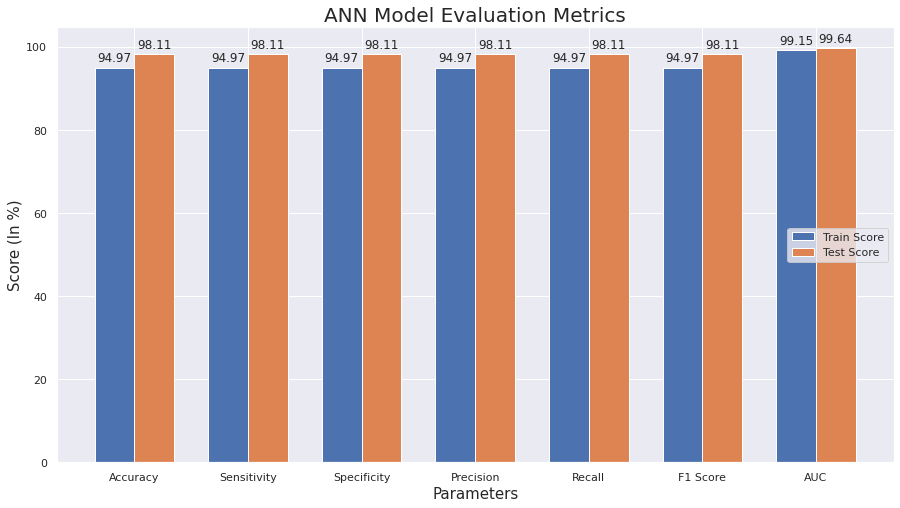

In [421]:
train_test_score_df = pd.DataFrame({'train': [train_ann_dict['accuracy'], train_ann_dict['recall'], train_ann_dict['specificity'], train_ann_dict['precision'], train_ann_dict['recall'], train_ann_dict['f1_score'], train_ann_dict['auc']], 
                                    'test': [test_ann_dict['accuracy'], test_ann_dict['Recall'], test_ann_dict['Specificity'], test_ann_dict['Precision'], test_ann_dict['Recall'], test_ann_dict['f1_score'], test_ann_dict['AUC']]},
                                   index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])

fig, ax = plt.subplots()
x = np.arange(len(train_test_score_df.index))
width = 0.35


ax.set_ylabel('Score (In %)', fontdict={'fontsize': 15})
ax.set_xlabel('Parameters', fontdict={'fontsize': 15})
ax.set_title('ANN Model Evaluation Metrics', fontdict={'fontsize': 20})
ax.set_xticks(x)
ax.set_xticklabels(train_test_score_df.index)

rects1 = ax.bar(x - width/2, train_test_score_df['train'], width, label='Train Score')
for rect in rects1:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

rects2 = ax.bar(x + width/2, train_test_score_df['test'], width, label='Test Score')
for rect in rects2:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

ax.legend(loc=5)
plt.show()

#### Conclusions for this model:

1. **Recall** is almost **98.11%**, which indicates that 1.89% of fraudulent transactions are deemed as Not Fraud. This value can be highly acceptable.

2. **Precision** is whopping **98.11%**, which indicates that the False Positive count (i.e., transactions which are valid but are considered as fraud) of the model is high. Due to this there will be no financial loss at all for the bank. But this behavior (of deeming non-fraudulent transactions as fraud) leads to very bad banking experience because majority of the transactions are blocked even though being valid ones. So, this value is not at all acceptable.

In [422]:
metrics_dict['smote']['ann']['accuracy'] = test_ann_dict['accuracy']
metrics_dict['smote']['ann']['sensitivity'] = test_ann_dict['Recall']
metrics_dict['smote']['ann']['specificity'] = test_ann_dict['Specificity']
metrics_dict['smote']['ann']['precision'] = test_ann_dict['Precision']
metrics_dict['smote']['ann']['recall'] = test_ann_dict['Recall']
metrics_dict['smote']['ann']['auc'] = test_ann_dict['AUC']
metrics_dict['smote']['ann']['f1'] = test_ann_dict['f1_score']

In [423]:
metrics_dict['smote']['ann']

{'accuracy': 98.11,
 'sensitivity': 98.11,
 'specificity': 98.11,
 'precision': 98.11,
 'recall': 98.11,
 'f1': 98.11,
 'auc': 99.64}

## 8.7. <a id = "header2_8_7">Reverting Input & Output Train Variables</a>

In [424]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=314, stratify=y)

In [425]:
y_train.value_counts()

0    218484
1       381
Name: Class, dtype: int64

In [426]:
y_test.value_counts()

0    54622
1       95
Name: Class, dtype: int64

# 9. <a id="header1_9">Adaptive Synthetic (ADASYNC)</a>

In [427]:
y_train.value_counts()

0    218484
1       381
Name: Class, dtype: int64

In [428]:
adasyn_oversample = ADASYN(random_state=314)

In [429]:
X_train, y_train = adasyn_oversample.fit_resample(X_train, y_train)

In [430]:
y_train.value_counts()

1    218529
0    218484
Name: Class, dtype: int64

## 9.1. <a id = "header2_9_1">Logistic Regression</a>

In [431]:
logreg = LogisticRegression()
model = logreg.fit(X_train, y_train)
pred_probs_train = model.predict_proba(X_train)

In [432]:
y_train_pred_final = pd.DataFrame(y_train)
y_train_pred_final['class_probability'] = pred_probs_train[:,1]
# numbers = [float(x)/10 for x in range(10)]
numbers = np.arange(0.40, 0.42, 0.001)
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.class_probability.map(lambda x: 1 if x > i else 0)

In [433]:
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])
for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Class, y_train_pred_final[i])
    accuracy = (cm1[0, 0] + cm1[1, 1]) / sum(sum(cm1))
    speci = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])
    sensi = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1])
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]
cutoff_df

prob  accuracy     sensi     speci
0.400  0.400  0.936814  0.937862  0.935766
0.401  0.401  0.936833  0.937619  0.936046
0.402  0.402  0.936823  0.937390  0.936256
0.403  0.403  0.936837  0.937162  0.936513
0.404  0.404  0.936752  0.936841  0.936664
0.405  0.405  0.936736  0.936562  0.936911
0.406  0.406  0.936691  0.936242  0.937140
0.407  0.407  0.936665  0.935976  0.937355
0.408  0.408  0.936615  0.935697  0.937533
0.409  0.409  0.936592  0.935423  0.937762
0.410  0.410  0.936535  0.935093  0.937977
0.411  0.411  0.936565  0.934924  0.938206
0.412  0.412  0.936540  0.934659  0.938421
0.413  0.413  0.936453  0.934347  0.938558
0.414  0.414  0.936412  0.934068  0.938755
0.415  0.415  0.936375  0.933844  0.938906
0.416  0.416  0.936329  0.933569  0.939089
0.417  0.417  0.936293  0.933354  0.939231
0.418  0.418  0.936233  0.933071  0.939396
0.419  0.419  0.936171  0.932814  0.939529

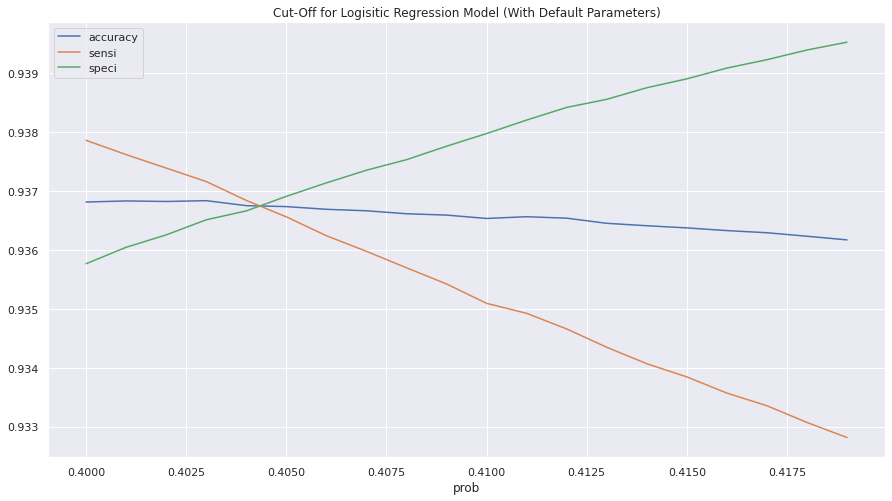

In [434]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.title('Cut-Off for Logisitic Regression Model (With Default Parameters)')
plt.show()

#### From the curve above, 0.404 seems to be the optimum point to take it as a cutoff probability.

In [435]:
cut_off = 0.404

In [436]:
conf_matrix = metrics.confusion_matrix(y_train_pred_final.Class, y_train_pred_final[cut_off])

TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

accuracy_score = metrics.accuracy_score(y_train_pred_final.Class, y_train_pred_final[cut_off])
accuracy_score = round(accuracy_score*100, 2)

precision_score = metrics.precision_score(y_train_pred_final.Class, y_train_pred_final[cut_off])
precision_score = round(precision_score*100, 2)

recall_score = metrics.recall_score(y_train_pred_final.Class, y_train_pred_final[cut_off])
recall_score = round(recall_score*100, 2)

sensitivity = TP / float(FN + TP)
sensitivity = round(sensitivity*100, 2)

specificity = TN / float(TN + FP)
specificity = round(specificity*100, 2)

f1_score = metrics.f1_score(y_train_pred_final.Class, y_train_pred_final[cut_off])
f1_score = round(f1_score*100, 2)

auc_score = metrics.roc_auc_score(y_train_pred_final.Class, y_train_pred_final.class_probability)
auc_score = round(auc_score*100, 2)

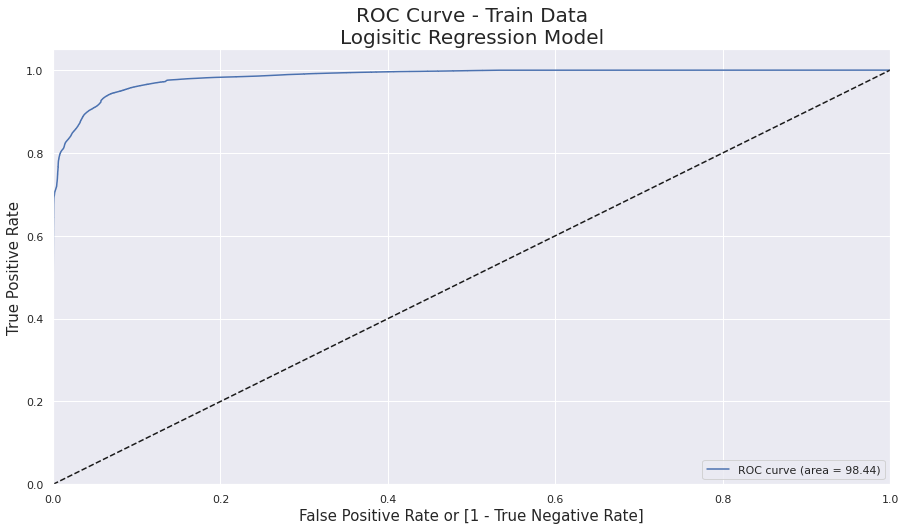

In [437]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Class, y_train_pred_final.class_probability, drop_intermediate=False )
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]', fontdict={'fontsize': 15})
plt.ylabel('True Positive Rate', fontdict={'fontsize': 15})
plt.title('ROC Curve - Train Data\nLogisitic Regression Model', fontdict={'fontsize': 20})
plt.legend(loc="lower right")
plt.show()

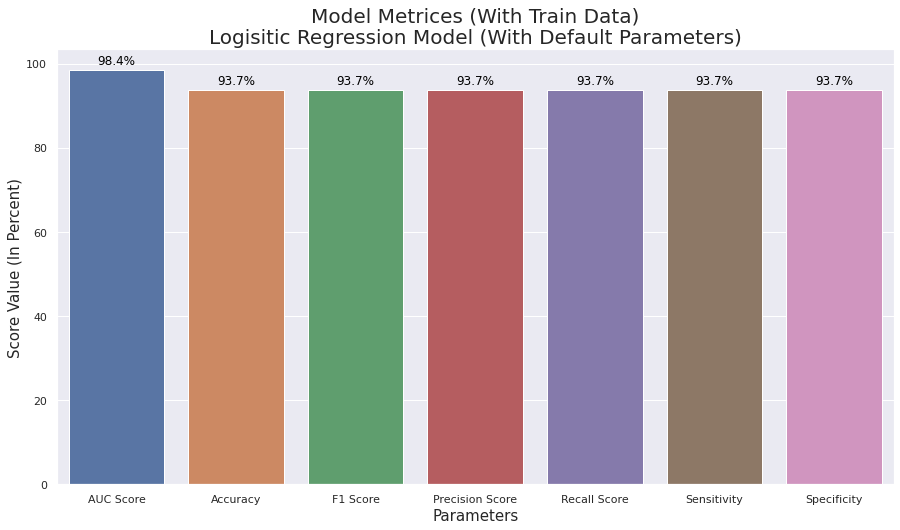

In [438]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision Score', 'Recall Score', 'F1 Score', 'AUC Score'],
                     'Value': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score]}, index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision Score', 'Recall Score', 'F1 Score', 'AUC Score'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('Model Metrices (With Train Data)\nLogisitic Regression Model (With Default Parameters)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

In [439]:
pred_probs_test = model.predict_proba(X_test)

In [440]:
metrics.roc_auc_score(y_test, pred_probs_test[:,1])

0.97432700145883

In [441]:
y_test_pred_final = pd.DataFrame(y_test)
y_test_pred_final['class_probability'] = pred_probs_test[:,1]
y_test_pred_final['class_predicted'] = y_test_pred_final.class_probability.map(lambda x: 1 if x > cut_off else 0)
y_test_pred_final

Class  class_probability  class_predicted
93660       0           0.148907                0
184313      0           0.021891                0
849         0           0.058926                0
36763       0           0.142651                0
98883       0           0.347269                0
...       ...                ...              ...
164287      0           0.002191                0
105359      0           0.020084                0
177345      0           0.019540                0
113054      0           0.002032                0
273719      0           0.001276                0

[54717 rows x 3 columns]

In [442]:
conf_matrix_test = metrics.confusion_matrix(y_test_pred_final.Class, y_test_pred_final.class_predicted)

TN_test = conf_matrix[0, 0]
FP_test = conf_matrix[0, 1]
FN_test = conf_matrix[1, 0]
TP_test = conf_matrix[1, 1]

accuracy_score_test = metrics.accuracy_score(y_test_pred_final.Class, y_test_pred_final.class_predicted)
accuracy_score_test = round(accuracy_score_test*100, 2)

precision_score_test = metrics.precision_score(y_test_pred_final.Class, y_test_pred_final.class_predicted)
precision_score_test = round(precision_score_test*100, 2)

recall_score_test = metrics.recall_score(y_test_pred_final.Class, y_test_pred_final.class_predicted)
recall_score_test = round(recall_score_test*100, 2)

sensitivity_test = TP_test / float(FN_test + TP_test)
sensitivity_test = round(sensitivity_test*100, 2)

specificity_test = TN_test / float(TN_test + FP_test)
specificity_test = round(specificity_test*100, 2)

f1_score_test = metrics.f1_score(y_test_pred_final.Class, y_test_pred_final.class_predicted)
f1_score_test = round(f1_score_test*100, 2)

auc_score_test = metrics.roc_auc_score(y_test_pred_final.Class, y_test_pred_final.class_probability)
auc_score_test = round(auc_score_test*100, 2)

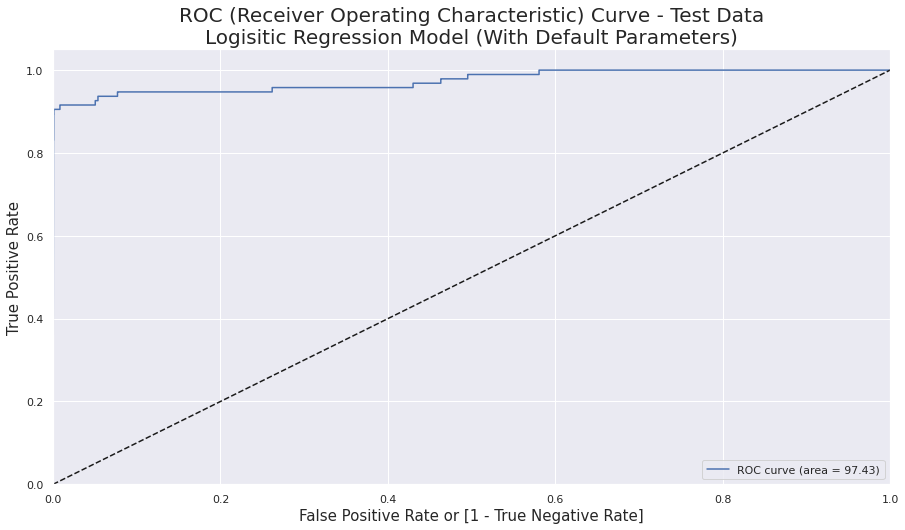

In [443]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_pred_final.Class, y_test_pred_final.class_probability, drop_intermediate=False )
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]', fontdict={'fontsize': 15})
plt.ylabel('True Positive Rate', fontdict={'fontsize': 15})
plt.title('ROC (Receiver Operating Characteristic) Curve - Test Data\nLogisitic Regression Model (With Default Parameters)', fontdict={'fontsize': 20})
plt.legend(loc="lower right")
plt.show()

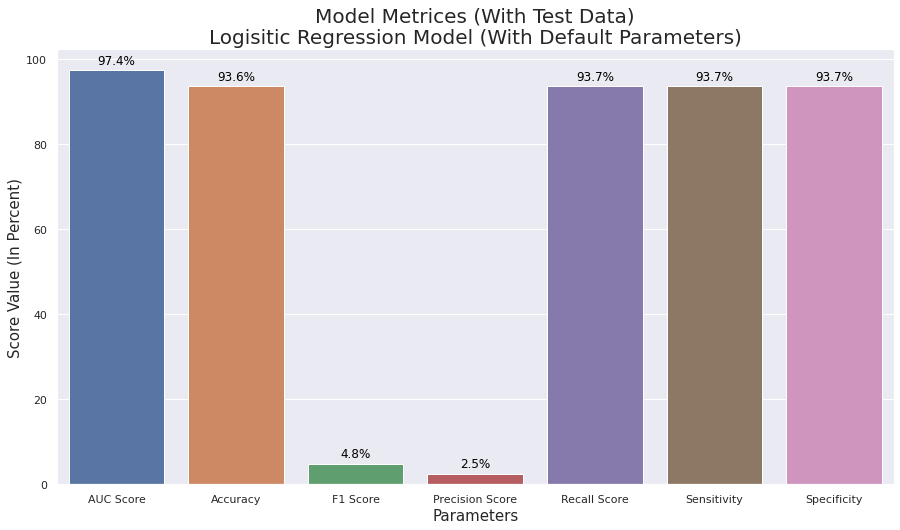

In [444]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision Score', 'Recall Score', 'F1 Score', 'AUC Score'],
                     'Value': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]}, index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision Score', 'Recall Score', 'F1 Score', 'AUC Score'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('Model Metrices (With Test Data)\nLogisitic Regression Model (With Default Parameters)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

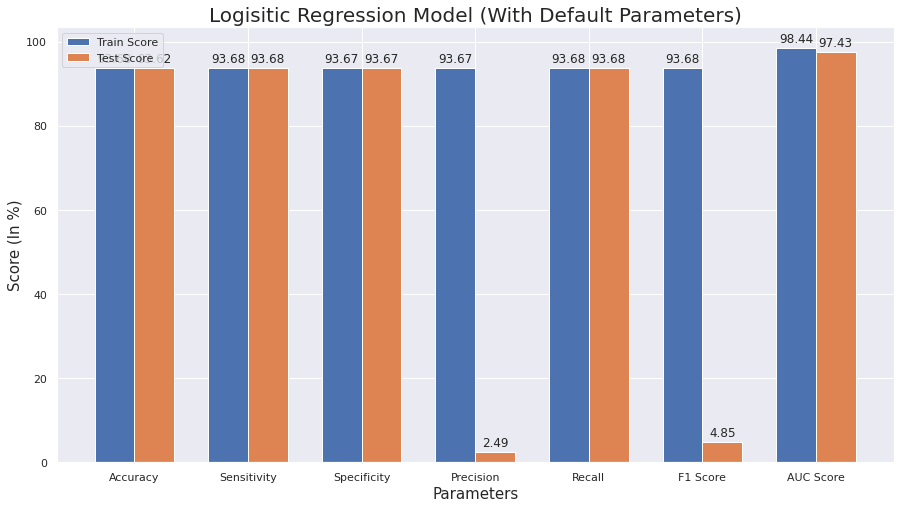

In [445]:
train_test_score_df = pd.DataFrame({'train': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score], 
                                    'test': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                                   index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC Score'])   

fig, ax = plt.subplots()
x = np.arange(len(train_test_score_df.index))
width = 0.35


ax.set_ylabel('Score (In %)', fontdict={'fontsize': 15})
ax.set_xlabel('Parameters', fontdict={'fontsize': 15})
ax.set_title('Logisitic Regression Model (With Default Parameters)', fontdict={'fontsize': 20})
ax.set_xticks(x)
ax.set_xticklabels(train_test_score_df.index)

rects1 = ax.bar(x - width/2, train_test_score_df['train'], width, label='Train Score')
for rect in rects1:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

rects2 = ax.bar(x + width/2, train_test_score_df['test'], width, label='Test Score')
for rect in rects2:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

ax.legend()
plt.show()

#### Conclusions for this model:

1. **Recall** is almost **93.68%**, which indicates that 6.32% of fraudulent transactions are deemed as Not Fraud. This value can be acceptable but, it will be even better if we could increase this value.

2. **Precision** is just **2.5%**, which indicates that the False Positive count (i.e., transactions which are valid but are considered as fraud) of the model is high. Due to this there will be no financial loss at all for the bank. But this behavior (of deeming non-fraudulent transactions as fraud) leads to very bad banking experience because majority of the transactions are blocked even though being valid ones. So, this value is not at all acceptable.

In [446]:
metrics_dict['adasync']['logistics']['accuracy'] = accuracy_score_test
metrics_dict['adasync']['logistics']['sensitivity'] = sensitivity_test
metrics_dict['adasync']['logistics']['specificity'] = specificity_test
metrics_dict['adasync']['logistics']['precision'] = precision_score_test
metrics_dict['adasync']['logistics']['recall'] = recall_score_test
metrics_dict['adasync']['logistics']['auc'] = auc_score_test
metrics_dict['adasync']['logistics']['f1'] = f1_score_test

In [447]:
metrics_dict['adasync']['logistics']

{'accuracy': 93.62,
 'sensitivity': 93.68,
 'specificity': 93.67,
 'precision': 2.49,
 'recall': 93.68,
 'f1': 4.85,
 'auc': 97.43}

## 9.2. <a id = "header2_9_2">Decision Trees</a>

In [448]:
dt_hyp_tuned = DecisionTreeClassifier(random_state=314)

In [449]:
params = {
    'max_depth': list(range(5, 15, 3)),
    'min_samples_leaf': list(range(50, 1001, 50)),
    'criterion': ["gini", "entropy"]
}

In [450]:
scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

In [451]:
dt_hyp_tuned = GridSearchCV(estimator=dt_hyp_tuned, param_grid=params, cv=4, n_jobs=-1, verbose=1, scoring=scorer)

In [452]:
dt_hyp_tuned.fit(X_train, y_train)

Fitting 4 folds for each of 160 candidates, totalling 640 fits
[17:09:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:12:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:18:07] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:27:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'.

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=314),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 8, 11, 14],
                         'min_samples_leaf': [50, 100, 150, 200, 250, 300, 350,
                                              400, 450, 500, 550, 600, 650, 700,
                                              750, 800, 850, 900, 950, 1000]},
             scoring=make_scorer(roc_auc_score, needs_proba=True), verbose=1)

In [453]:
score_df = pd.DataFrame(dt_hyp_tuned.cv_results_)
score_df.nlargest(5, "mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
146      15.161946      0.383248         0.034388        0.002226   
149      14.820177      0.415881         0.033963        0.001121   
147      15.132999      0.240463         0.034261        0.002300   
111      13.852678      0.324619         0.035179        0.001627   
127      14.850829      0.340076         0.033730        0.001552   

    param_criterion param_max_depth param_min_samples_leaf  \
146         entropy              14                    350   
149         entropy              14                    500   
147         entropy              14                    400   
111         entropy               8                    600   
127         entropy              11                    400   

                                                params  split0_test_score  \
146  {'criterion': 'entropy', 'max_depth': 14, 'min...           0.987957   
149  {'criterion': 'entropy', 'max_depth': 14, 'min...           0.987706   
147  {'criterion': 'entropy', 'max_depth': 14, 'min...           0.987429   
111  {'criterion': 'entropy', 'max_depth': 8, 'min_...           0.987463   
127  {'criterion': 'entropy', 'max_depth': 11, 'min...           0.986795   

     split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
146           0.986867           0.988956           0.985091         0.987218   
149           0.985167           0.987792           0.987344         0.987002   
147           0.988701           0.987231           0.984480         0.986960   
111           0.986538           0.986964           0.986643         0.986902   
127           0.988203           0.987254           0.984852         0.986776   

     std_test_score  rank_test_score  
146        0.001433                1  
149        0.001073                2  
147        0.001539                3  
111        0.000360                4  
127        0.001221                5

In [454]:
dt_best_est = dt_hyp_tuned.best_estimator_
dt_best_est

DecisionTreeClassifier(criterion='entropy', max_depth=14, min_samples_leaf=350,
                       random_state=314)

In [455]:
pred_probs_train = dt_best_est.predict(X_train)
pred_probs_train

array([0, 0, 0, ..., 1, 1, 1])

In [456]:
conf_matrix = metrics.confusion_matrix(y_train, pred_probs_train)

TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

accuracy_score = metrics.accuracy_score(y_train, pred_probs_train)
accuracy_score = round(accuracy_score*100, 2)

precision_score = metrics.precision_score(y_train, pred_probs_train)
precision_score = round(precision_score*100, 2)

recall_score = metrics.recall_score(y_train, pred_probs_train)
recall_score = round(recall_score*100, 2)

sensitivity = TP / float(FN + TP)
sensitivity = round(sensitivity*100, 2)

specificity = TN / float(TN + FP)
specificity = round(specificity*100, 2)

f1_score = metrics.f1_score(y_train, pred_probs_train)
f1_score = round(f1_score*100, 2)

auc_score = metrics.roc_auc_score(y_train, pred_probs_train)
auc_score = round(auc_score*100, 2)

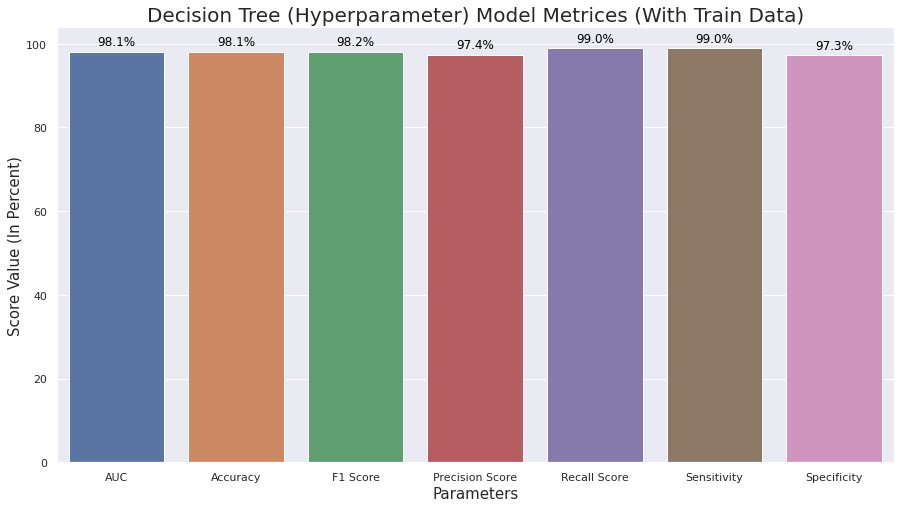

In [457]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision Score', 'Recall Score', 'F1 Score', 'AUC'],
                     'Value': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score]},
                    index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('Decision Tree (Hyperparameter) Model Metrices (With Train Data)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

In [458]:
pred_probs_test = dt_best_est.predict(X_test)
pred_probs_test

array([0, 0, 0, ..., 0, 0, 0])

In [459]:
conf_matrix_test = metrics.confusion_matrix(y_test, pred_probs_test)

TN_test = conf_matrix[0, 0]
FP_test = conf_matrix[0, 1]
FN_test = conf_matrix[1, 0]
TP_test = conf_matrix[1, 1]

accuracy_score_test = metrics.accuracy_score(y_test, pred_probs_test)
accuracy_score_test = round(accuracy_score_test*100, 2)

precision_score_test = metrics.precision_score(y_test, pred_probs_test)
precision_score_test = round(precision_score_test*100, 2)

recall_score_test = metrics.recall_score(y_test, pred_probs_test)
recall_score_test = round(recall_score_test*100, 2)

sensitivity_test = TP_test / float(FN_test + TP_test)
sensitivity_test = round(sensitivity_test*100, 2)

specificity_test = TN_test / float(TN_test + FP_test)
specificity_test = round(specificity_test*100, 2)

f1_score_test = metrics.f1_score(y_test, pred_probs_test)
f1_score_test = round(f1_score_test*100, 2)

auc_score_test = round(metrics.roc_auc_score(y_test, pred_probs_test)*100, 2)

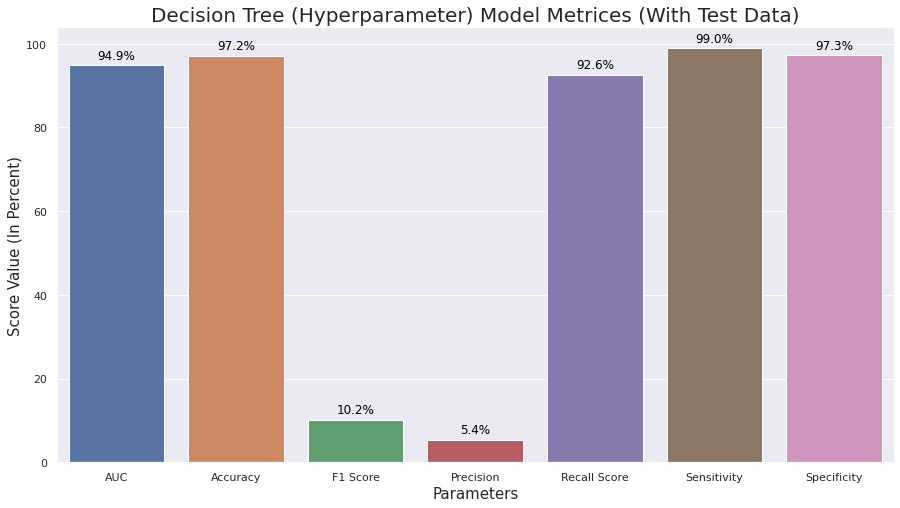

In [460]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall Score', 'F1 Score', 'AUC'],
                     'Value': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                    index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('Decision Tree (Hyperparameter) Model Metrices (With Test Data)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

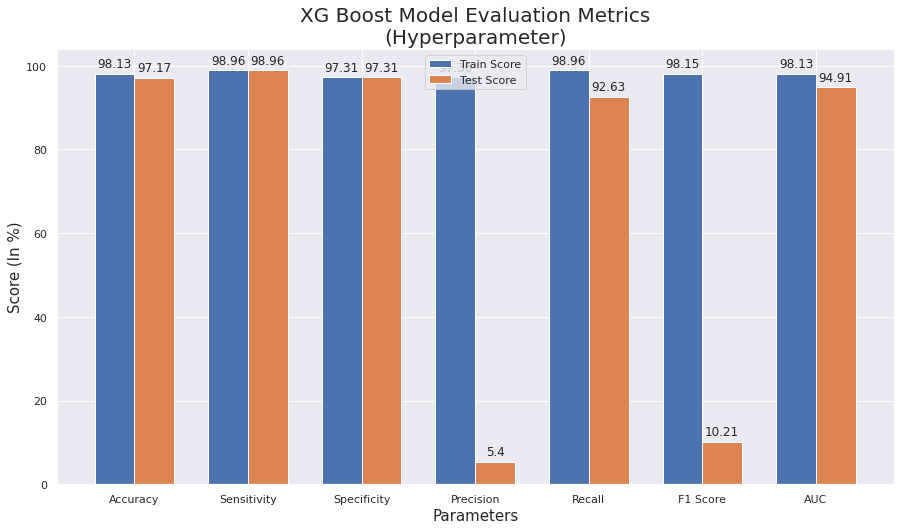

In [461]:
train_test_score_df = pd.DataFrame({'train': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score], 
                                    'test': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                                   index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   

fig, ax = plt.subplots()
x = np.arange(len(train_test_score_df.index))
width = 0.35


ax.set_ylabel('Score (In %)', fontdict={'fontsize': 15})
ax.set_xlabel('Parameters', fontdict={'fontsize': 15})
ax.set_title('XG Boost Model Evaluation Metrics\n(Hyperparameter)', fontdict={'fontsize': 20})
ax.set_xticks(x)
ax.set_xticklabels(train_test_score_df.index)

rects1 = ax.bar(x - width/2, train_test_score_df['train'], width, label='Train Score')
for rect in rects1:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

rects2 = ax.bar(x + width/2, train_test_score_df['test'], width, label='Test Score')
for rect in rects2:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

ax.legend()
plt.show()

#### Conclusions for this model:

1. **Recall** is almost **92.63%**, which indicates that 7.37% of fraudulent transactions are deemed as Not Fraud. This value can be acceptable but, it will be even better if we could increase this value.

2. **Precision** is just **5.4%**, which indicates that the False Positive count (i.e., transactions which are valid but are considered as fraud) of the model is high. Due to this there will be no financial loss at all for the bank. But this behavior (of deeming non-fraudulent transactions as fraud) leads to very bad banking experience because majority of the transactions are blocked even though being valid ones. So, this value is not at all acceptable.

In [462]:
metrics_dict['adasync']['dt']['accuracy'] = accuracy_score_test
metrics_dict['adasync']['dt']['sensitivity'] = sensitivity_test
metrics_dict['adasync']['dt']['specificity'] = specificity_test
metrics_dict['adasync']['dt']['precision'] = precision_score_test
metrics_dict['adasync']['dt']['recall'] = recall_score_test
metrics_dict['adasync']['dt']['auc'] = auc_score_test
metrics_dict['adasync']['dt']['f1'] = f1_score_test

In [463]:
metrics_dict['adasync']['dt']

{'accuracy': 97.17,
 'sensitivity': 98.96,
 'specificity': 97.31,
 'precision': 5.4,
 'recall': 92.63,
 'f1': 10.21,
 'auc': 94.91}

## 9.3. <a id = "header2_9_3">Random Forest</a>

In [464]:
rf_hyp_tuned = RandomForestClassifier(random_state=314, n_jobs=-1)

In [465]:
params = {
    'max_depth': list(range(3, 8)),
    'min_samples_leaf': list(range(50, 1001, 100)),
    'max_features': list(range(2, 5)),
    'n_estimators': list(range(10, 31, 10))
}

In [466]:
scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

In [467]:
rf_hyp_tuned_grid = GridSearchCV(estimator=rf_hyp_tuned, param_grid=params, 
                                 cv=4, n_jobs=-1, verbose=1, 
                                 scoring=scorer)

In [468]:
rf_hyp_tuned_grid.fit(X_train, y_train)

Fitting 4 folds for each of 450 candidates, totalling 1800 fits
[17:09:31] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:12:33] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:18:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:00] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[17:09:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:15:12] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:23:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[17:09:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:15:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:23:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[17:12:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:02] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:27:59] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:35:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[17:09:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:17:42] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:24:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:27:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[17:09:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:12:42] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:27:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[17:15:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:23:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:33:07] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[17:09:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:12:32] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:18:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:00] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[17:19:33] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:23:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:33:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:36:57] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[17:12:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:57] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:27:57] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:35:25] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[17:25:07] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:09] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:36:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[17:09:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:17:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:24:48] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:27:45] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[17:12:59] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:10] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:10] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[17:12:49] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:18:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=314),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [50, 150, 250, 350, 450, 550, 650,
                                              750, 850, 950],
                         'n_estimators': [10, 20, 30]},
             scoring=make_scorer(roc_auc_score, needs_proba=True), verbose=1)

In [469]:
score_df = pd.DataFrame(rf_hyp_tuned_grid.cv_results_)
score_df.nlargest(5,"mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
428      32.844360      0.108269         0.743175        0.079640   
425      32.322645      0.103098         0.739873        0.060805   
422      32.264751      0.079921         0.806451        0.056289   
424      30.209565      0.256753         0.857691        0.048743   
427      31.254292      0.418018         0.974011        0.021621   

    param_max_depth param_max_features param_min_samples_leaf  \
428               7                  4                    250   
425               7                  4                    150   
422               7                  4                     50   
424               7                  4                    150   
427               7                  4                    250   

    param_n_estimators                                             params  \
428                 30  {'max_depth': 7, 'max_features': 4, 'min_sampl...   
425                 30  {'max_depth': 7, 'max_features': 4, 'min_sampl...   
422                 30  {'max_depth': 7, 'max_features': 4, 'min_sampl...   
424                 20  {'max_depth': 7, 'max_features': 4, 'min_sampl...   
427                 20  {'max_depth': 7, 'max_features': 4, 'min_sampl...   

     split0_test_score  split1_test_score  split2_test_score  \
428           0.991603           0.992771           0.995683   
425           0.991442           0.991815           0.995518   
422           0.990433           0.992531           0.995469   
424           0.991411           0.991912           0.994622   
427           0.991133           0.993624           0.993804   

     split3_test_score  mean_test_score  std_test_score  rank_test_score  
428           0.993915         0.993493        0.001506                1  
425           0.993884         0.993165        0.001646                2  
422           0.993867         0.993075        0.001847                3  
424           0.993949         0.992973        0.001345                4  
427           0.992921         0.992870        0.001056                5

In [470]:
rf_best = rf_hyp_tuned_grid.best_estimator_
rf_best

RandomForestClassifier(max_depth=7, max_features=4, min_samples_leaf=250,
                       n_estimators=30, n_jobs=-1, random_state=314)

In [471]:
pred_probs_train = rf_best.predict(X_train)

In [472]:
conf_matrix = metrics.confusion_matrix(y_train, pred_probs_train)

TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

accuracy_score = metrics.accuracy_score(y_train, pred_probs_train)
accuracy_score = round(accuracy_score*100, 2)

precision_score = metrics.precision_score(y_train, pred_probs_train)
precision_score = round(precision_score*100, 2)

recall_score = metrics.recall_score(y_train, pred_probs_train)
recall_score = round(recall_score*100, 2)

sensitivity = TP / float(FN + TP)
sensitivity = round(sensitivity*100, 2)

specificity = TN / float(TN + FP)
specificity = round(specificity*100, 2)

f1_score = metrics.f1_score(y_train, pred_probs_train)
f1_score = round(f1_score*100, 2)

auc_score = round(metrics.roc_auc_score(y_train, pred_probs_train)*100, 2)

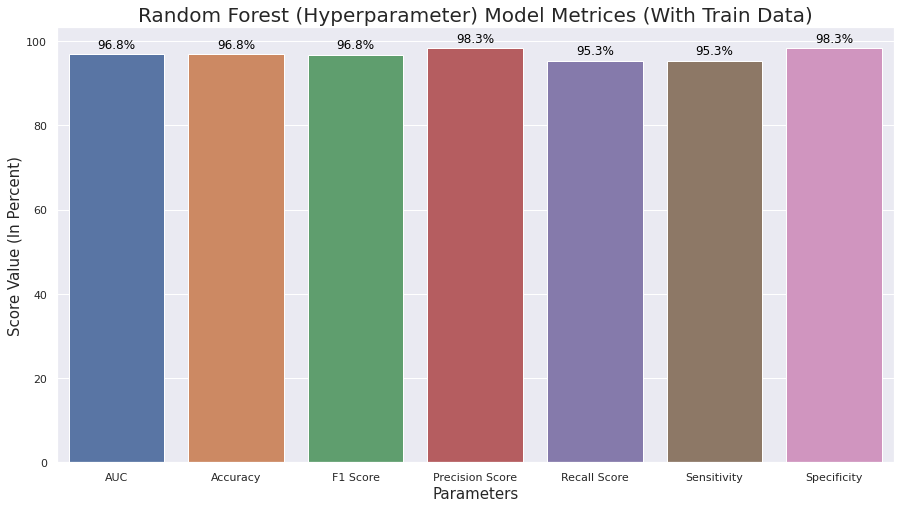

In [473]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision Score', 'Recall Score', 'F1 Score', 'AUC'],
                     'Value': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score]},
                    index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('Random Forest (Hyperparameter) Model Metrices (With Train Data)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

In [474]:
pred_probs_test = rf_best.predict(X_test)

In [475]:
conf_matrix_test = metrics.confusion_matrix(y_test, pred_probs_test)

TN_test = conf_matrix[0, 0]
FP_test = conf_matrix[0, 1]
FN_test = conf_matrix[1, 0]
TP_test = conf_matrix[1, 1]

accuracy_score_test = metrics.accuracy_score(y_test, pred_probs_test)
accuracy_score_test = round(accuracy_score_test*100, 2)

precision_score_test = metrics.precision_score(y_test, pred_probs_test)
precision_score_test = round(precision_score_test*100, 2)

recall_score_test = metrics.recall_score(y_test, pred_probs_test)
recall_score_test = round(recall_score_test*100, 2)

sensitivity_test = TP_test / float(FN_test + TP_test)
sensitivity_test = round(sensitivity_test*100, 2)

specificity_test = TN_test / float(TN_test + FP_test)
specificity_test = round(specificity_test*100, 2)

f1_score_test = metrics.f1_score(y_test, pred_probs_test)
f1_score_test = round(f1_score_test*100, 2)

auc_score_test = round(metrics.roc_auc_score(y_test, pred_probs_test)*100, 2)

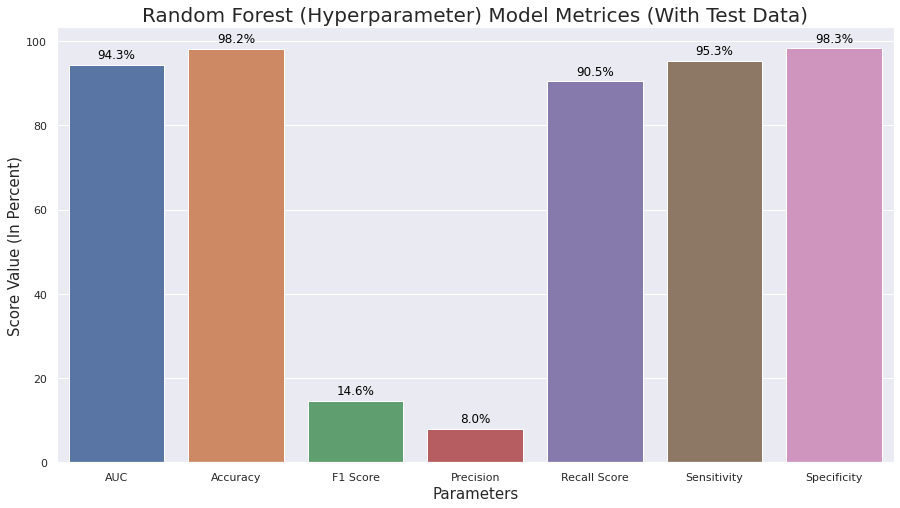

In [476]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall Score', 'F1 Score', 'AUC'],
                     'Value': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                    index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('Random Forest (Hyperparameter) Model Metrices (With Test Data)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

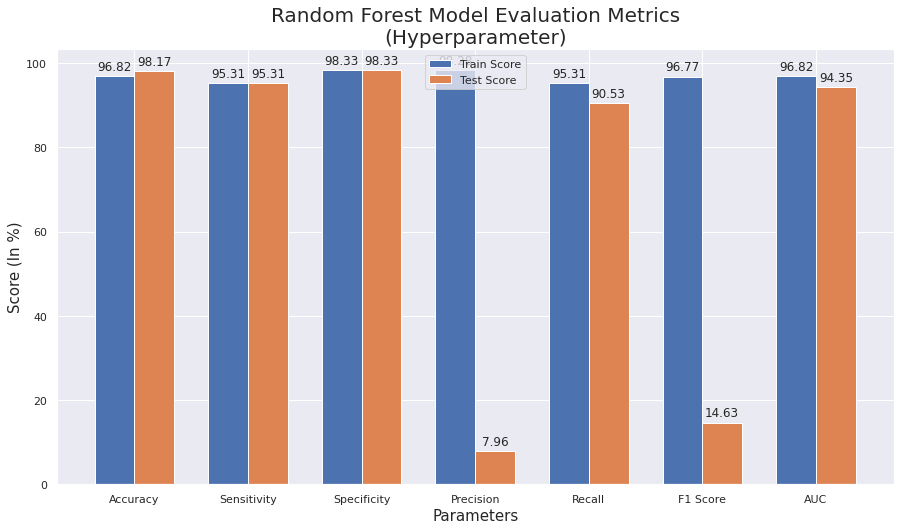

In [477]:
train_test_score_df = pd.DataFrame({'train': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score], 
                                    'test': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                                   index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   

fig, ax = plt.subplots()
x = np.arange(len(train_test_score_df.index))
width = 0.35


ax.set_ylabel('Score (In %)', fontdict={'fontsize': 15})
ax.set_xlabel('Parameters', fontdict={'fontsize': 15})
ax.set_title('Random Forest Model Evaluation Metrics\n(Hyperparameter)', fontdict={'fontsize': 20})
ax.set_xticks(x)
ax.set_xticklabels(train_test_score_df.index)

rects1 = ax.bar(x - width/2, train_test_score_df['train'], width, label='Train Score')
for rect in rects1:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

rects2 = ax.bar(x + width/2, train_test_score_df['test'], width, label='Test Score')
for rect in rects2:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

ax.legend()
plt.show()

#### Conclusions for this model:

1. **Recall** is almost **90.5%**, which indicates that 9.5% of fraudulent transactions are deemed as Not Fraud. This value can be acceptable but, it will be even better if we could increase this value.

2. **Precision** is just **8%**, which indicates that the False Positive count (i.e., transactions which are valid but are considered as fraud) of the model is high. Due to this there will be no financial loss at all for the bank. But this behavior (of deeming non-fraudulent transactions as fraud) leads to very bad banking experience because majority of the transactions are blocked even though being valid ones. So, this value is not at all acceptable.

In [478]:
metrics_dict['adasync']['rf']['accuracy'] = accuracy_score_test
metrics_dict['adasync']['rf']['sensitivity'] = sensitivity_test
metrics_dict['adasync']['rf']['specificity'] = specificity_test
metrics_dict['adasync']['rf']['precision'] = precision_score_test
metrics_dict['adasync']['rf']['recall'] = recall_score_test
metrics_dict['adasync']['rf']['auc'] = auc_score_test
metrics_dict['adasync']['rf']['f1'] = f1_score_test

In [479]:
metrics_dict['adasync']['rf']

{'accuracy': 98.17,
 'sensitivity': 95.31,
 'specificity': 98.33,
 'precision': 7.96,
 'recall': 90.53,
 'f1': 14.63,
 'auc': 94.35}

## 9.4. <a id = "header2_9_4">Gradient Boosting</a>

In [480]:
gbm_hyp_tuned = GradientBoostingClassifier(random_state=314)

In [481]:
params = {
    'max_depth': list(range(3, 8)),
    'max_features': list(range(2, 5)),
    'n_estimators': list(range(10, 31, 10))
}

In [482]:
scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

In [483]:
gbm_hyp_tuned_grid = GridSearchCV(estimator=gbm_hyp_tuned,
                                  param_grid=params, cv=4, n_jobs=-1,
                                  verbose=1, scoring=scorer)

In [484]:
gbm_hyp_tuned_grid.fit(X_train, y_train)

Fitting 4 folds for each of 45 candidates, totalling 180 fits


GridSearchCV(cv=4, estimator=GradientBoostingClassifier(random_state=314),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': [2, 3, 4],
                         'n_estimators': [10, 20, 30]},
             scoring=make_scorer(roc_auc_score, needs_proba=True), verbose=1)

In [485]:
score_df = pd.DataFrame(gbm_hyp_tuned_grid.cv_results_)
score_df.nlargest(5, "mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
41      38.105939      0.083224         0.142573        0.000221   
44      44.229325      0.125748         0.126899        0.005989   
38      27.462098      0.063671         0.154694        0.000573   
32      33.752778      0.042838         0.138629        0.001422   
35      44.083573      0.127483         0.135967        0.001149   

   param_max_depth param_max_features param_n_estimators  \
41               7                  3                 30   
44               7                  4                 30   
38               7                  2                 30   
32               6                  3                 30   
35               6                  4                 30   

                                               params  split0_test_score  \
41  {'max_depth': 7, 'max_features': 3, 'n_estimat...           0.996465   
44  {'max_depth': 7, 'max_features': 4, 'n_estimat...           0.994781   
38  {'max_depth': 7, 'max_features': 2, 'n_estimat...           0.996364   
32  {'max_depth': 6, 'max_features': 3, 'n_estimat...           0.995728   
35  {'max_depth': 6, 'max_features': 4, 'n_estimat...           0.995838   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
41           0.997591           0.997760           0.997045         0.997215   
44           0.998237           0.998308           0.997264         0.997148   
38           0.997314           0.997204           0.996846         0.996932   
32           0.995921           0.997277           0.996521         0.996362   
35           0.996027           0.997824           0.995710         0.996350   

    std_test_score  rank_test_score  
41        0.000508                1  
44        0.001427                2  
38        0.000371                3  
32        0.000604                4  
35        0.000858                5

In [486]:
gb_best = gbm_hyp_tuned_grid.best_estimator_
gb_best

GradientBoostingClassifier(max_depth=7, max_features=3, n_estimators=30,
                           random_state=314)

In [487]:
pred_probs_train = gb_best.predict(X_train)

In [488]:
conf_matrix = metrics.confusion_matrix(y_train, pred_probs_train)

TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

accuracy_score = metrics.accuracy_score(y_train, pred_probs_train)
accuracy_score = round(accuracy_score*100, 2)

precision_score = metrics.precision_score(y_train, pred_probs_train)
precision_score = round(precision_score*100, 2)

recall_score = metrics.recall_score(y_train, pred_probs_train)
recall_score = round(recall_score*100, 2)

sensitivity = TP / float(FN + TP)
sensitivity = round(sensitivity*100, 2)

specificity = TN / float(TN + FP)
specificity = round(specificity*100, 2)

f1_score = metrics.f1_score(y_train, pred_probs_train)
f1_score = round(f1_score*100, 2)

auc_score = round(metrics.roc_auc_score(y_train, pred_probs_train)*100, 2)

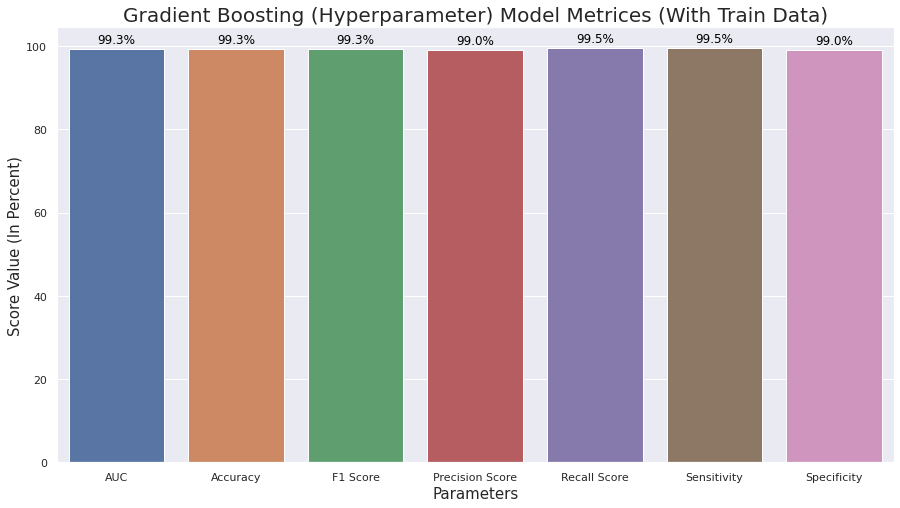

In [489]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision Score', 'Recall Score', 'F1 Score', 'AUC'],
                     'Value': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score]},
                    index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('Gradient Boosting (Hyperparameter) Model Metrices (With Train Data)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

In [490]:
pred_probs_test = gb_best.predict(X_test)

In [491]:
conf_matrix_test = metrics.confusion_matrix(y_test, pred_probs_test)

TN_test = conf_matrix[0, 0]
FP_test = conf_matrix[0, 1]
FN_test = conf_matrix[1, 0]
TP_test = conf_matrix[1, 1]

accuracy_score_test = metrics.accuracy_score(y_test, pred_probs_test)
accuracy_score_test = round(accuracy_score_test*100, 2)

precision_score_test = metrics.precision_score(y_test, pred_probs_test)
precision_score_test = round(precision_score_test*100, 2)

recall_score_test = metrics.recall_score(y_test, pred_probs_test)
recall_score_test = round(recall_score_test*100, 2)

sensitivity_test = TP_test / float(FN_test + TP_test)
sensitivity_test = round(sensitivity_test*100, 2)

specificity_test = TN_test / float(TN_test + FP_test)
specificity_test = round(specificity_test*100, 2)

f1_score_test = metrics.f1_score(y_test, pred_probs_test)
f1_score_test = round(f1_score_test*100, 2)

auc_score_test = round(metrics.roc_auc_score(y_test, pred_probs_test)*100, 2)

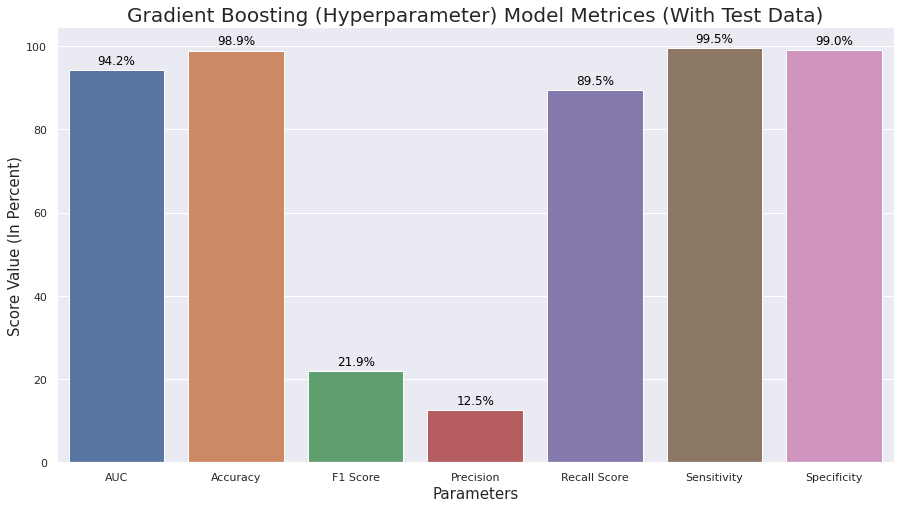

In [492]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall Score', 'F1 Score', 'AUC'],
                     'Value': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                    index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('Gradient Boosting (Hyperparameter) Model Metrices (With Test Data)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

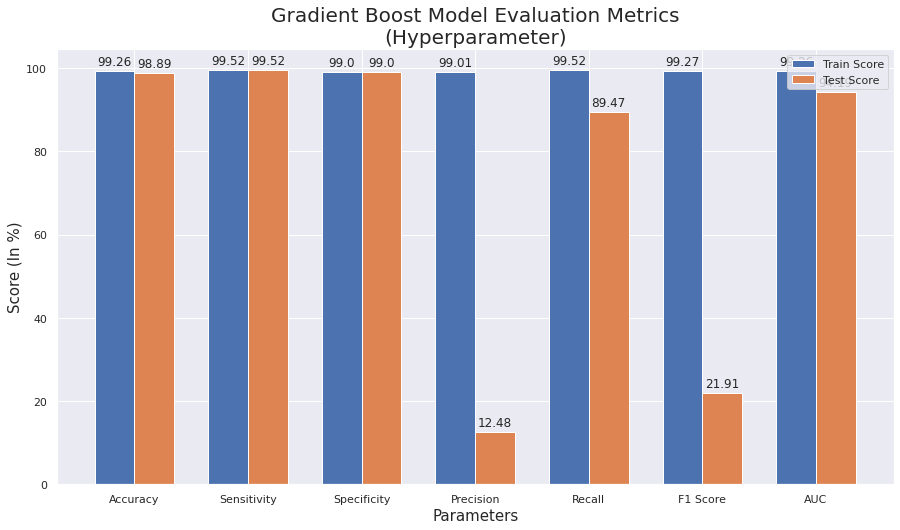

In [493]:
train_test_score_df = pd.DataFrame({'train': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score], 
                                    'test': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                                   index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   

fig, ax = plt.subplots()
x = np.arange(len(train_test_score_df.index))
width = 0.35


ax.set_ylabel('Score (In %)', fontdict={'fontsize': 15})
ax.set_xlabel('Parameters', fontdict={'fontsize': 15})
ax.set_title('Gradient Boost Model Evaluation Metrics\n(Hyperparameter)', fontdict={'fontsize': 20})
ax.set_xticks(x)
ax.set_xticklabels(train_test_score_df.index)

rects1 = ax.bar(x - width/2, train_test_score_df['train'], width, label='Train Score')
for rect in rects1:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

rects2 = ax.bar(x + width/2, train_test_score_df['test'], width, label='Test Score')
for rect in rects2:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

ax.legend()
plt.show()

#### Conclusions for this model:

1. **Recall** is almost **89.5%**, which indicates that 10.5% of fraudulent transactions are deemed as Not Fraud. This value can be acceptable but, it will be even better if we could increase this value.

2. **Precision** is just **12.5%**, which indicates that the False Positive count (i.e., transactions which are valid but are considered as fraud) of the model is high. Due to this there will be no financial loss at all for the bank. But this behavior (of deeming non-fraudulent transactions as fraud) leads to very bad banking experience because majority of the transactions are blocked even though being valid ones. So, this value is not at all acceptable.

In [494]:
metrics_dict['adasync']['gb']['accuracy'] = accuracy_score_test
metrics_dict['adasync']['gb']['sensitivity'] = sensitivity_test
metrics_dict['adasync']['gb']['specificity'] = specificity_test
metrics_dict['adasync']['gb']['precision'] = precision_score_test
metrics_dict['adasync']['gb']['recall'] = recall_score_test
metrics_dict['adasync']['gb']['auc'] = auc_score_test
metrics_dict['adasync']['gb']['f1'] = f1_score_test

In [495]:
metrics_dict['adasync']['gb']

{'accuracy': 98.89,
 'sensitivity': 99.52,
 'specificity': 99.0,
 'precision': 12.48,
 'recall': 89.47,
 'f1': 21.91,
 'auc': 94.19}

## 9.5. <a id = "header2_9_5">XG Boost</a>

In [496]:
xgreg = XGBClassifier(random_state=314, n_jobs = -1)

In [497]:
params = {'learning_rate': np.arange(0.25, 0.76, 0.25),
          'max_depth': list(range(5, 7)), 
          'min_child_weight': [15, 18], 
          'n_estimators': list(range(25, 76, 25))}

In [498]:
scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

In [499]:
xgboost_hyp_tuned = GridSearchCV(estimator=xgreg, param_grid=params, n_jobs=-1, 
                                 cv=4, scoring=scorer, refit=True, verbose=1)

In [500]:
xgboost_hyp_tuned.fit(X_train, y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits
[18:46:02] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:46:02] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:46:02] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:46:02] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:46:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:46:02] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:46:02] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:46:02] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:46:02] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:46:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:46:02] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:46:02] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:51:48] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:38:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     num_parallel_tree=None, random_state=314,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, val

In [501]:
score_df = pd.DataFrame(xgboost_hyp_tuned.cv_results_)
score_df.nlargest(5, "mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
32     402.131151      3.018658         0.522102        0.059410   
31     342.968160      2.905681         0.799489        0.102550   
29     403.083390      4.830208         0.871847        0.067388   
26     408.828061      1.655806         0.838043        0.080359   
8      606.095330      2.471846         0.861157        0.070063   

   param_learning_rate param_max_depth param_min_child_weight  \
32                0.75               6                     15   
31                0.75               6                     15   
29                0.75               5                     18   
26                0.75               5                     15   
8                 0.25               6                     15   

   param_n_estimators                                             params  \
32                 75  {'learning_rate': 0.75, 'max_depth': 6, 'min_c...   
31                 50  {'learning_rate': 0.75, 'max_depth': 6, 'min_c...   
29                 75  {'learning_rate': 0.75, 'max_depth': 5, 'min_c...   
26                 75  {'learning_rate': 0.75, 'max_depth': 5, 'min_c...   
8                  75  {'learning_rate': 0.25, 'max_depth': 6, 'min_c...   

    split0_test_score  split1_test_score  split2_test_score  \
32           0.999433           0.999949           0.999950   
31           0.999293           0.999943           0.999938   
29           0.997464           0.999958           0.999959   
26           0.997737           0.999943           0.999932   
8            0.996359           0.999933           0.999907   

    split3_test_score  mean_test_score  std_test_score  rank_test_score  
32           0.998250         0.999395        0.000694                1  
31           0.997176         0.999088        0.001135                2  
29           0.998664         0.999011        0.001038                3  
26           0.998378         0.998997        0.000967                4  
8            0.998390         0.998647        0.001461                5

In [502]:
xgboost_best_est = xgboost_hyp_tuned.best_estimator_
xgboost_best_est

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.75, max_delta_step=0, max_depth=6,
              min_child_weight=15, missing=nan, monotone_constraints='()',
              n_estimators=75, n_jobs=-1, num_parallel_tree=1, random_state=314,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [503]:
pred_probs_train = xgboost_best_est.predict(X_train)
pred_probs_train

array([0, 0, 0, ..., 1, 1, 1])

In [504]:
conf_matrix = metrics.confusion_matrix(y_train, pred_probs_train)

TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

accuracy_score = metrics.accuracy_score(y_train, pred_probs_train)
accuracy_score = round(accuracy_score*100, 2)

precision_score = metrics.precision_score(y_train, pred_probs_train)
precision_score = round(precision_score*100, 2)

recall_score = metrics.recall_score(y_train, pred_probs_train)
recall_score = round(recall_score*100, 2)

sensitivity = TP / float(FN + TP)
sensitivity = round(sensitivity*100, 2)

specificity = TN / float(TN + FP)
specificity = round(specificity*100, 2)

f1_score = metrics.f1_score(y_train, pred_probs_train)
f1_score = round(f1_score*100, 2)

auc_score = round(metrics.roc_auc_score(y_train, pred_probs_train)*100, 2)

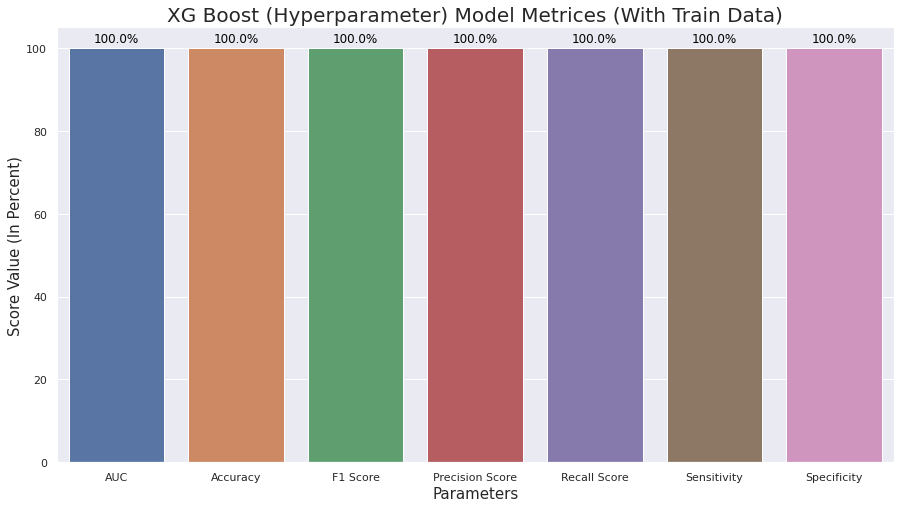

In [505]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision Score', 'Recall Score', 'F1 Score', 'AUC'],
                     'Value': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score]},
                    index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('XG Boost (Hyperparameter) Model Metrices (With Train Data)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

In [506]:
pred_probs_test = xgboost_best_est.predict(X_test)

In [507]:
conf_matrix_test = metrics.confusion_matrix(y_test, pred_probs_test)

TN_test = conf_matrix[0, 0]
FP_test = conf_matrix[0, 1]
FN_test = conf_matrix[1, 0]
TP_test = conf_matrix[1, 1]

accuracy_score_test = metrics.accuracy_score(y_test, pred_probs_test)
accuracy_score_test = round(accuracy_score_test*100, 2)

precision_score_test = metrics.precision_score(y_test, pred_probs_test)
precision_score_test = round(precision_score_test*100, 2)

recall_score_test = metrics.recall_score(y_test, pred_probs_test)
recall_score_test = round(recall_score_test*100, 2)

sensitivity_test = TP_test / float(FN_test + TP_test)
sensitivity_test = round(sensitivity_test*100, 2)

specificity_test = TN_test / float(TN_test + FP_test)
specificity_test = round(specificity_test*100, 2)

f1_score_test = metrics.f1_score(y_test, pred_probs_test)
f1_score_test = round(f1_score_test*100, 2)

auc_score_test = round(metrics.roc_auc_score(y_test, pred_probs_test)*100, 2)

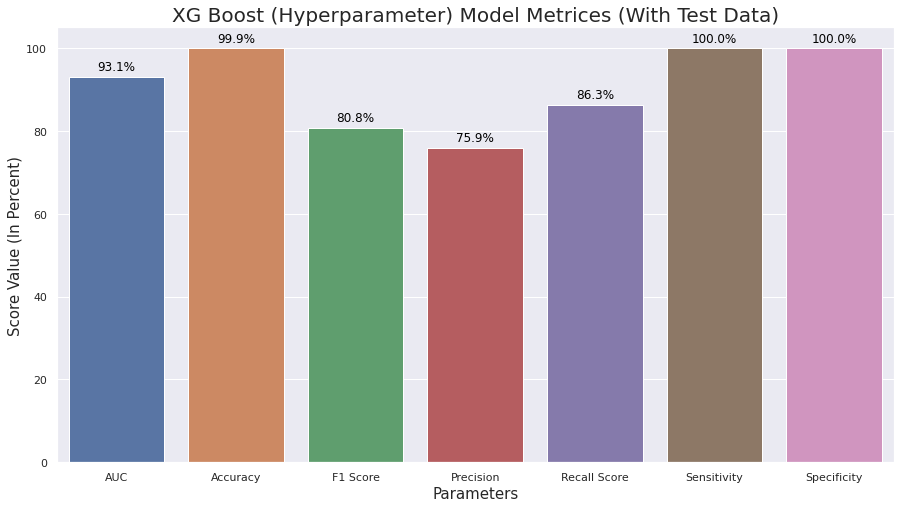

In [508]:
data = pd.DataFrame({'Parameter': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall Score', 'F1 Score', 'AUC'],
                     'Value': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                    index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   
data = data.groupby(by='Parameter').Value.sum().sort_index()
graph = sns.barplot(x=data.index, y=data.values)
plt.title('XG Boost (Hyperparameter) Model Metrices (With Test Data)', fontdict={'fontsize': 20})
plt.xlabel('Parameters', fontdict={'fontsize': 15})
plt.ylabel('Score Value (In Percent)', fontdict={'fontsize': 15})
label_deviation_above_y_axis = data.max() * 0.015
for index, value in enumerate(data.iteritems()):
    graph.text(index, value[1] + label_deviation_above_y_axis, str(round(value[1], 1))+'%', color='black', ha="center")
plt.show()

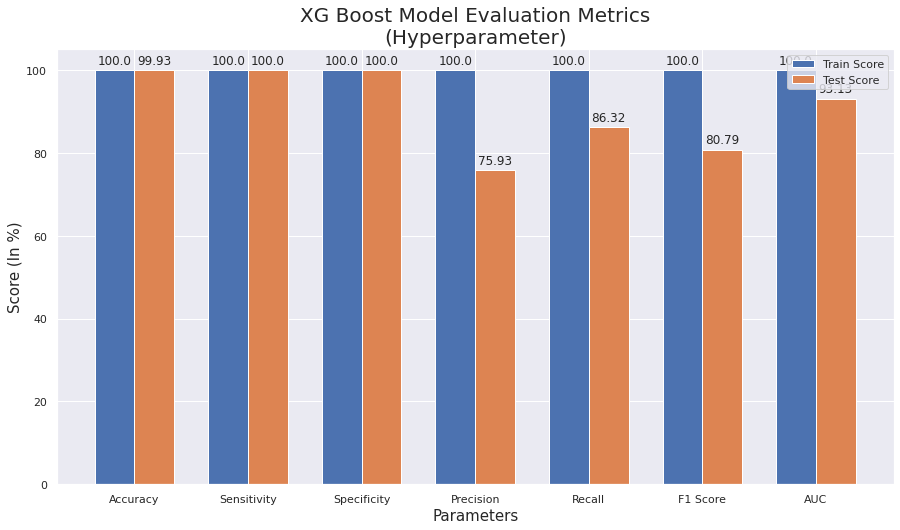

In [509]:
train_test_score_df = pd.DataFrame({'train': [accuracy_score, sensitivity, specificity, precision_score, recall_score, f1_score, auc_score], 
                                    'test': [accuracy_score_test, sensitivity_test, specificity_test, precision_score_test, recall_score_test, f1_score_test, auc_score_test]},
                                   index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])   

fig, ax = plt.subplots()
x = np.arange(len(train_test_score_df.index))
width = 0.35


ax.set_ylabel('Score (In %)', fontdict={'fontsize': 15})
ax.set_xlabel('Parameters', fontdict={'fontsize': 15})
ax.set_title('XG Boost Model Evaluation Metrics\n(Hyperparameter)', fontdict={'fontsize': 20})
ax.set_xticks(x)
ax.set_xticklabels(train_test_score_df.index)

rects1 = ax.bar(x - width/2, train_test_score_df['train'], width, label='Train Score')
for rect in rects1:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

rects2 = ax.bar(x + width/2, train_test_score_df['test'], width, label='Test Score')
for rect in rects2:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

ax.legend()
plt.show()

#### Conclusions for this model:

1. **Recall** is almost **86.3%**, which indicates that 13.7% of fraudulent transactions are deemed as Not Fraud. This value is not acceptable at all. It will be better if we could increase this value.

2. **Precision** is **76%**, which indicates that the False Positive count (i.e., transactions which are valid but are considered as fraud) of the model is high. Due to this there will be no financial loss at all for the bank. But this behavior (of deeming non-fraudulent transactions as fraud) leads to very bad banking experience because majority of the transactions are blocked even though being valid ones. So, this value is not at all acceptable.

In [510]:
metrics_dict['adasync']['xgb']['accuracy'] = accuracy_score_test
metrics_dict['adasync']['xgb']['sensitivity'] = sensitivity_test
metrics_dict['adasync']['xgb']['specificity'] = specificity_test
metrics_dict['adasync']['xgb']['precision'] = precision_score_test
metrics_dict['adasync']['xgb']['recall'] = recall_score_test
metrics_dict['adasync']['xgb']['auc'] = auc_score_test
metrics_dict['adasync']['xgb']['f1'] = f1_score_test

In [511]:
metrics_dict['adasync']['xgb']

{'accuracy': 99.93,
 'sensitivity': 100.0,
 'specificity': 100.0,
 'precision': 75.93,
 'recall': 86.32,
 'f1': 80.79,
 'auc': 93.13}

## 9.6. <a id = "header2_9_6">Artificial Neural Net (ANN)</a>

In [512]:
train_label_encoder = LabelEncoder().fit(y_train)
y_train_ann = train_label_encoder.transform(y_train)
y_train_ann = to_categorical(y_train_ann)

In [513]:
test_label_encoder = LabelEncoder().fit(y_test)
y_test_ann = test_label_encoder.transform(y_test)
y_test_ann = to_categorical(y_test_ann)

In [514]:
model = Sequential()

In [515]:
model.add(Dense(10, input_dim=29, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [516]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                300       
_________________________________________________________________
dense_10 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 42        
Total params: 562
Trainable params: 562
Non-trainable params: 0
_________________________________________________________________


In [517]:
metrics_list = ['accuracy', 'FalsePositives', 'TrueNegatives', 'AUC', 'Precision', 'Recall']

In [518]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=metrics_list)

In [519]:
train_data_model_history = model.fit(X_train, y_train_ann, epochs=10, batch_size=14591)

Epoch 1/10
30/30 [==============================] - 1s 7ms/step - loss: 10.7041 - accuracy: 0.6003 - false_positives: 174686.0000 - true_negatives: 262327.0000 - auc: 0.5669 - precision: 0.6003 - recall: 0.6003
Epoch 2/10
30/30 [==============================] - 0s 7ms/step - loss: 0.9047 - accuracy: 0.6155 - false_positives: 168045.0000 - true_negatives: 268968.0000 - auc: 0.7165 - precision: 0.6155 - recall: 0.6155
Epoch 3/10
30/30 [==============================] - 0s 8ms/step - loss: 0.4305 - accuracy: 0.7606 - false_positives: 104617.0000 - true_negatives: 332396.0000 - auc: 0.8713 - precision: 0.7606 - recall: 0.7606
Epoch 4/10
30/30 [==============================] - 0s 8ms/step - loss: 0.3264 - accuracy: 0.8416 - false_positives: 69229.0000 - true_negatives: 367784.0000 - auc: 0.9360 - precision: 0.8416 - recall: 0.8416
Epoch 5/10
30/30 [==============================] - 0s 8ms/step - loss: 0.2714 - accuracy: 0.8842 - false_positives: 50617.0000 - true_negatives: 386396.0000 - 

In [520]:
train_history = train_data_model_history.history
train_ann_dict = {str(key): round(value[-1]*100, 2) for key, value in train_history.items()}
train_ann_dict['specificity'] = round(train_ann_dict['true_negatives'] / (train_ann_dict['true_negatives'] + train_ann_dict['false_positives'])*100, 2)
train_ann_dict['f1_score'] = 2*((train_ann_dict['precision']*train_ann_dict['recall']) / (train_ann_dict['precision']+train_ann_dict['recall']))
train_ann_dict

{'loss': 12.35,
 'accuracy': 95.38,
 'false_positives': 2020800.0,
 'true_negatives': 41680500.0,
 'auc': 99.13,
 'precision': 95.38,
 'recall': 95.38,
 'specificity': 95.38,
 'f1_score': 95.38000000000001}

In [521]:
test_data_model_history = model.evaluate(X_test, y_test_ann)

1710/1710 [==============================] - 3s 2ms/step - loss: 0.1259 - accuracy: 0.9599 - false_positives: 2195.0000 - true_negatives: 52522.0000 - auc: 0.9903 - precision: 0.9599 - recall: 0.9599


In [522]:
test_metrics_list = ['Loss'] + metrics_list
test_ann_dict = {test_metrics_list[index]: round(test_data_model_history[index]*100, 2) for index in range(len(test_data_model_history))}
test_ann_dict['Specificity'] = round(test_ann_dict['TrueNegatives'] / (test_ann_dict['TrueNegatives'] + test_ann_dict['FalsePositives'])*100, 2)
test_ann_dict['f1_score'] = 2*((test_ann_dict['Precision']*test_ann_dict['Recall']) / (test_ann_dict['Precision']+test_ann_dict['Recall']))
test_ann_dict

{'Loss': 12.59,
 'accuracy': 95.99,
 'FalsePositives': 219500.0,
 'TrueNegatives': 5252200.0,
 'AUC': 99.03,
 'Precision': 95.99,
 'Recall': 95.99,
 'Specificity': 95.99,
 'f1_score': 95.99}

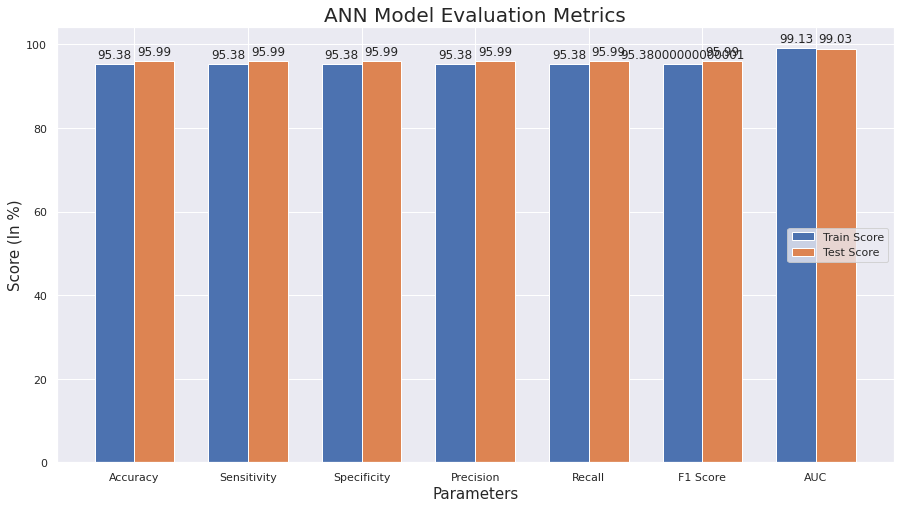

In [523]:
train_test_score_df = pd.DataFrame({'train': [train_ann_dict['accuracy'], train_ann_dict['recall'], train_ann_dict['specificity'], train_ann_dict['precision'], train_ann_dict['recall'], train_ann_dict['f1_score'], train_ann_dict['auc']], 
                                    'test': [test_ann_dict['accuracy'], test_ann_dict['Recall'], test_ann_dict['Specificity'], test_ann_dict['Precision'], test_ann_dict['Recall'], test_ann_dict['f1_score'], test_ann_dict['AUC']]},
                                   index=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score', 'AUC'])

fig, ax = plt.subplots()
x = np.arange(len(train_test_score_df.index))
width = 0.35


ax.set_ylabel('Score (In %)', fontdict={'fontsize': 15})
ax.set_xlabel('Parameters', fontdict={'fontsize': 15})
ax.set_title('ANN Model Evaluation Metrics', fontdict={'fontsize': 20})
ax.set_xticks(x)
ax.set_xticklabels(train_test_score_df.index)

rects1 = ax.bar(x - width/2, train_test_score_df['train'], width, label='Train Score')
for rect in rects1:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

rects2 = ax.bar(x + width/2, train_test_score_df['test'], width, label='Test Score')
for rect in rects2:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

ax.legend(loc=5)
plt.show()

#### Conclusions for this model:

1. **Recall** is almost **95.99%**, which indicates that 4% of fraudulent transactions are deemed as Not Fraud. This value can be highly acceptable.

2. **Precision** is whopping **95.99%**, which indicates that the False Positive count (i.e., transactions which are valid but are considered as fraud) of the model is high. Due to this there will be no financial loss at all for the bank. But this behavior (of deeming non-fraudulent transactions as fraud) leads to very bad banking experience because majority of the transactions are blocked even though being valid ones. So, this value is not at all acceptable.

In [524]:
metrics_dict['adasync']['ann']['accuracy'] = test_ann_dict['accuracy']
metrics_dict['adasync']['ann']['sensitivity'] = test_ann_dict['Recall']
metrics_dict['adasync']['ann']['specificity'] = test_ann_dict['Specificity']
metrics_dict['adasync']['ann']['precision'] = test_ann_dict['Precision']
metrics_dict['adasync']['ann']['recall'] = test_ann_dict['Recall']
metrics_dict['adasync']['ann']['auc'] = test_ann_dict['AUC']
metrics_dict['adasync']['ann']['f1'] = test_ann_dict['f1_score']

In [525]:
metrics_dict['adasync']['ann']

{'accuracy': 95.99,
 'sensitivity': 95.99,
 'specificity': 95.99,
 'precision': 95.99,
 'recall': 95.99,
 'f1': 95.99,
 'auc': 99.03}

## 9.7. <a id = "header2_9_7">Reverting Input & Output Train Variables</a>

In [526]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=314, stratify=y)

In [527]:
y_train.value_counts()

0    218484
1       381
Name: Class, dtype: int64

In [528]:
y_test.value_counts()

0    54622
1       95
Name: Class, dtype: int64

# 10. <a id="header1_10">Final Evaluation Metrics</a>

#### In our case study, our aim is to reduce the fraud i.e. in short, reduce the False Negatives.
#### For doing so, we need to make sure that Recall is as high as possible. But, not too high so that customer experience will be bad (i.e. Not to low Precision)

In [625]:
def draw_parameter_table(parameter='recall'):
    '''
    This function is used to draw table for all the sampling methods for all the models developed
    Parameter: This argument is for the parameter like accuracy, precision, recall etc which needs to be pulled
    '''
    headers = [index_1 for index_1, sampling_methods in metrics_dict.items()]
    left_col = list(set([index_2 for index_1, sampling_methods in metrics_dict.items() for index_2, model_values in sampling_methods.items()]))
    new_list = []
    for index_1 in headers:
        temp_list = []
        temp_list.append(index_1)
        for index_2 in left_col:
            temp_list.append(str(metrics_dict[index_1][index_2][parameter]))
        new_list.append(temp_list)
    table_name = parameter.capitalize() + ' Table'
    left_col.insert(0, table_name)
    print(tabulate(new_list, left_col, tablefmt="grid"))

## 10.1. Evaluating Best working Model Across Different Sampling Technique

In [626]:
draw_parameter_table('recall')

+-------------------+-------+-------+-------------+-------+-------+-------+
| Recall Table      |    dt |   ann |   logistics |    gb |   xgb |    rf |
+===================+=======+=======+=============+=======+=======+=======+
| imbalanced        | 84.21 | 99.9  |       93.68 | 78.95 | 81.05 | 61.05 |
+-------------------+-------+-------+-------------+-------+-------+-------+
| random_oversample | 86.32 | 97.34 |       94.74 | 86.32 | 86.32 | 89.47 |
+-------------------+-------+-------+-------------+-------+-------+-------+
| smote             | 88.42 | 98.11 |       91.58 | 90.53 | 88.42 | 90.53 |
+-------------------+-------+-------+-------------+-------+-------+-------+
| adasync           | 92.63 | 95.99 |       93.68 | 89.47 | 86.32 | 90.53 |
+-------------------+-------+-------+-------------+-------+-------+-------+


In [627]:
draw_parameter_table('precision')

+-------------------+-------+-------+-------------+-------+-------+-------+
| Precision Table   |    dt |   ann |   logistics |    gb |   xgb |    rf |
+===================+=======+=======+=============+=======+=======+=======+
| imbalanced        | 48.78 | 99.9  |        2.72 | 78.12 | 93.9  | 82.86 |
+-------------------+-------+-------+-------------+-------+-------+-------+
| random_oversample | 36.44 | 97.34 |        2.9  | 53.95 | 89.13 | 55.92 |
+-------------------+-------+-------+-------------+-------+-------+-------+
| smote             | 11.59 | 98.11 |        3.99 | 27.48 | 75.68 | 34.96 |
+-------------------+-------+-------+-------------+-------+-------+-------+
| adasync           |  5.4  | 95.99 |        2.49 | 12.48 | 75.93 |  7.96 |
+-------------------+-------+-------+-------------+-------+-------+-------+


## 10.2. Observations
1. **Logistic Regression** (logistics) ==> Even though providing a good Recall value, Precision is low which indicates that even though fraud are detected properly, but customer experience will be very bad as many transactions will be blocked.
2. **Artificial Neural Network** (ann) ==> Neural Network show a consistent performance in Precision & Recall Values across all the sampling methods with the best performance observed in unsampled data.
3. **Decision Tree** (dt) ==> Decision Trees even though having a significant Recall value, Precision is a bit of concern here. So this can be kept as backup.
4. **Gradient Boosting** (gb) ==> Gradient Boosting even though having a significant Recall value, Precision is a bit of concern here. So this can be kept as backup.
5. **XG-Boost** (xgb) ==> XG Boost seems to outperform all the models (except ANN) in terms of Precision. Although Recall value is a bit of concern here, but still there is a good trade-off between Precision & Recall.
6. **Random Forest** (rf) ==> Random Forest even though having a significant Recall value, Precision is a bit of concern here. So this can be kept as backup.

### Our case study was to select best modelling technique out of
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Gradient Boosting
5. XG Boost

### From the performance parameter, we can conclude that XG Boost can be used for further Credit Card Fraud Detection process.

## 10.3. Fitting the Best working Model (XG Boost) with best working Sampling technique (SMOTE)

In [628]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=314, stratify=y)

In [629]:
y_test.value_counts()

0    54622
1       95
Name: Class, dtype: int64

In [630]:
smote_oversample = SMOTE(random_state=314)

In [631]:
X_train, y_train = smote_oversample.fit_resample(X_train, y_train)

In [632]:
y_train.value_counts()

1    218484
0    218484
Name: Class, dtype: int64

In [633]:
xgreg = XGBClassifier(random_state=314, n_jobs=-1, learning_rate=0.75, max_depth=5, min_child_weight=15, n_estimators=75)

In [634]:
xgreg.fit(X_train, y_train)

[20:45:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.75, max_delta_step=0, max_depth=5,
              min_child_weight=15, missing=nan, monotone_constraints='()',
              n_estimators=75, n_jobs=-1, num_parallel_tree=1, random_state=314,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## 10.4. Identifying Top 3 Variables impacting Credit Card Fraud

In [635]:
var_imp = [i for i in xgreg.feature_importances_]
print('Top var ==>', var_imp.index(np.sort(xgreg.feature_importances_)[-1])+1)
print('2nd Top var ==>', var_imp.index(np.sort(xgreg.feature_importances_)[-2])+1)
print('3rd Top var ==>', var_imp.index(np.sort(xgreg.feature_importances_)[-3])+1)

Top var ==> 14
2nd Top var ==> 4
3rd Top var ==> 12
